# Description

# Environment

## Library Imports

In [1]:
import pandas as pd
import numpy as np

import os

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

## Jupyter-specific Imports and Settings

In [2]:
"""# Data manipulation
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2"""

"# Data manipulation\n# Options for pandas\npd.options.display.max_columns = 50\npd.options.display.max_rows = 30\n\n# Display all cell outputs\nfrom IPython.core.interactiveshell import InteractiveShell\nInteractiveShell.ast_node_interactivity = 'all'\n\nfrom IPython import get_ipython\nipython = get_ipython()\n\n# autoreload extension\nif 'autoreload' not in ipython.extension_manager.loaded:\n    %load_ext autoreload\n\n%autoreload 2"

## Local Imports

In [3]:
from phuc import data_process, file
from phuc import visualization as vs

## File Paths

In [4]:
# Base Path
curr_dir = '/home/phuc/Desktop/Work/Data Sience/Project/item_cluster'

In [5]:
# data_dir
data_dir = curr_dir + '/data'

In [6]:
# raw_data
raw_data_dir = data_dir + '/raw'
item_to_id_path = raw_data_dir + '/item_to_id.csv'

In [7]:
# working_data
working_data_dir = data_dir + '/working'

In [32]:
# processed_data
processed_data_dir = data_dir + '/processed'

purchase_history_pkl_path = processed_data_dir + '/purchase_history.pkl'
item_to_id_pkl_path = processed_data_dir + '/item_to_id.pkl'

feature_data_dir = processed_data_dir + '/feature_data'

feature_data_1_path = feature_data_dir +'/feature_data_1.pkl'
feature_data_2_path = feature_data_dir +'/feature_data_2.pkl'
feature_data_3_path = feature_data_dir +'/feature_data_3.pkl'
feature_data_4_path = feature_data_dir +'/feature_data_4.pkl'

In [9]:
# external data
external_data_dir = data_dir + '/external'

In [10]:

# Reports paths

# Input paths

# Outputs paths

# Credentials

## Constants and Globals

In [11]:
# Constants and Globals


# Purchase History

## Load Data

In [12]:
purchase_history = file.load_pickle(purchase_history_pkl_path)

Loaded file purchase_history.pkl


In [13]:
num_of_rows_history = purchase_history.shape[0]

# Item_to_id

## Load Data

In [14]:
item_to_id = file.load_pickle(item_to_id_pkl_path).drop(['user_id_max','max'], axis =1)

Loaded file item_to_id.pkl


In [134]:
item_to_id

Item_name  Item_id
0               sugar        1
1             lettuce        2
2           pet items        3
3          baby items        4
4             waffles        5
5             poultry        6
6       sandwich bags        7
7              butter        8
8                soda        9
9             carrots       10
10            cereals       11
11            shampoo       12
12             bagels       13
13               eggs       14
14      aluminum foil       15
15               milk       16
16               beef       17
17  laundry detergent       18
18      shaving cream       19
19         grapefruit       20
20            cheeses       21
21  frozen vegetables       22
22                tea       23
23       paper towels       24
24           cherries       25
25    spaghetti sauce       26
26       dishwashing        27
27  canned vegetables       28
28          hand soap       29
29              flour       30
30              pasta       31
31             apples       32
32       toilet paper       33
33          tortillas       34
34               soap       35
35          ice cream       36
36       dinner rolls       37
37              juice       38
38    sandwich loaves       39
39            berries       40
40            ketchup       41
41          cucumbers       42
42             coffee       43
43           broccoli       44
44        cauliflower       45
45            bananas       46
46               pork       47
47             yogurt       48

# Create Feature matrix

## Library

In [19]:
from sklearn.manifold import TSNE

## feature_data local method

In [21]:
def create_feature(feature_engineer,feature_matrix):

    for index in range(num_of_rows_history):
        feature_engineer(purchase_history.iloc[index,1])
    return feature_matrix

In [22]:
# assign as integer
def reduce_memory(feature_matrix):
    feature_data = pd.DataFrame(feature_matrix).astype(int)

    feature_data = data_process.memory.Reducer().reduce(feature_data)
    return feature_data

## hypothesis 1

### feature_engineer_1

In [33]:
def feature_engineer_1(_list):
    for i in range(len(_list)):
        for j in range(len(_list))[::-1]:
            feature_matrix[_list[i]-1][_list[j]-1] += 1

In [34]:
# create feature_matrix_1

feature_matrix = np.zeros((48,48))

feature_matrix = create_feature(feature_engineer_1,feature_matrix)

In [37]:
# reduce_memory
feature_data_1 = reduce_memory(feature_matrix)

___MEMORY USAGE AFTER COMPLETION:___
reduced df from 0.0177 MB to 0.0045 MB 
This is  25.517241379310345 % of the initial size


In [38]:
file.save_pickle(feature_data_1_path,feature_data_1)

Directory  /home/phuc/Desktop/Work/Data Sience/Project/item_cluster/data/processed/feature_data  already exists
Saved file feature_data_1.pkl


### load_data

In [39]:
feature_data_1 = file.load_pickle(feature_data_1_path)

Loaded file feature_data_1.pkl


In [40]:
feature_data_1.var(axis =1)

0     1.577429e+06
1     3.994933e+06
2     1.029189e+06
3     2.055126e+05
4     1.438552e+05
5     1.538447e+06
6     2.036429e+05
7     6.204235e+05
8     1.605868e+06
9     1.696106e+06
10    1.364841e+05
11    1.927121e+05
12    1.567639e+06
13    6.233936e+05
14    1.928789e+05
15    6.458645e+05
16    1.512261e+06
17    6.965729e+05
18    2.020330e+05
19    1.691005e+06
20    6.105323e+05
21    6.861094e+05
22    1.570823e+06
23    1.957372e+05
24    1.706497e+06
25    8.082151e+05
26    7.171436e+05
27    7.901144e+05
28    2.075577e+05
29    1.259365e+05
30    1.358018e+05
31    1.706035e+06
32    2.009176e+05
33    1.592944e+06
34    1.932195e+05
35    7.008406e+05
36    1.558951e+06
37    1.610573e+06
38    1.567178e+06
39    1.656459e+06
40    8.071221e+05
41    1.766655e+06
42    1.590370e+06
43    1.736596e+06
44    1.698669e+06
45    1.674336e+06
46    1.527646e+06
47    6.124854e+05
dtype: float64

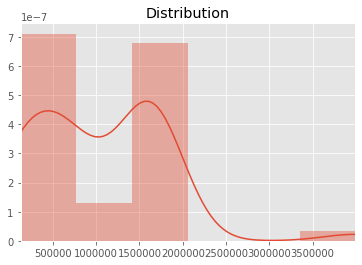

In [42]:
vs.distribution(feature_data_1.var(axis=1))

In [43]:
feature_data_1.mean(axis=1)

0     1919.375000
1     2965.729167
2     1523.750000
3      700.187500
4      605.041667
5     1822.562500
6      727.250000
7     1228.666667
8     1845.916667
9     1866.187500
10     588.458333
11     707.208333
12    1829.791667
13    1218.645833
14     704.270833
15    1245.291667
16    1802.750000
17    1270.000000
18     730.750000
19    1884.875000
20    1214.416667
21    1270.312500
22    1828.958333
23     713.562500
24    1897.979167
25    1367.250000
26    1287.270833
27    1349.250000
28     725.687500
29     577.083333
30     591.145833
31    1895.166667
32     723.020833
33    1848.416667
34     712.333333
35    1289.041667
36    1815.729167
37    1838.625000
38    1827.333333
39    1862.604167
40    1360.833333
41    1894.083333
42    1838.166667
43    1887.666667
44    1873.937500
45    1873.854167
46    1813.312500
47    1225.854167
dtype: float64

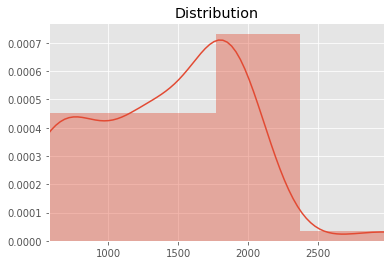

In [45]:
vs.distribution(feature_data_1.mean(axis=1))

### feature distribution

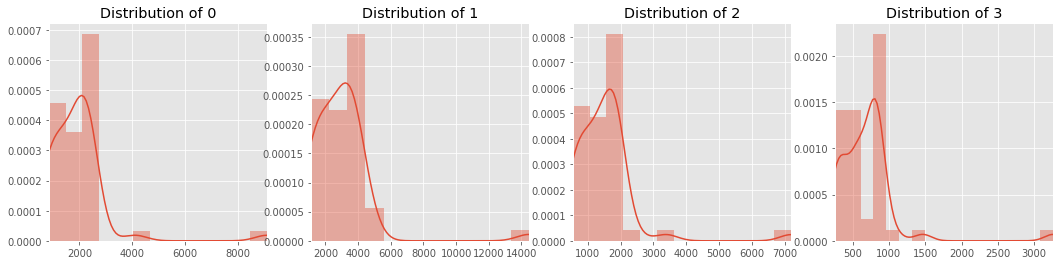

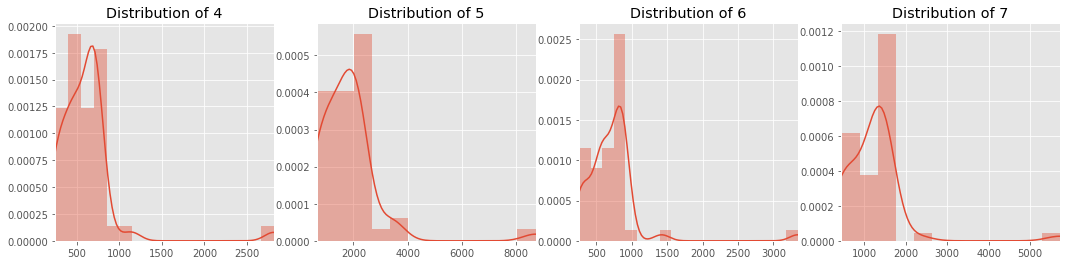

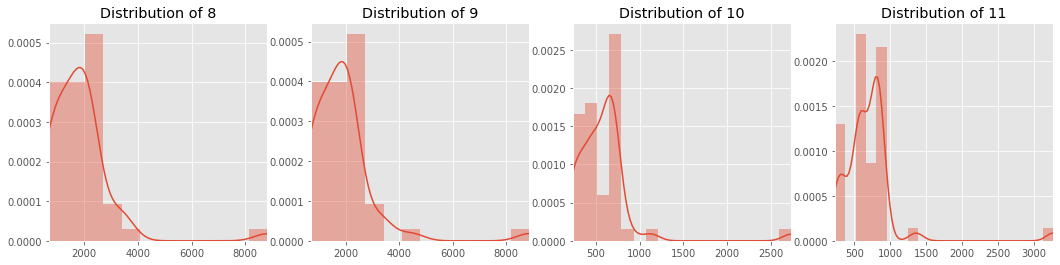

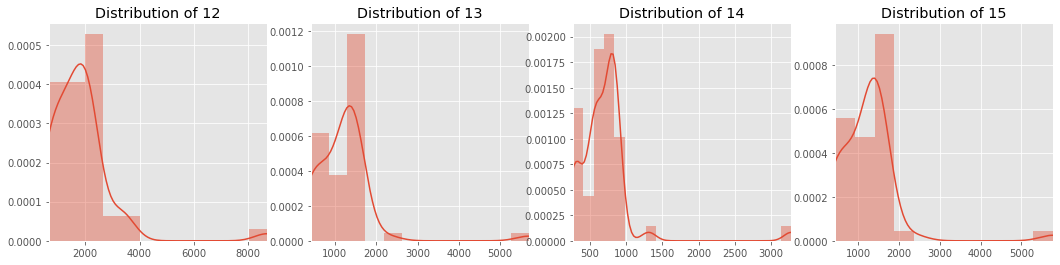

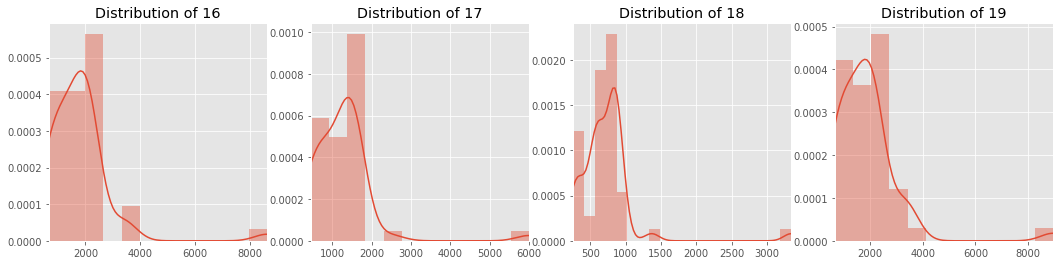

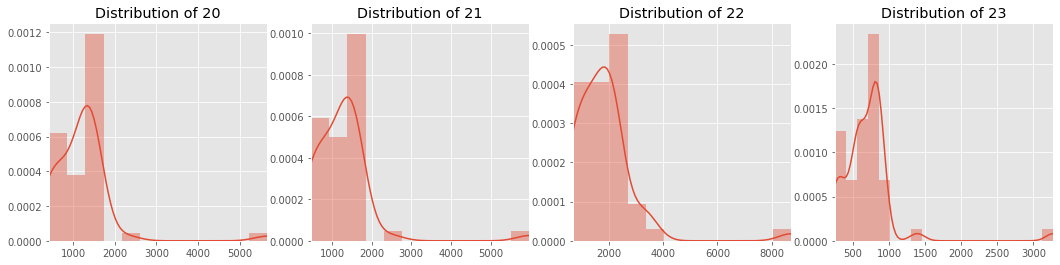

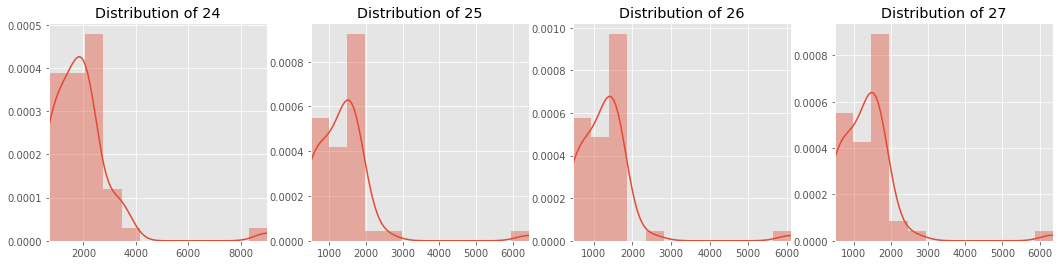

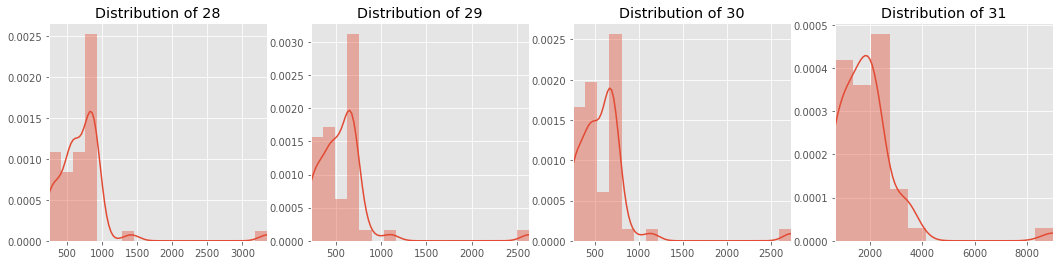

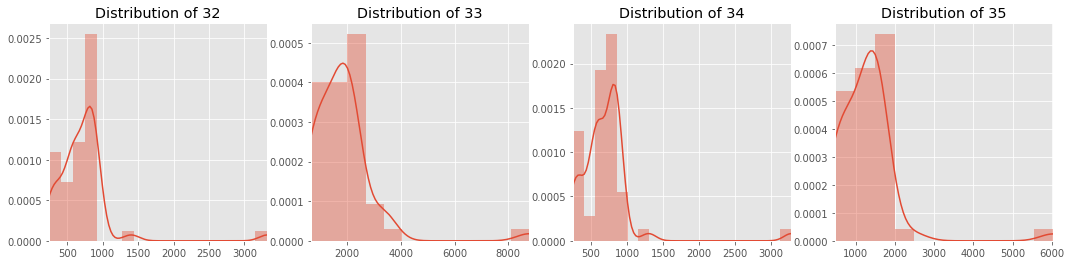

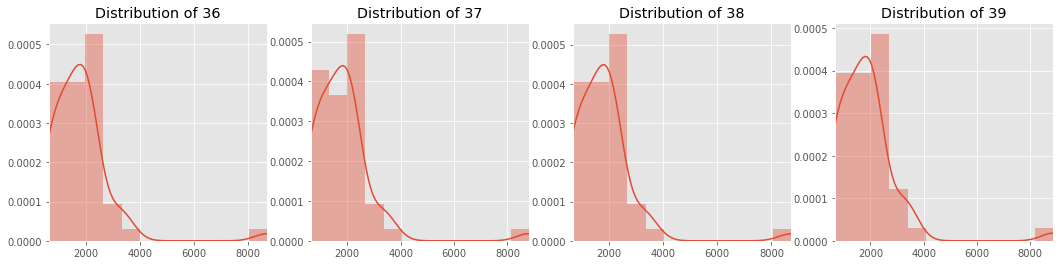

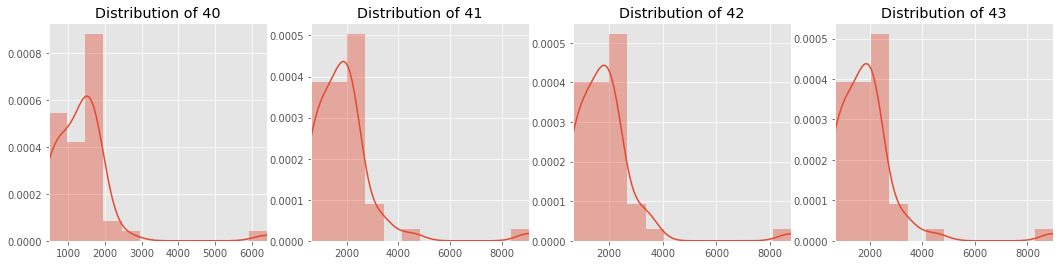

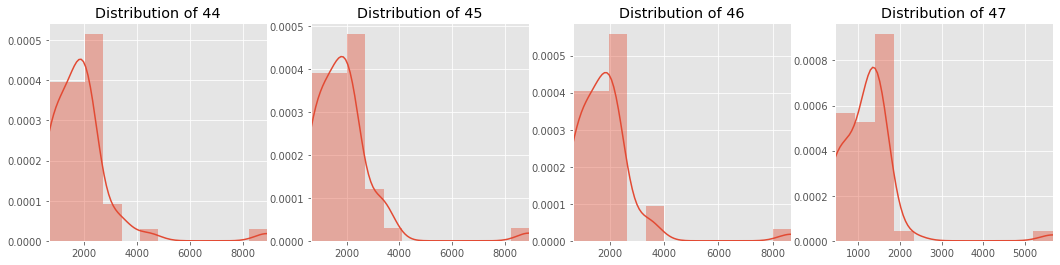

In [47]:
vs.distribution(feature_data_1,feature_data_1.columns,4)

### Heatmap

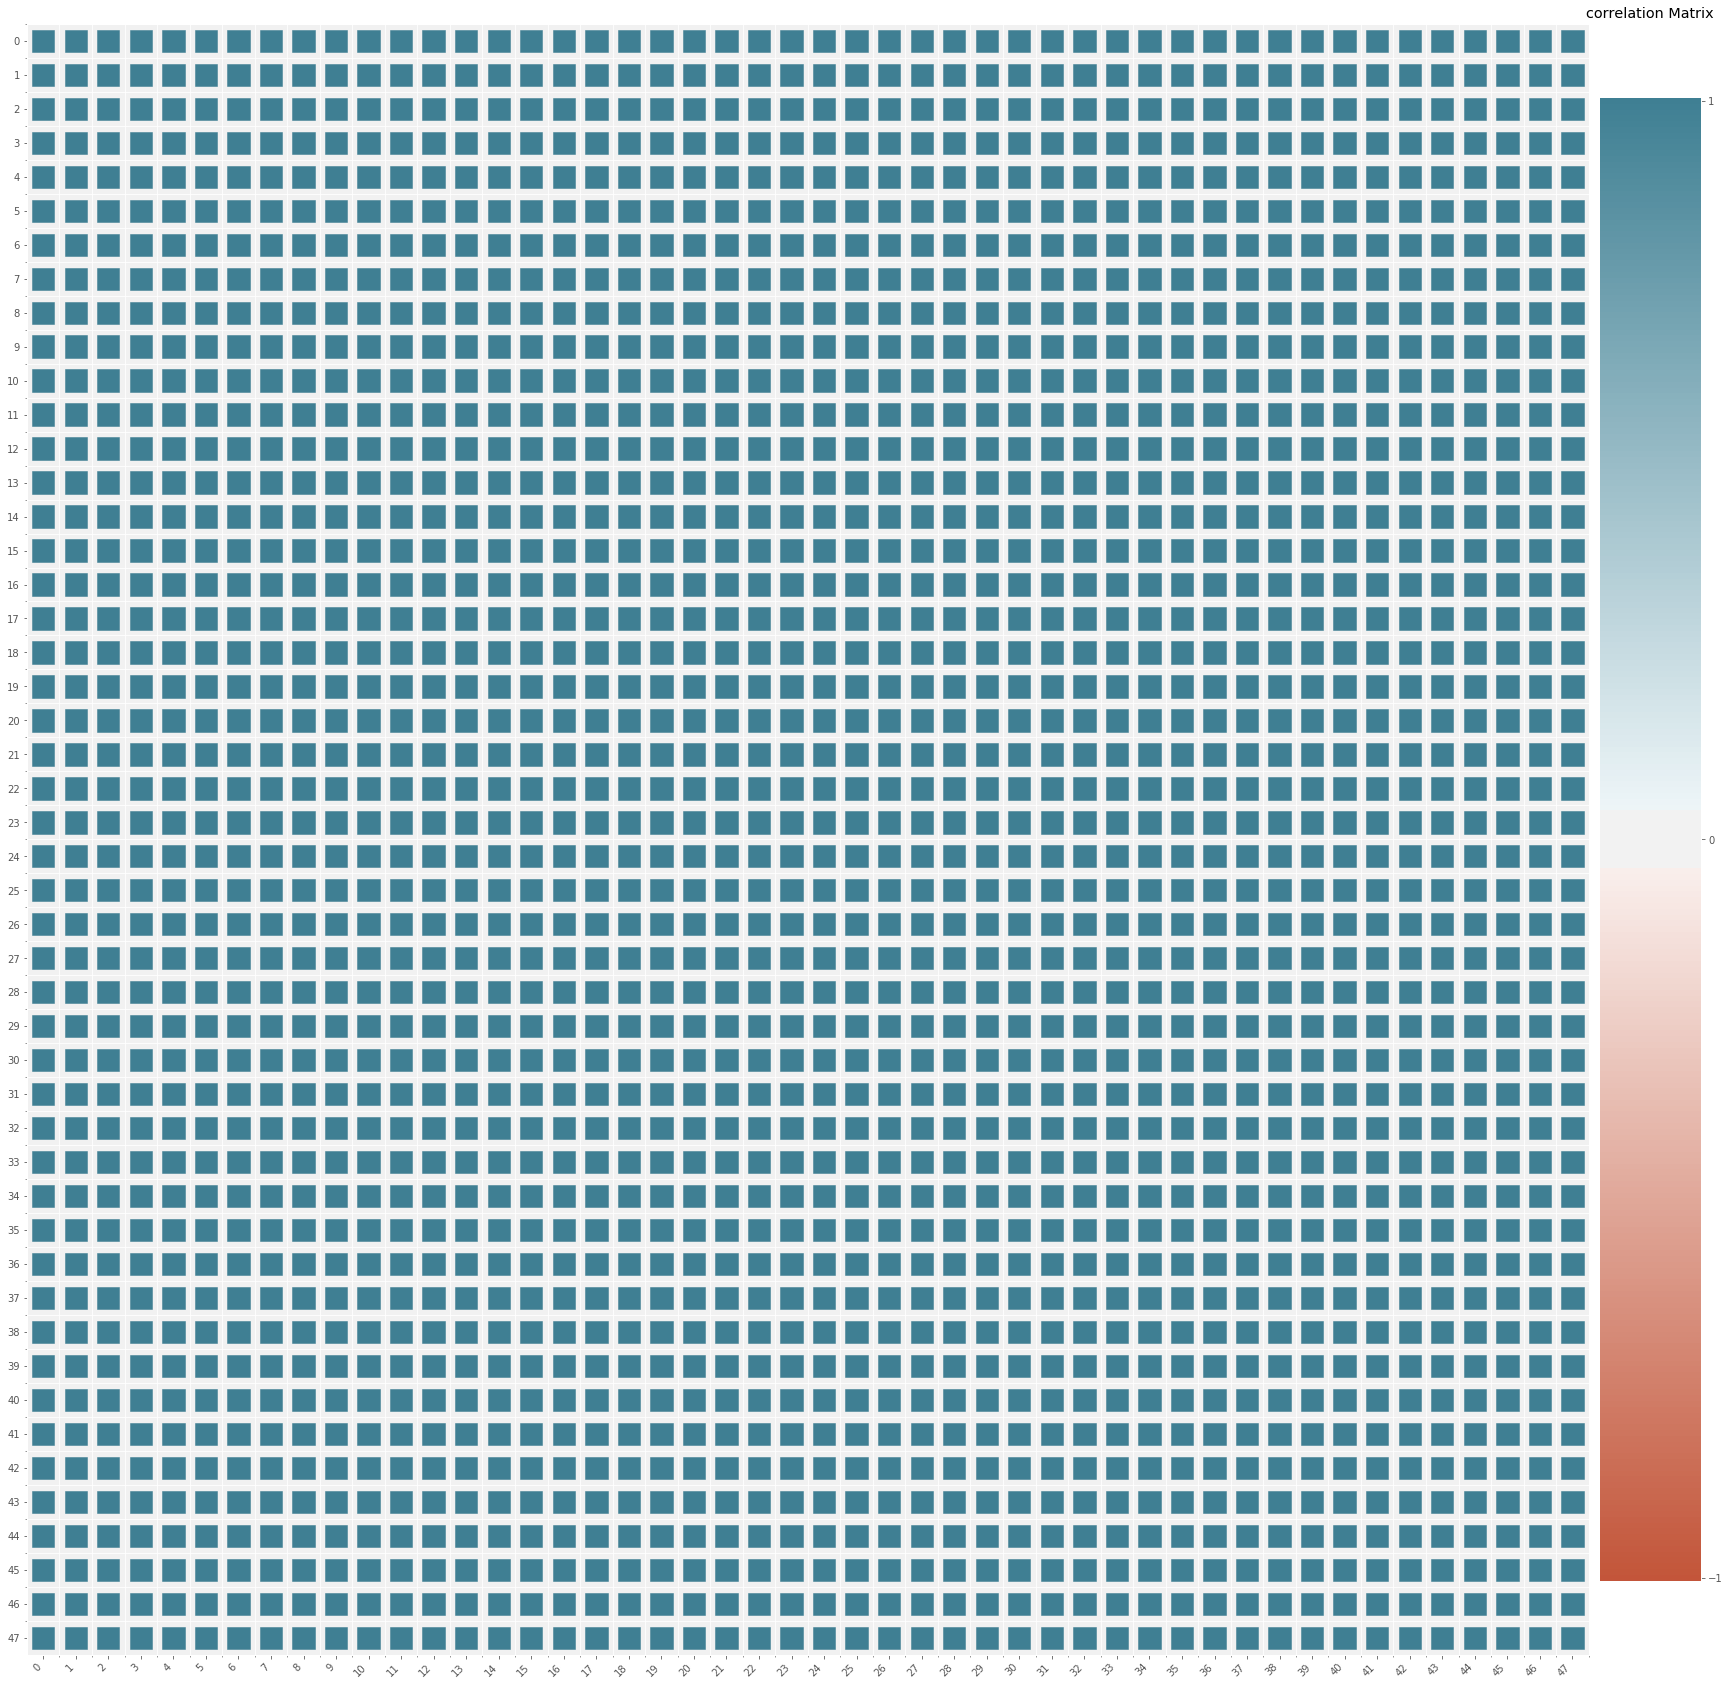

<Figure size 432x288 with 0 Axes>

In [48]:
vs.heatmap(feature_data_1, figsize=(30,30))

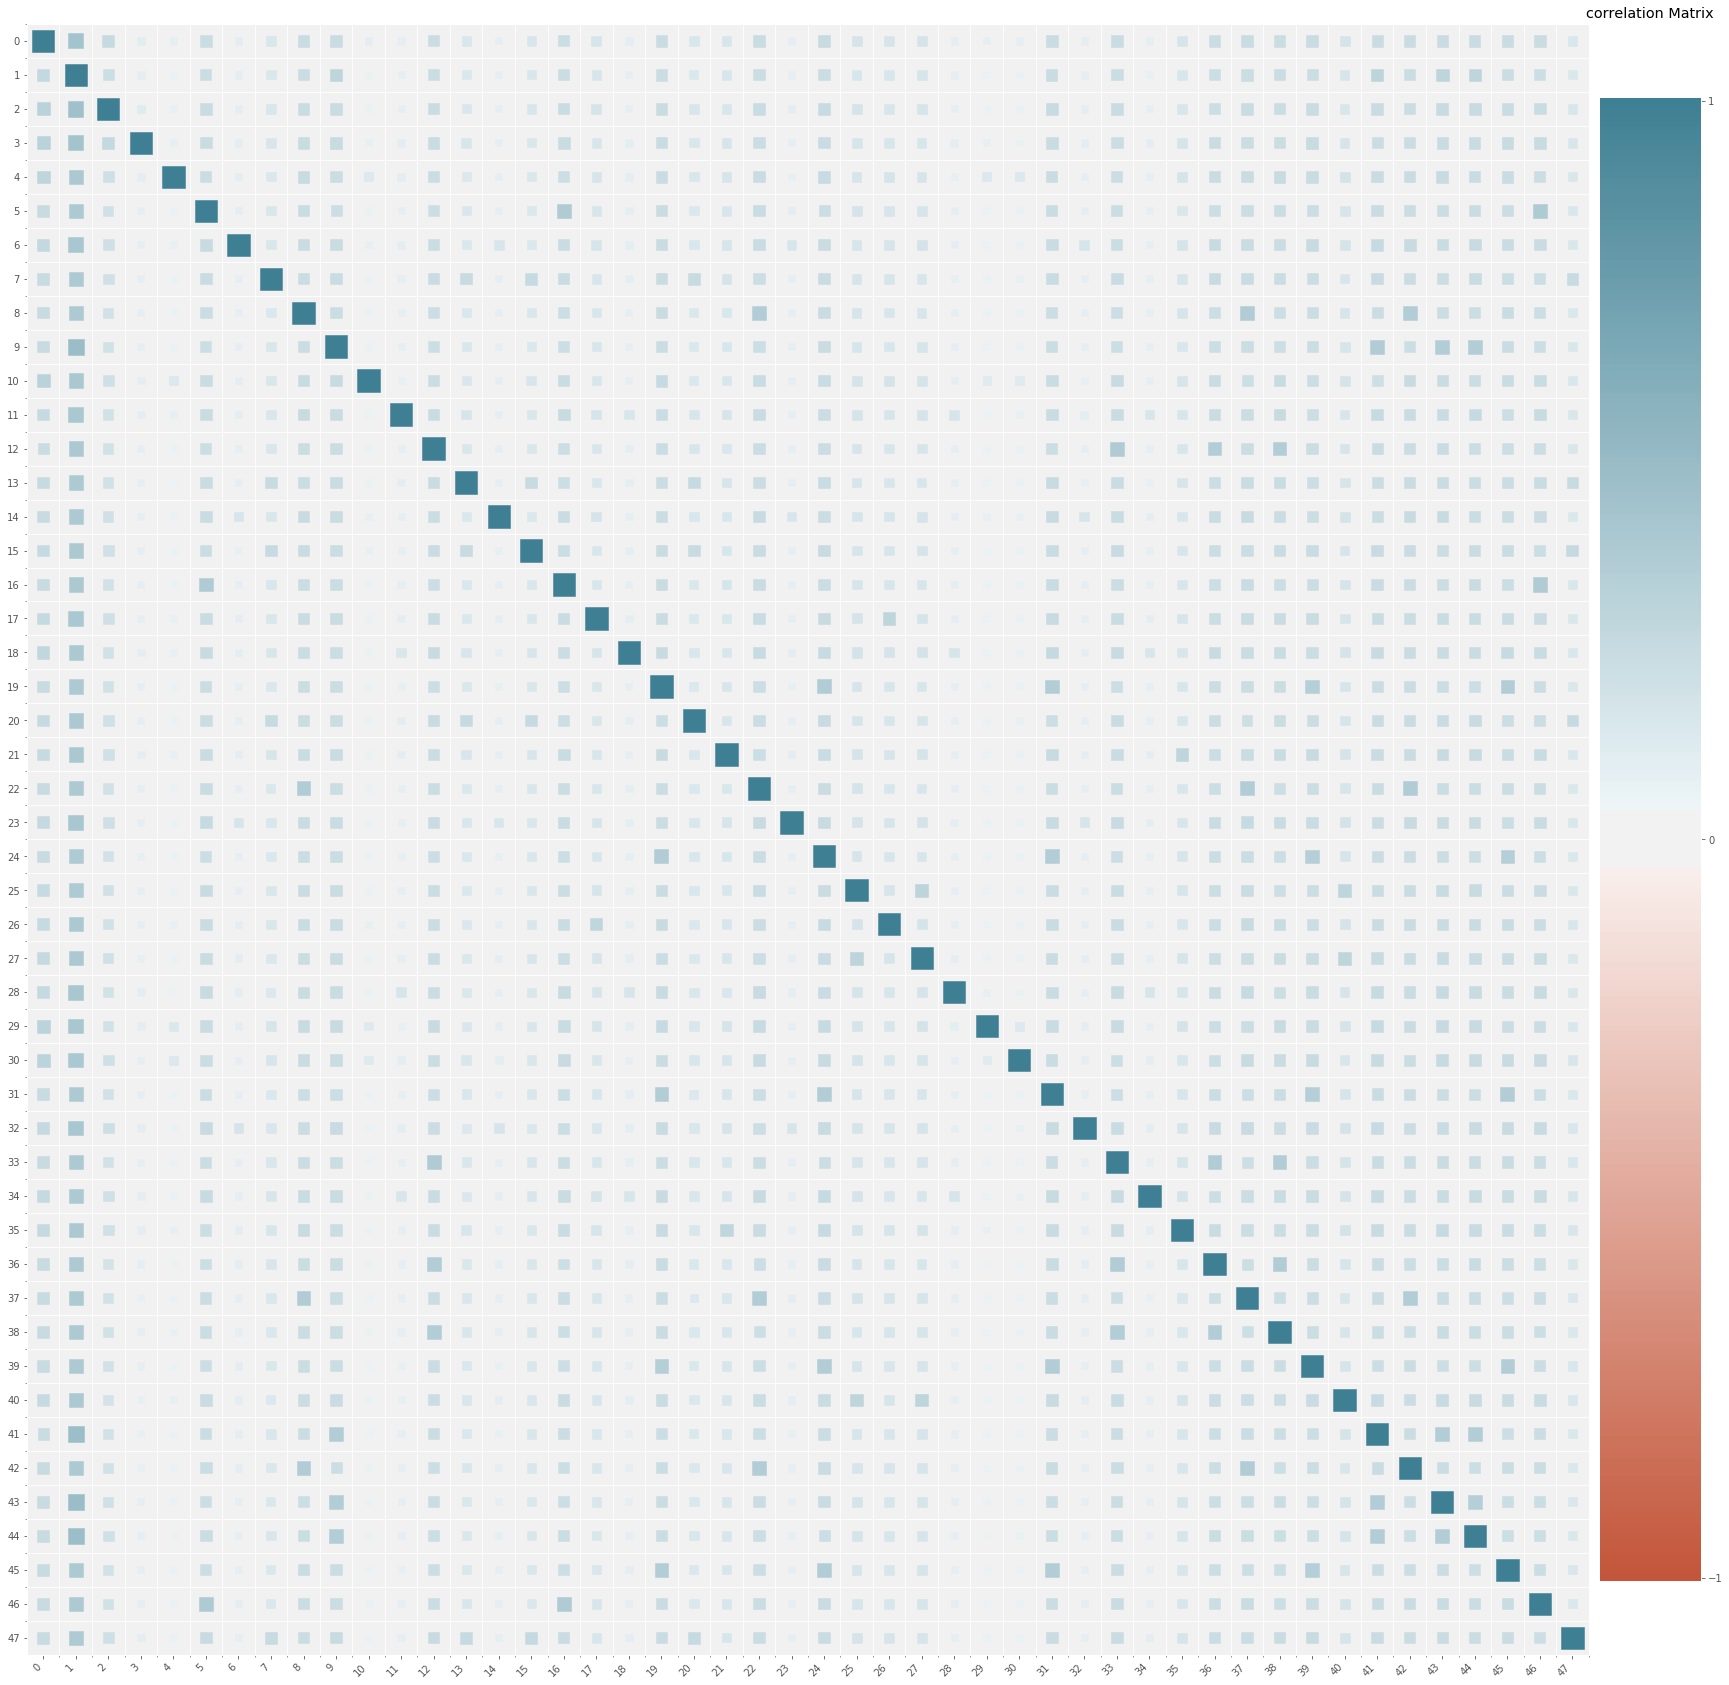

<Figure size 432x288 with 0 Axes>

In [49]:
feature_map = feature_data_1.copy()

for i in range(48):
    feature_map[i] = feature_map[i] / feature_data_1[i][i]

vs.heatmap(feature_map, figsize= (30,30))

### corr

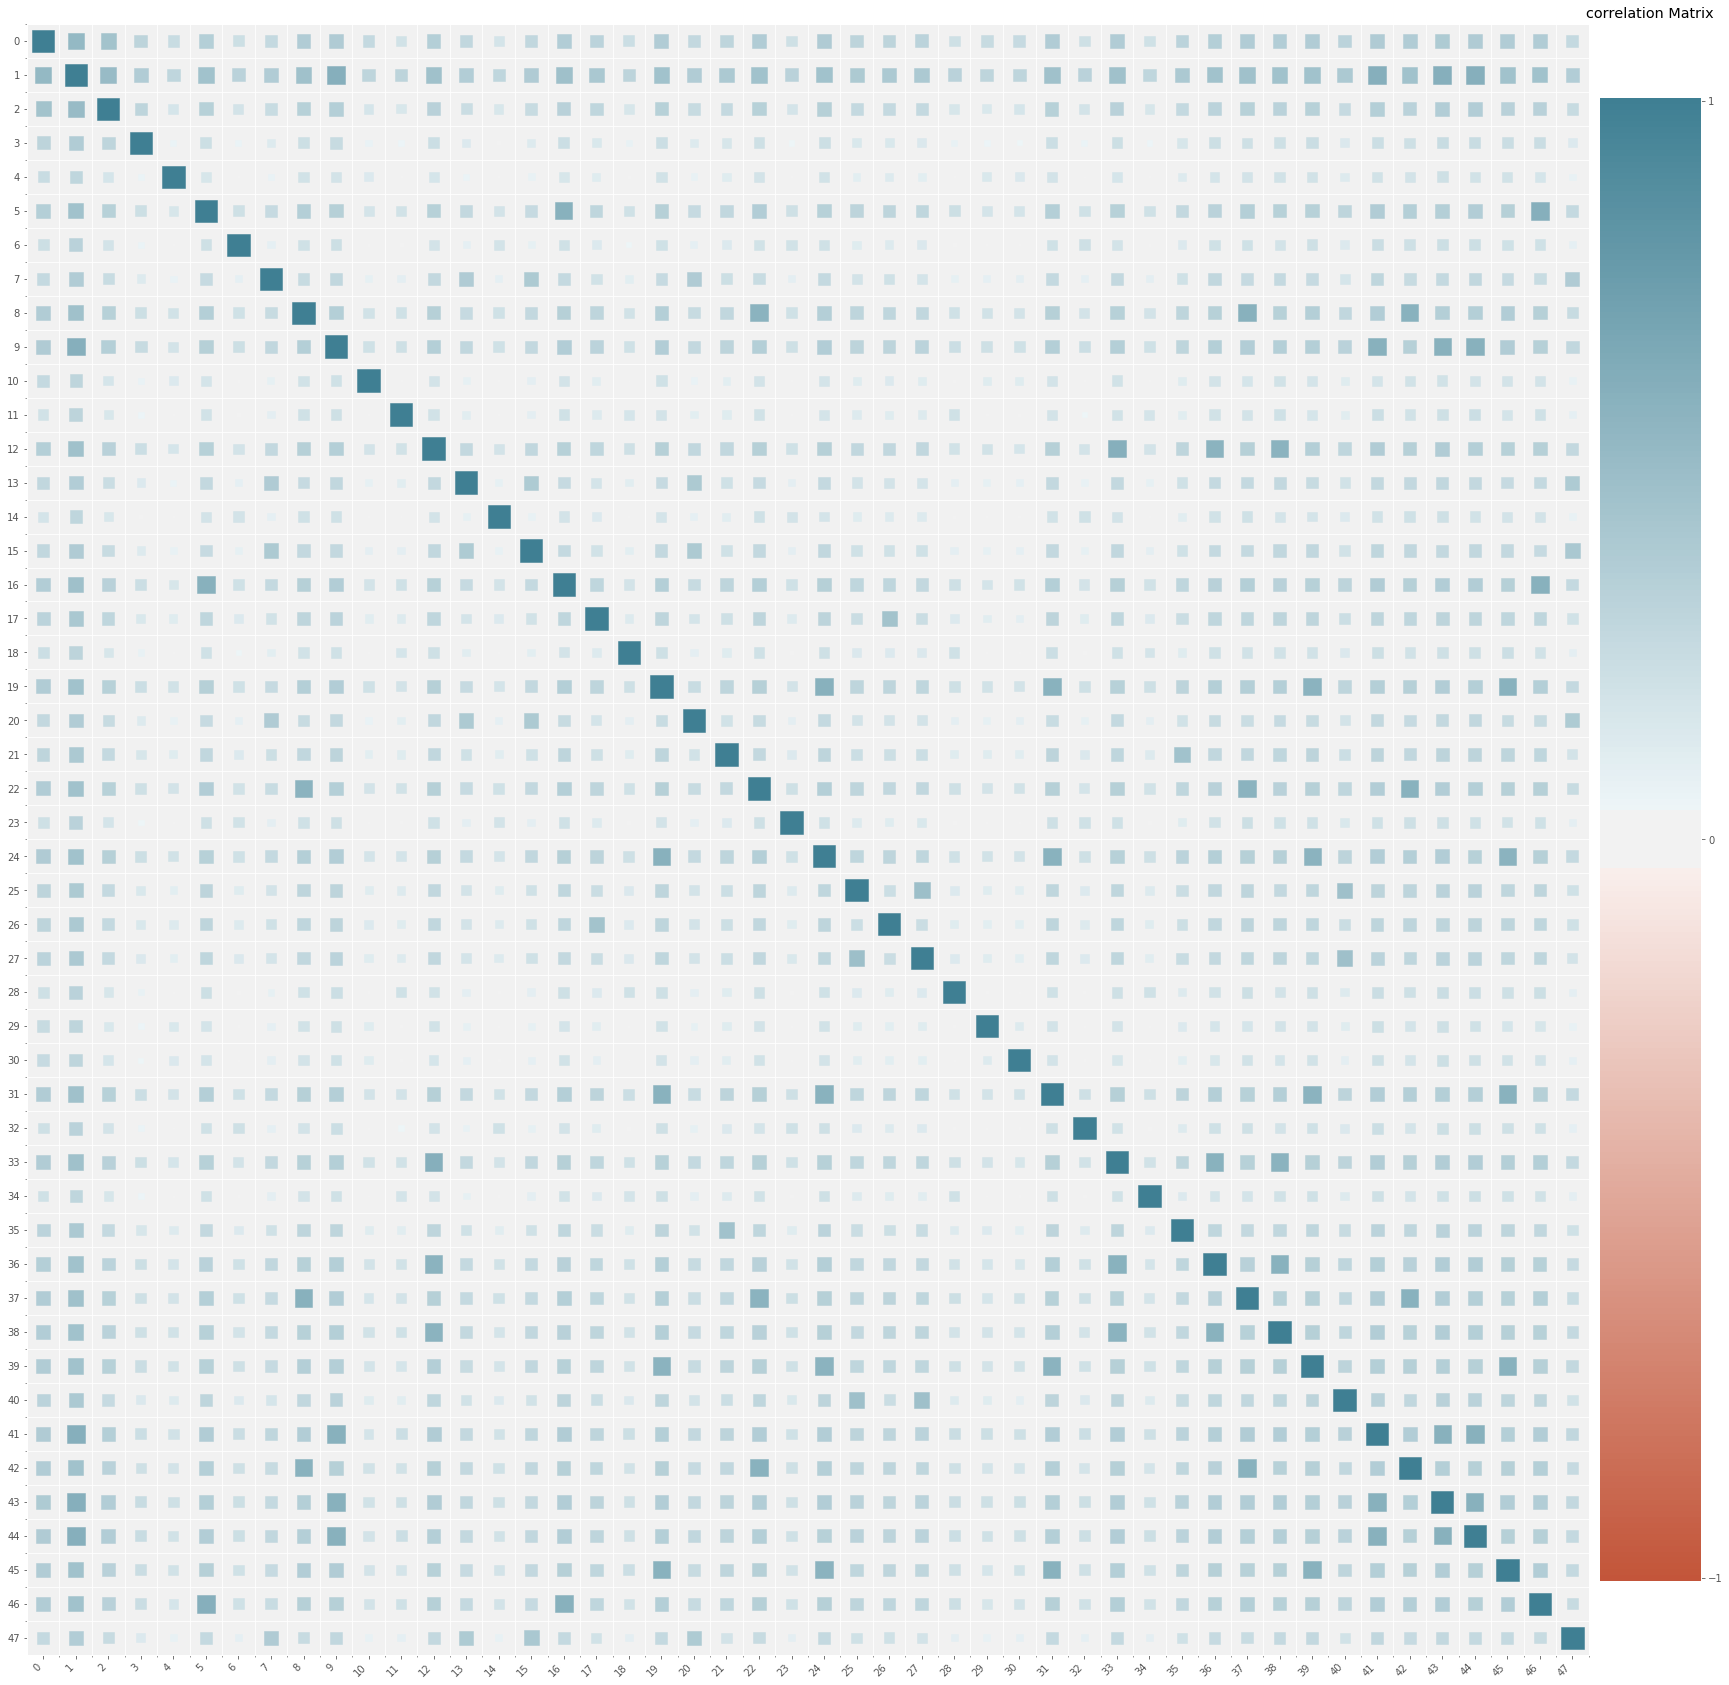

<Figure size 432x288 with 0 Axes>

In [50]:
vs.corrplot(feature_data_1, figsize=(30,30))

### t-sene visualization

In [89]:
embeded_feature = TSNE(n_components=2).fit_transform(feature_data_1)

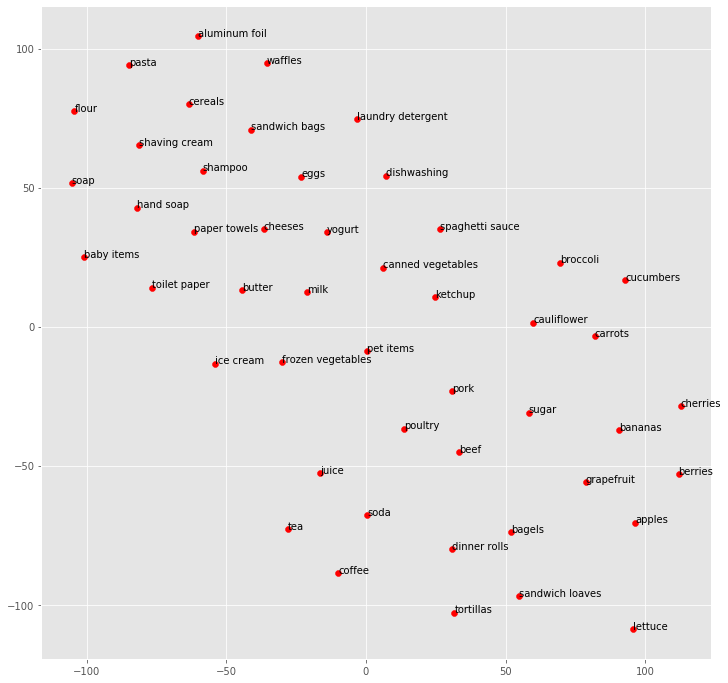

In [52]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(embeded_feature[:,0],embeded_feature[:,1],c='r')

for i, name in enumerate(item_to_id['Item_name']):
    ax.annotate(name, embeded_feature[i])


### Optics

In [96]:
from sklearn.cluster import OPTICS

In [97]:
clustering = OPTICS(min_samples=2).fit(feature_data_1)

In [98]:
clustering.labels_

array([-1, -1, -1, -1,  1,  5, -1,  2,  7,  8,  1, -1,  6,  2, -1,  2,  5,
        0, -1,  9,  2,  3,  7, -1,  9,  4,  0,  4, -1,  1,  1,  9, -1,  6,
       -1,  3,  6,  7,  6,  9,  4,  8,  7,  8,  8,  9,  5,  2])

In [102]:
item_to_id = item_to_id.drop('OPTICS_2_4',axis=1) 


In [103]:
item_to_id['OPTICS_2_hypothesis1'] = clustering.labels_
item_to_id.sort_values('OPTICS_2_hypothesis1')

Item_name  Item_id  OPTICS_2_hypothesis1
0               sugar        1                    -1
34               soap       35                    -1
32       toilet paper       33                    -1
28          hand soap       29                    -1
18      shaving cream       19                    -1
14      aluminum foil       15                    -1
11            shampoo       12                    -1
23       paper towels       24                    -1
2           pet items        3                    -1
3          baby items        4                    -1
6       sandwich bags        7                    -1
1             lettuce        2                    -1
17  laundry detergent       18                     0
26       dishwashing        27                     0
10            cereals       11                     1
4             waffles        5                     1
30              pasta       31                     1
29              flour       30                     1
15               milk       16                     2
7              butter        8                     2
20            cheeses       21                     2
13               eggs       14                     2
47             yogurt       48                     2
35          ice cream       36                     3
21  frozen vegetables       22                     3
40            ketchup       41                     4
27  canned vegetables       28                     4
25    spaghetti sauce       26                     4
46               pork       47                     5
16               beef       17                     5
5             poultry        6                     5
38    sandwich loaves       39                     6
33          tortillas       34                     6
12             bagels       13                     6
36       dinner rolls       37                     6
37              juice       38                     7
42             coffee       43                     7
8                soda        9                     7
22                tea       23                     7
9             carrots       10                     8
41          cucumbers       42                     8
43           broccoli       44                     8
44        cauliflower       45                     8
19         grapefruit       20                     9
39            berries       40                     9
45            bananas       46                     9
31             apples       32                     9
24           cherries       25                     9

### Optics 2D

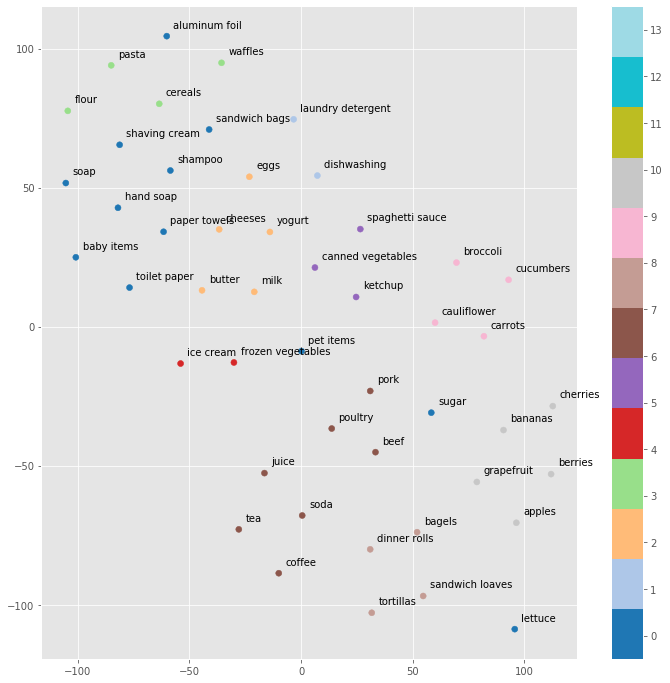

In [63]:
plt.figure(figsize=(12,12))
plt.scatter(embeded_feature[:,0], embeded_feature[:,1], c=item_to_id['OPTICS_2']+1, cmap=plt.cm.get_cmap("tab20", 13))
for i, name in enumerate(item_to_id['Item_name']):
    plt.annotate(name, embeded_feature[i]+3)
plt.colorbar(ticks=range(14))
plt.clim(-0.5, 13.5)
plt.show()

##  hypothesis 1.5

In [68]:
def feature_engineer_1_plus(_list,list_n):
    
    len_list = len(_list)
    if len_list != 1:
        for i in range(len_list):
            for j in range(len_list)[::-1]: 
                feature_matrix[_list[i]-1][_list[j]-1] += 1/ len_list
                

In [71]:
list_48 = [x for x in range(48)]
feature_matrix = np.zeros((48,48))

for index in range(num_of_rows_history):
    feature_engineer_1_plus(purchase_history.iloc[index,1], list_48)

In [73]:
feature_data_1_plus = reduce_memory(feature_matrix)

___MEMORY USAGE AFTER COMPLETION:___
reduced df from 0.0177 MB to 0.0045 MB 
This is  25.517241379310345 % of the initial size


In [38]:
file.save_pickle(feature_data_1_extra_path,feature_data_1)

Directory  /home/phuc/Desktop/Work/Data Sience/Project/item_cluster/data/processed/feature_data  already exists
Saved file feature_data_1.pkl


### load_data

In [39]:
feature_data_1 = file.load_pickle(feature_data_1_path)

Loaded file feature_data_1.pkl


In [74]:
feature_data_1_plus.var(axis =1)

0     22437.085106
1     60471.035461
2     14294.442819
3      2806.976950
4      1970.996011
5     22395.742908
6      2690.978280
7      8447.623670
8     22940.616578
9     23568.329344
10     1872.508865
11     2584.712323
12    22016.953457
13     8387.669770
14     2663.531472
15     8476.432181
16    21747.442819
17     9706.017287
18     2636.357713
19    23611.950355
20     8168.638298
21     9545.829787
22    22153.758865
23     2575.728723
24    23862.168440
25    11261.637855
26    10138.786791
27    10867.482270
28     2766.910904
29     1579.303191
30     1809.941489
31    23717.913121
32     2648.338652
33    22487.829787
34     2554.219415
35     9584.701684
36    22306.806738
37    23108.695035
38    22338.546099
39    23273.669770
40    11050.537234
41    24805.872340
42    22745.359929
43    24467.488918
44    23798.168440
45    23582.191489
46    21784.676862
47     8050.551418
dtype: float64

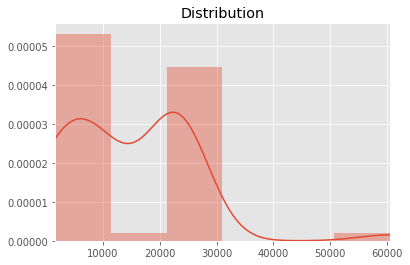

In [75]:
vs.distribution(feature_data_1_plus.var(axis=1))

In [76]:
feature_data_1_plus.mean(axis=1)

0     188.750000
1     299.833333
2     149.062500
3      67.291667
4      57.937500
5     180.708333
6      68.854167
7     118.312500
8     182.354167
9     183.270833
10     56.208333
11     67.395833
12    180.062500
13    117.895833
14     67.520833
15    119.312500
16    178.437500
17    123.937500
18     68.937500
19    185.416667
20    117.000000
21    123.500000
22    180.666667
23     67.625000
24    186.958333
25    133.354167
26    126.354167
27    131.416667
28     69.062500
29     53.875000
30     56.125000
31    186.541667
32     68.541667
33    182.000000
34     67.687500
35    124.645833
36    179.708333
37    182.333333
38    180.583333
39    183.770833
40    132.625000
41    187.000000
42    181.791667
43    185.854167
44    184.291667
45    184.750000
46    179.562500
47    117.291667
dtype: float64

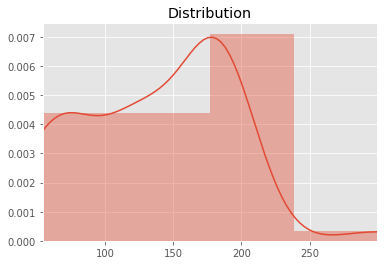

In [77]:
vs.distribution(feature_data_1_plus.mean(axis=1))

### feature distribution

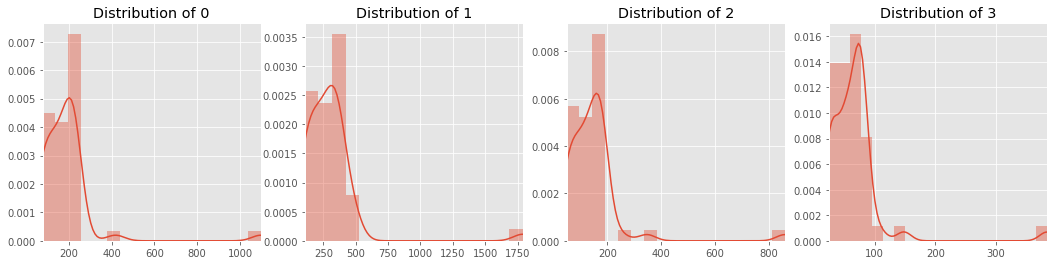

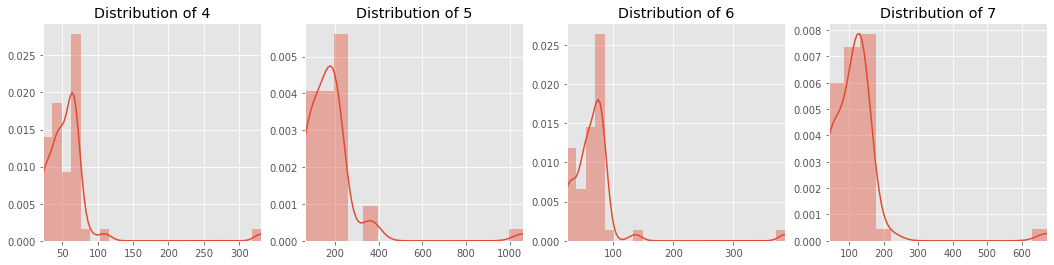

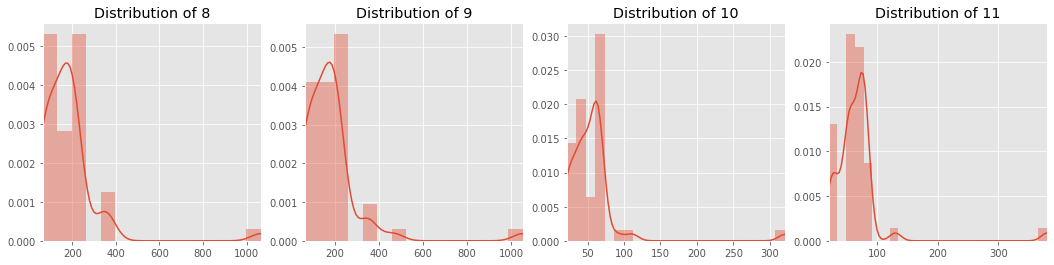

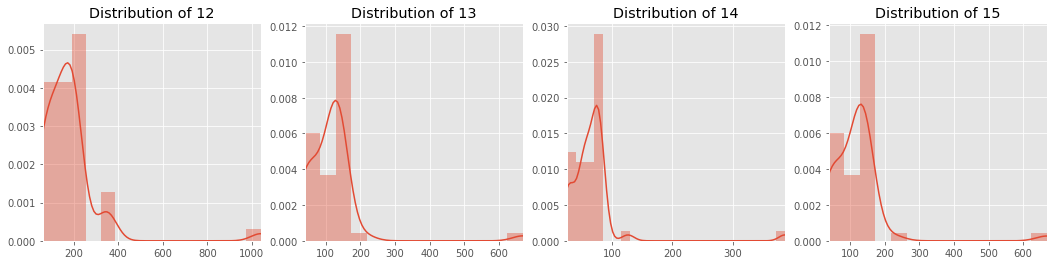

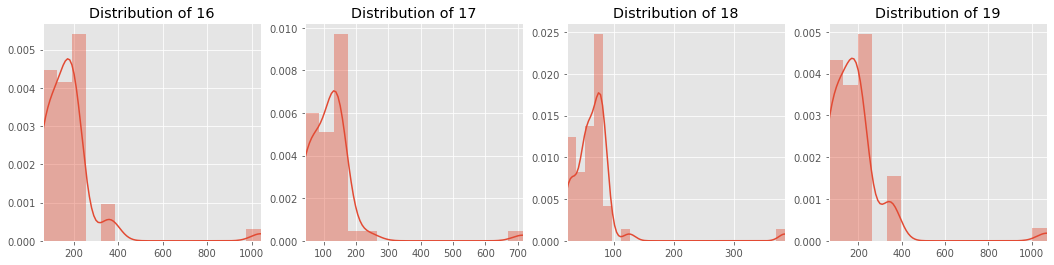

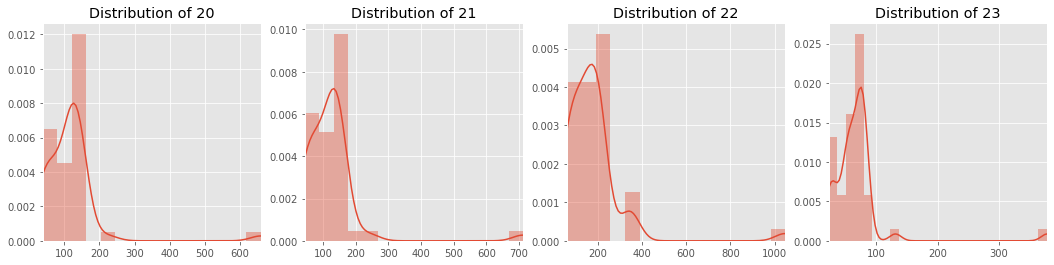

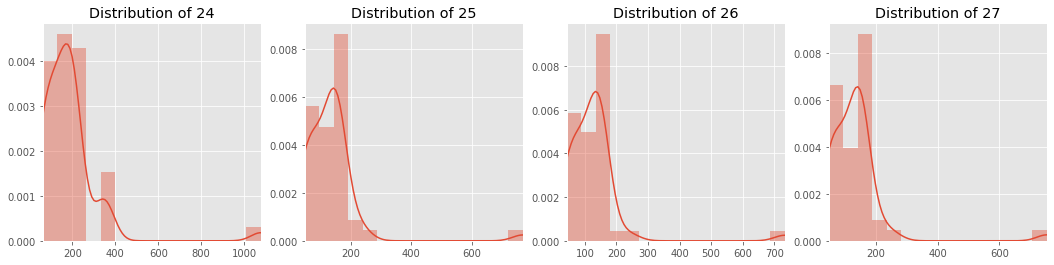

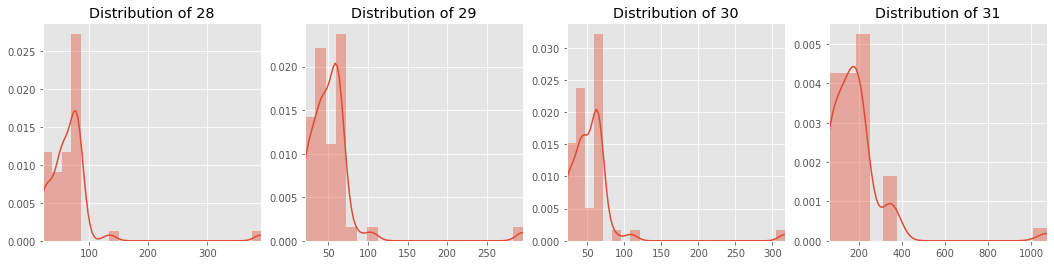

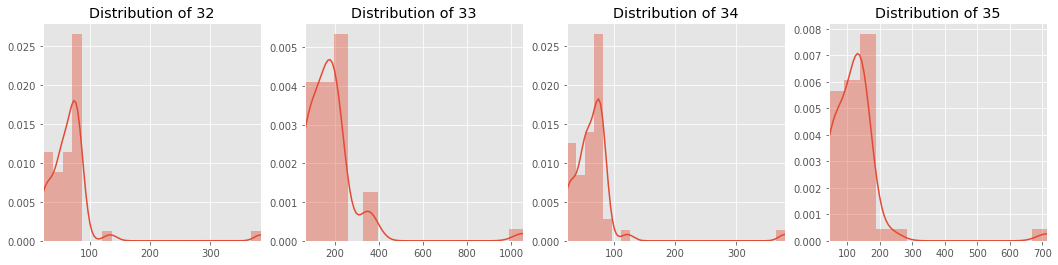

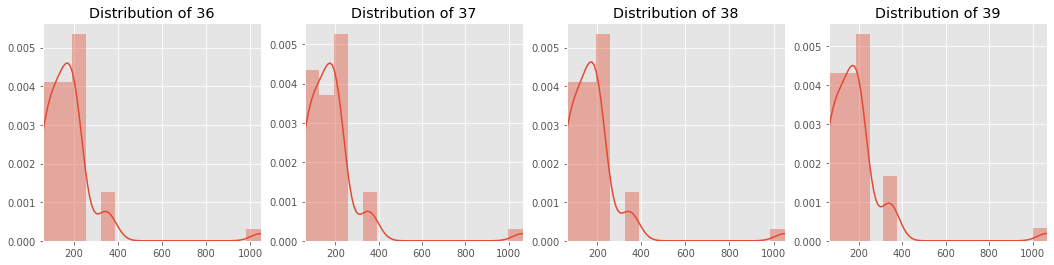

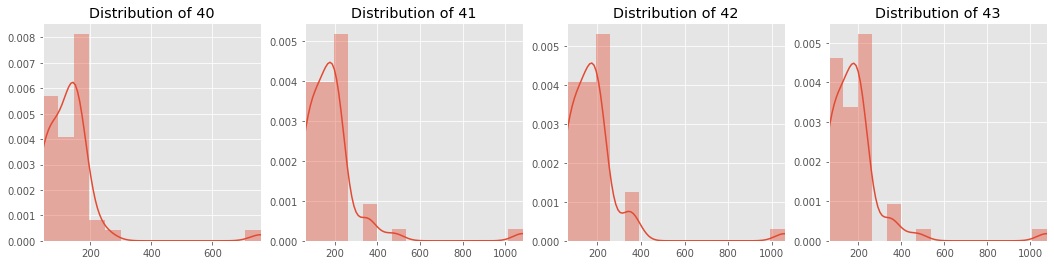

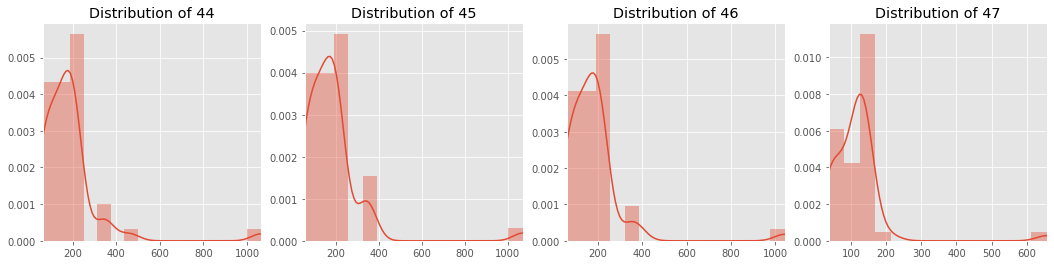

In [78]:
vs.distribution(feature_data_1_plus,feature_data_1.columns,4)

### Heatmap

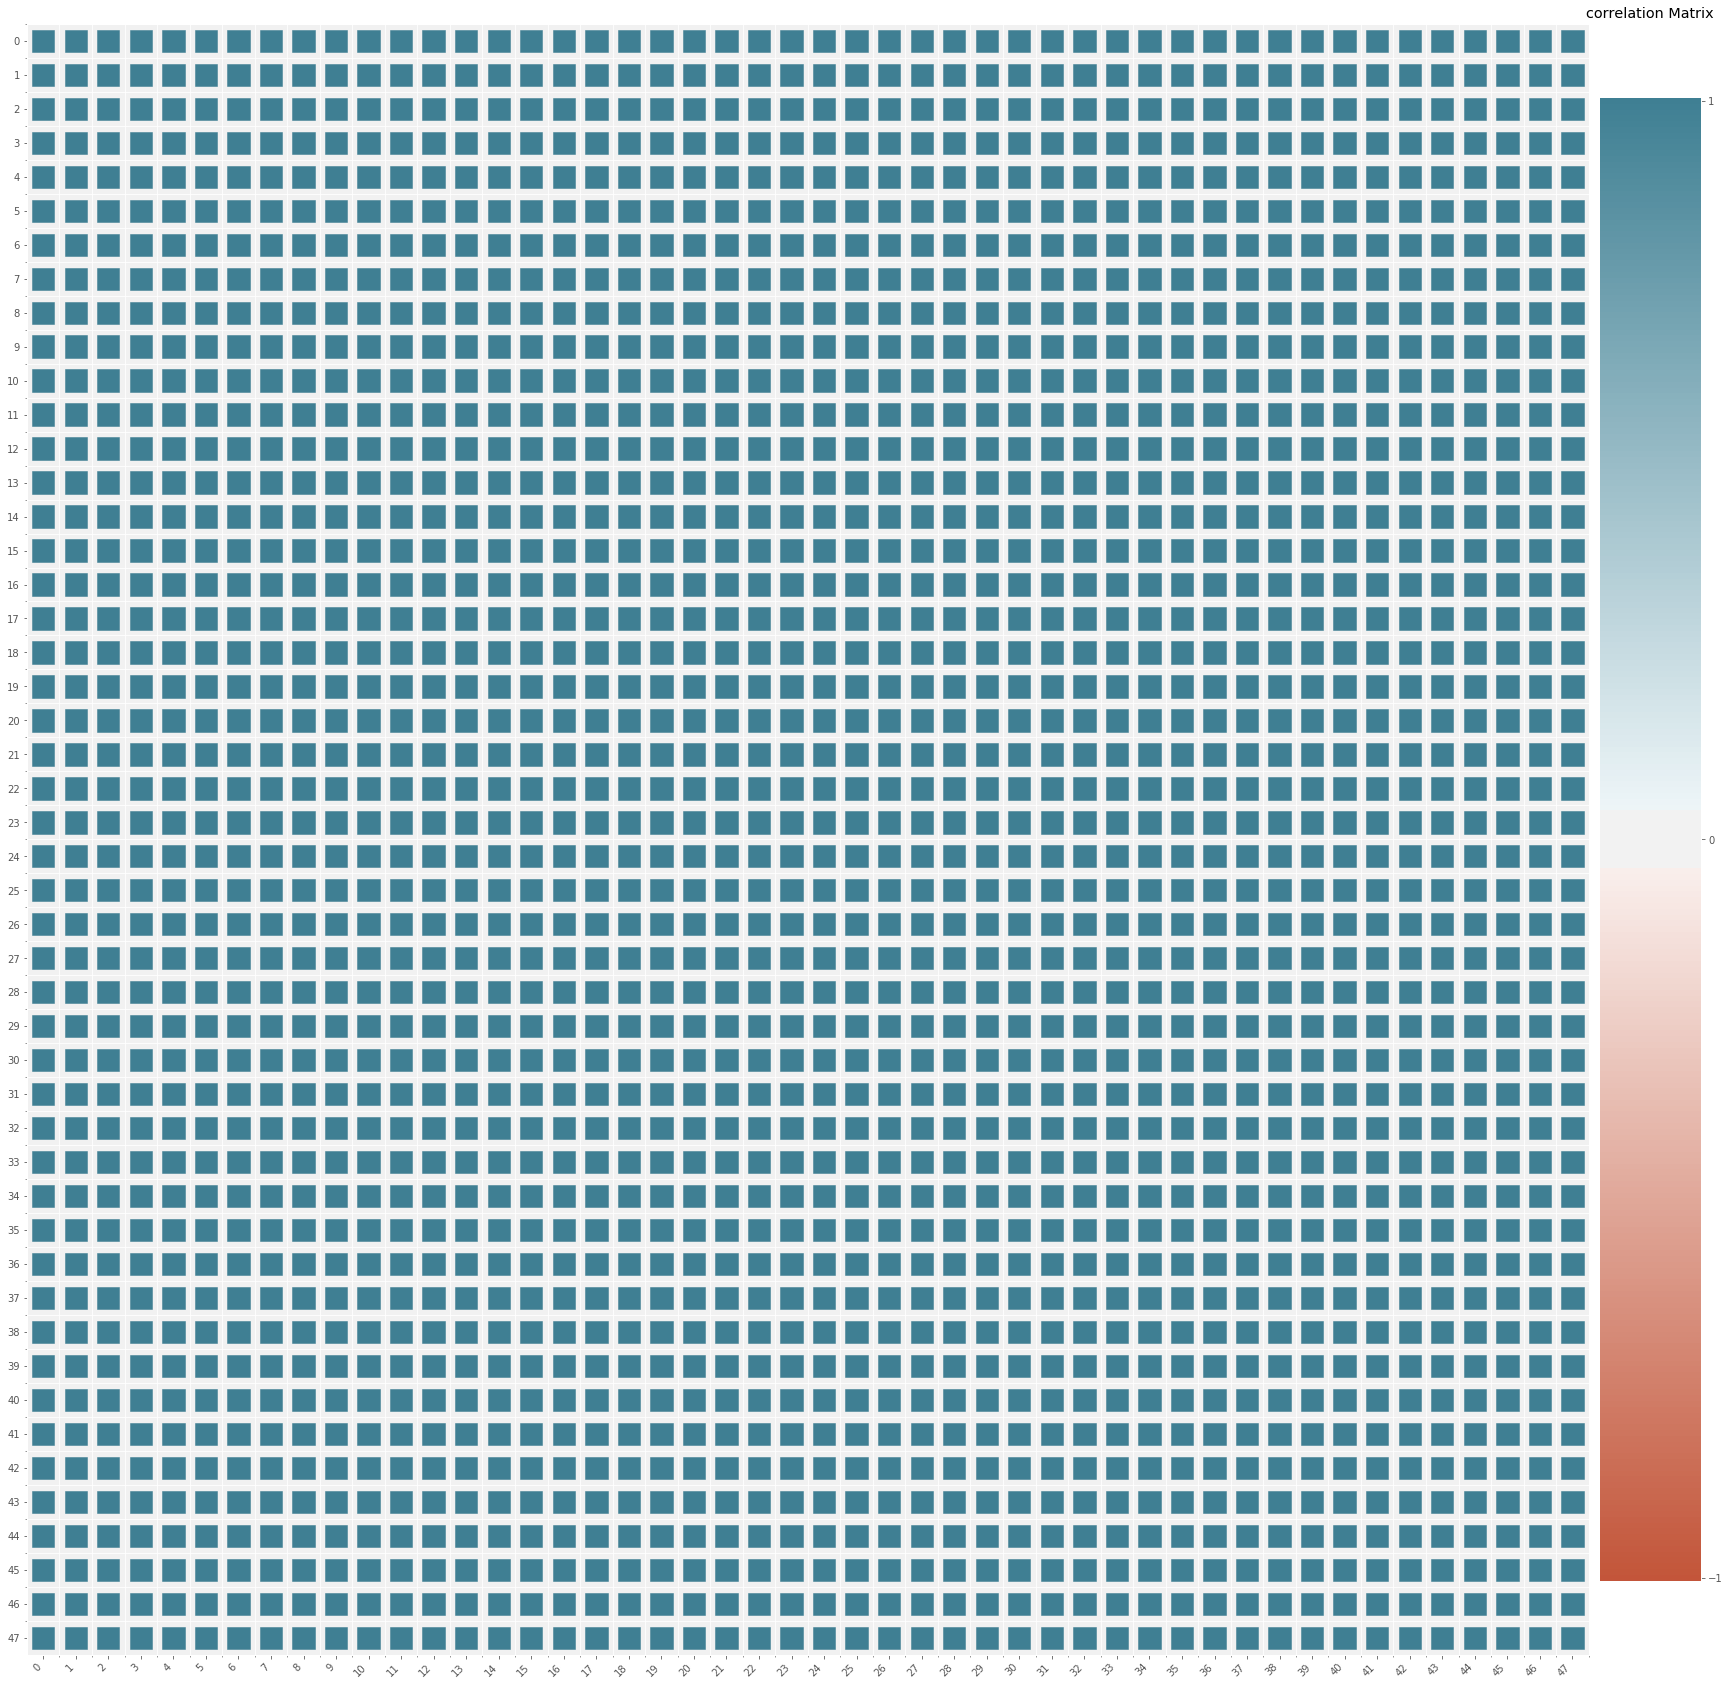

<Figure size 432x288 with 0 Axes>

In [48]:
vs.heatmap(feature_data_1, figsize=(30,30))

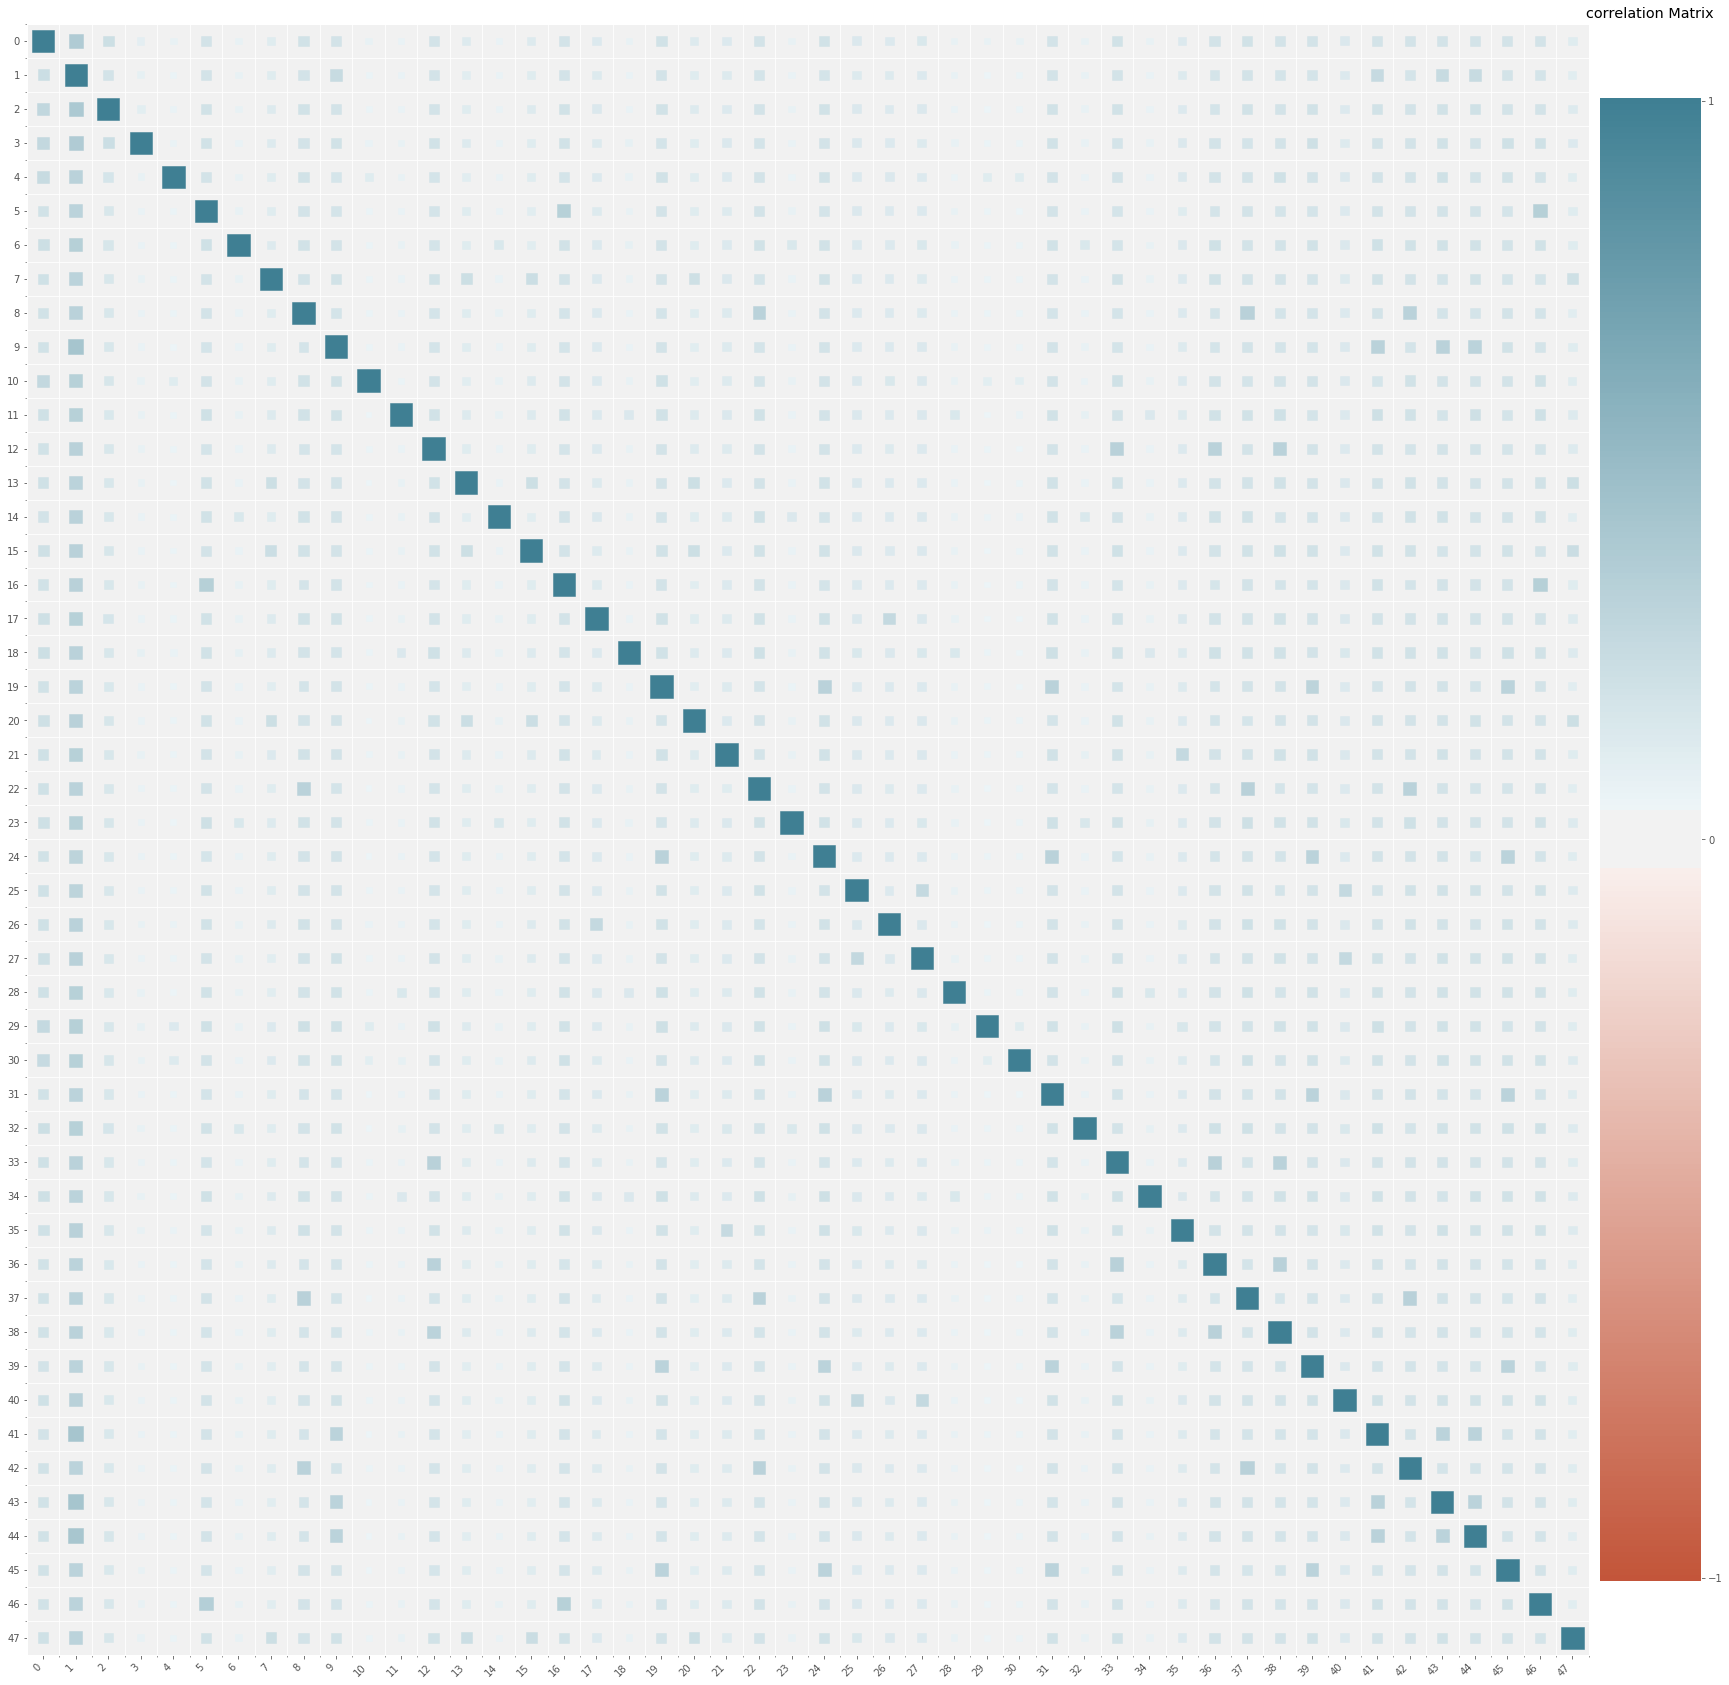

<Figure size 432x288 with 0 Axes>

In [79]:
feature_map = feature_data_1_plus.copy()

for i in range(48):
    feature_map[i] = feature_map[i] / feature_data_1_plus[i][i]

vs.heatmap(feature_map, figsize= (30,30))

### corr

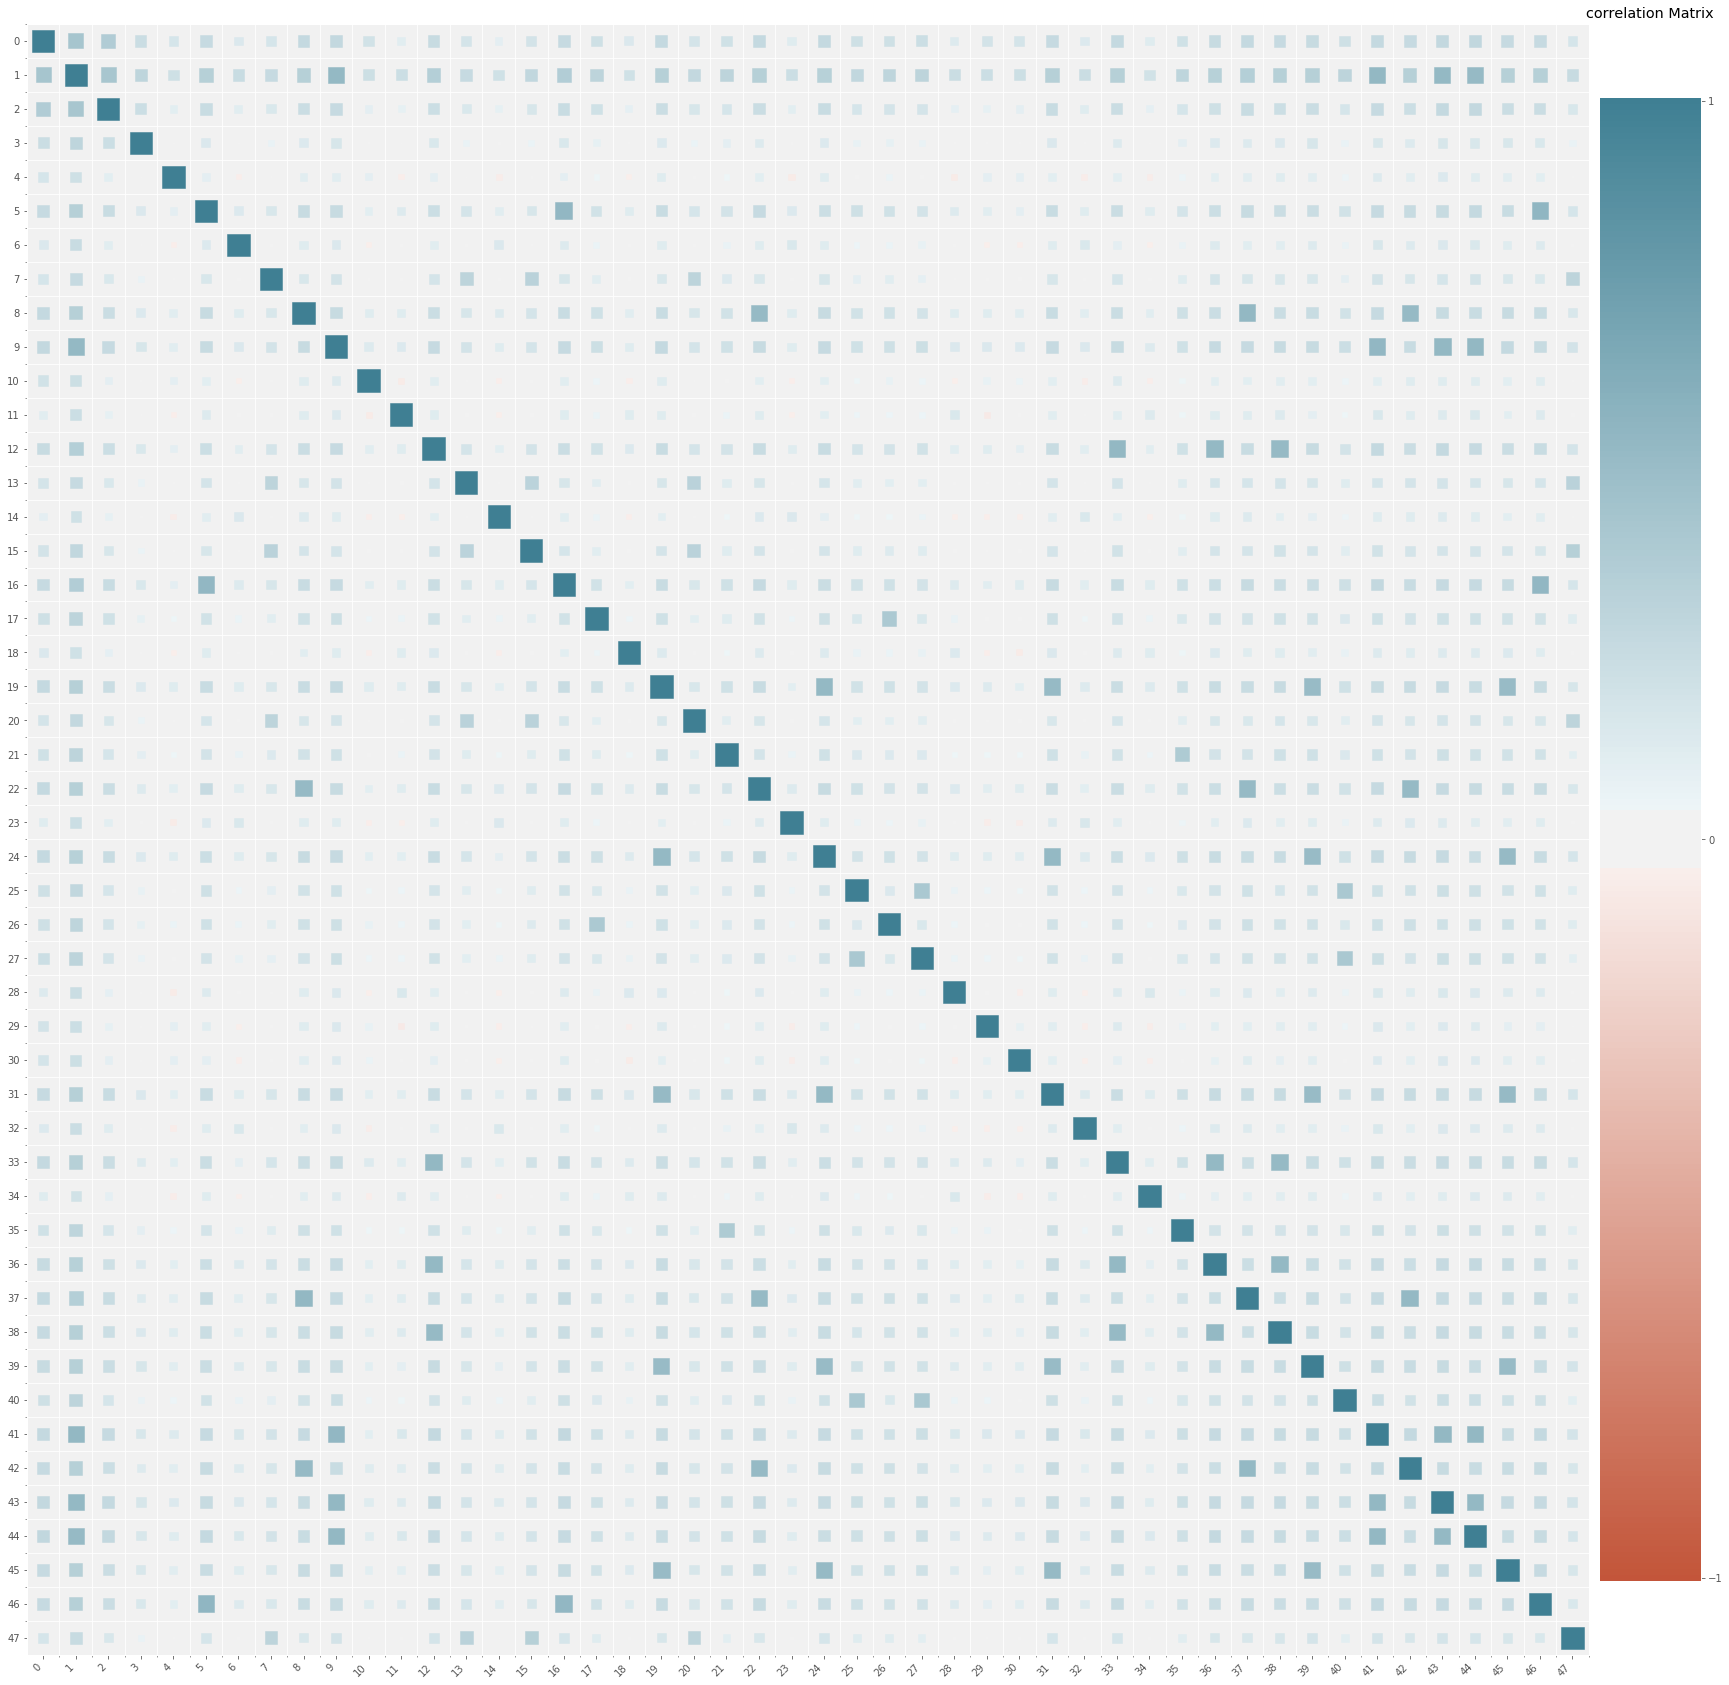

<Figure size 432x288 with 0 Axes>

In [80]:
vs.corrplot(feature_data_1_plus, figsize=(30,30))

### t-sene visualization

In [81]:
embeded_feature = TSNE(n_components=2).fit_transform(feature_data_1_plus)

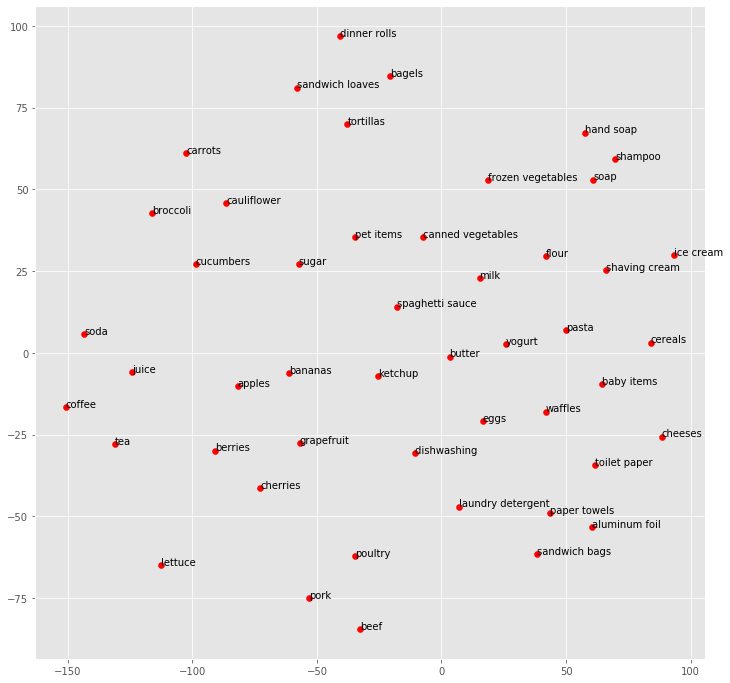

In [82]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(embeded_feature[:,0],embeded_feature[:,1],c='r')

for i, name in enumerate(item_to_id['Item_name']):
    ax.annotate(name, embeded_feature[i])


### Optics

In [104]:
from sklearn.cluster import OPTICS

In [105]:
clustering = OPTICS(min_samples=2).fit(feature_data_1_plus)

In [106]:
clustering.labels_

array([-1, -1, -1, -1,  1,  5, -1,  2,  7,  8,  1, -1,  6,  2, -1,  2,  5,
        0, -1,  9,  2,  3,  7, -1,  9,  4,  0,  4, -1,  1,  1,  9, -1,  6,
       -1,  3,  6,  7,  6,  9,  4,  8,  7,  8,  8,  9,  5,  2])

In [107]:
item_to_id['OPTICS_2_1.5'] = clustering.labels_
item_to_id.sort_values('OPTICS_2_1.5')

Item_name  Item_id  OPTICS_2_hypothesis1  OPTICS_2_1.5
0               sugar        1                    -1            -1
34               soap       35                    -1            -1
32       toilet paper       33                    -1            -1
28          hand soap       29                    -1            -1
18      shaving cream       19                    -1            -1
14      aluminum foil       15                    -1            -1
11            shampoo       12                    -1            -1
23       paper towels       24                    -1            -1
2           pet items        3                    -1            -1
3          baby items        4                    -1            -1
6       sandwich bags        7                    -1            -1
1             lettuce        2                    -1            -1
17  laundry detergent       18                     0             0
26       dishwashing        27                     0             0
10            cereals       11                     1             1
4             waffles        5                     1             1
30              pasta       31                     1             1
29              flour       30                     1             1
15               milk       16                     2             2
7              butter        8                     2             2
20            cheeses       21                     2             2
13               eggs       14                     2             2
47             yogurt       48                     2             2
35          ice cream       36                     3             3
21  frozen vegetables       22                     3             3
40            ketchup       41                     4             4
27  canned vegetables       28                     4             4
25    spaghetti sauce       26                     4             4
46               pork       47                     5             5
16               beef       17                     5             5
5             poultry        6                     5             5
38    sandwich loaves       39                     6             6
33          tortillas       34                     6             6
12             bagels       13                     6             6
36       dinner rolls       37                     6             6
37              juice       38                     7             7
42             coffee       43                     7             7
8                soda        9                     7             7
22                tea       23                     7             7
9             carrots       10                     8             8
41          cucumbers       42                     8             8
43           broccoli       44                     8             8
44        cauliflower       45                     8             8
19         grapefruit       20                     9             9
39            berries       40                     9             9
45            bananas       46                     9             9
31             apples       32                     9             9
24           cherries       25                     9             9

### Optics 2D

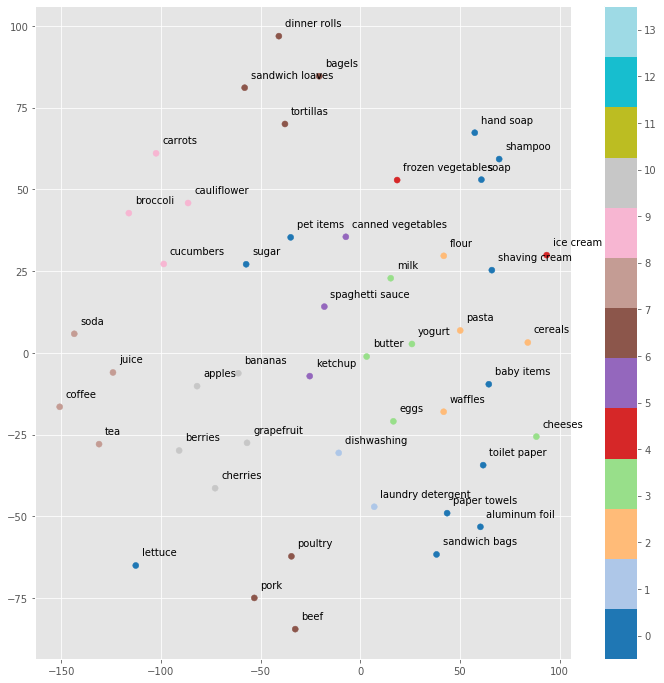

In [88]:
plt.figure(figsize=(12,12))
plt.scatter(embeded_feature[:,0], embeded_feature[:,1], c=item_to_id['OPTICS_2']+1, cmap=plt.cm.get_cmap("tab20", 13))
for i, name in enumerate(item_to_id['Item_name']):
    plt.annotate(name, embeded_feature[i]+3)
plt.colorbar(ticks=range(14))
plt.clim(-0.5, 13.5)
plt.show()

## hypothesis 2

In [17]:
def featue_engineer_2(_list,list_n):
    
    len_list = len(_list)
    if len_list != 1:
        for i in range(len_list):
            for j in range(len_list)[::-1]: 
                feature_matrix[_list[i]-1][_list[j]-1] += 1/ len_list
            
            if len_list > 8:
                
                non_in_list = list(set(list_n).difference(_list))
                len_non_in = len(non_in_list)
                
                for j in range(len_non_in)[::-1]:
                    feature_matrix[_list[i]-1][non_in_list[j]-1] -= len_list/len_non_in
    
    

In [18]:
list_48 = [x for x in range(48)]
feature_matrix = np.zeros((48,48))

for index in range(num_of_rows_history):
    featue_engineer_2(purchase_history.iloc[index,1], list_48)

In [37]:
feature_data_2 = reduce_memory(feature_matrix)

___MEMORY USAGE AFTER COMPLETION:___
reduced df from 0.0177 MB to 0.0045 MB 
This is  25.517241379310345 % of the initial size


### save_data

In [51]:
file.save_pickle(feature_data_2_path,feature_data_2)

Directory  /home/phuc/Desktop/Work/Data Sience/Project/item_cluster/data/processed/feature_data  already exists
Saved file feature_data_2.pkl


### load_data

In [23]:
feature_data_2 = file.load_pickle(feature_data_2_path)

Loaded file feature_data_2.pkl


In [24]:
feature_data_2.var(axis =1 )

0     202843.393174
1     480917.601064
2     132759.430851
3      27335.552748
4      19218.210993
5     194024.737589
6      28015.999557
7      82254.712323
8     203839.147163
9     214146.111702
10     18599.865248
11     26141.467642
12    199312.546099
13     81170.524823
14     25875.737589
15     84556.567376
16    189941.063387
17     90711.414450
18     28201.829344
19    214194.962766
20     79089.644947
21     90950.113032
22    196918.127216
23     27096.403812
24    215662.222961
25    104610.163121
26     92526.056738
27    102522.035461
28     28436.381206
29     17531.771277
30     18523.822695
31    215459.005319
32     27641.657801
33    204536.765514
34     26663.839982
35     93191.232270
36    195815.019504
37    201240.574025
38    197529.871897
39    208072.680851
40    104027.474734
41    219763.957004
42    200195.317376
43    220312.272606
44    214659.978280
45    211460.925089
46    190832.627216
47     28975.984043
dtype: float64

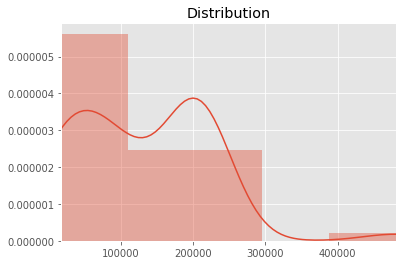

In [26]:
vs.distribution(feature_data_2.var(axis =1 ))

In [25]:
feature_data_2.mean(axis =1)

0    -1314.395833
1    -1964.375000
2    -1047.875000
3     -488.645833
4     -423.958333
5    -1243.333333
6     -517.520833
7     -861.604167
8    -1263.291667
9    -1284.625000
10    -415.083333
11    -501.020833
12   -1252.916667
13    -849.833333
14    -491.083333
15    -874.666667
16   -1228.854167
17    -876.229167
18    -520.854167
19   -1286.125000
20    -844.812500
21    -887.812500
22   -1240.520833
23    -509.645833
24   -1297.229167
25    -935.083333
26    -882.166667
27    -933.416667
28    -513.791667
29    -415.875000
30    -420.583333
31   -1296.875000
32    -512.708333
33   -1279.145833
34    -506.895833
35    -900.541667
36   -1236.291667
37   -1247.020833
38   -1249.479167
39   -1265.000000
40    -938.187500
41   -1291.479167
42   -1254.958333
43   -1301.062500
44   -1284.645833
45   -1277.270833
46   -1227.604167
47    -860.875000
dtype: float64

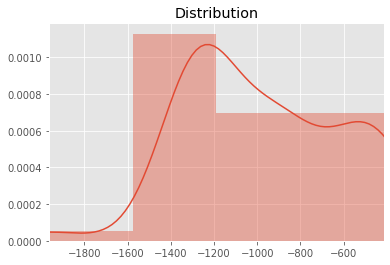

In [27]:
vs.distribution(feature_data_2.mean(axis =1 ))

### distribution 

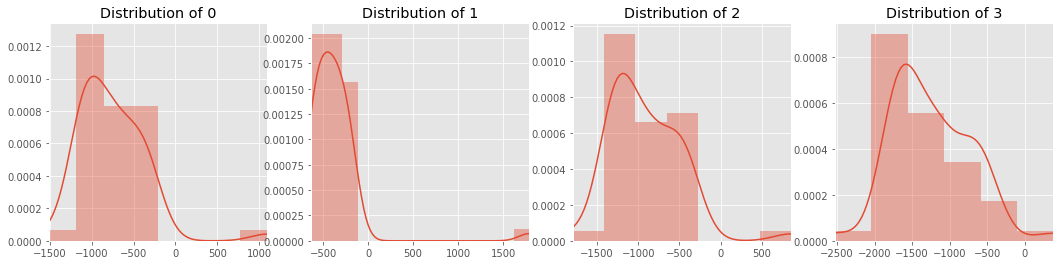

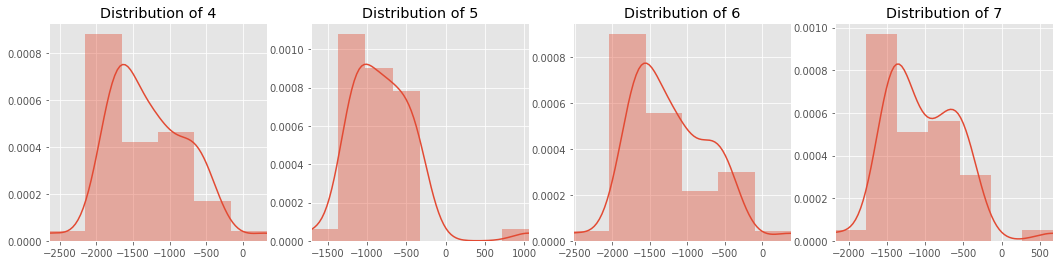

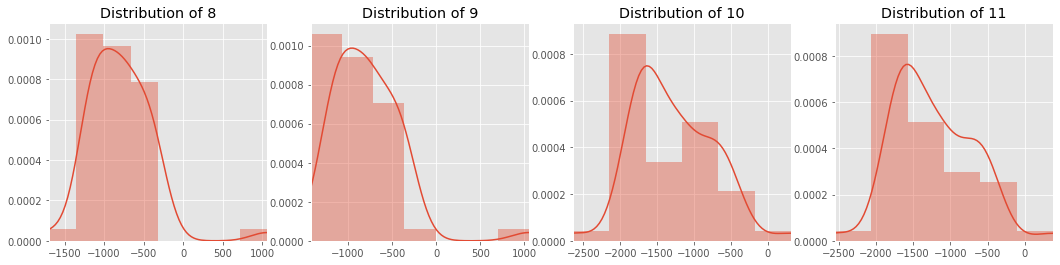

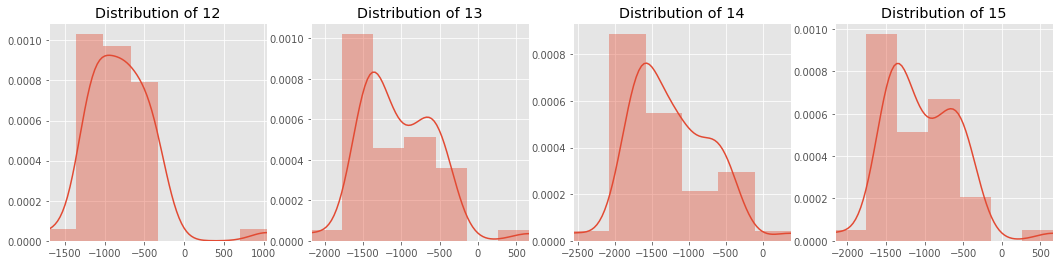

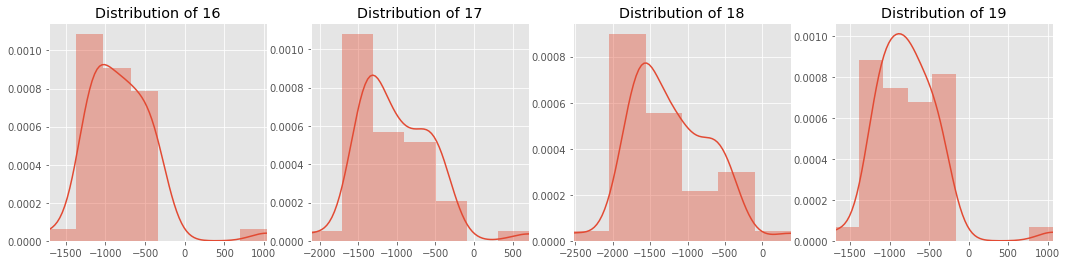

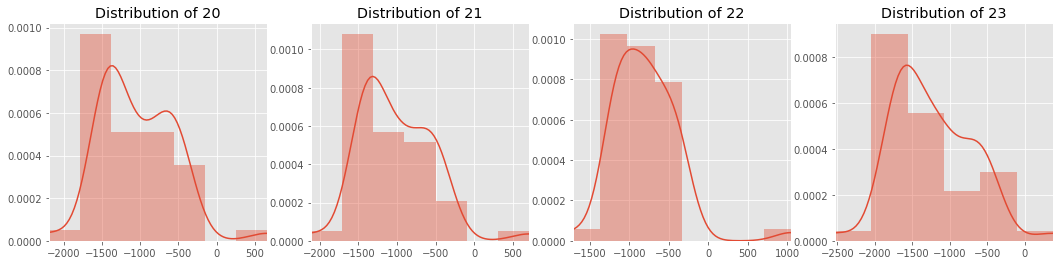

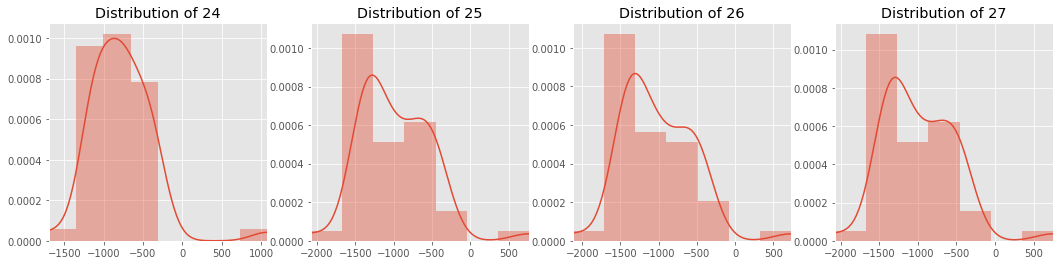

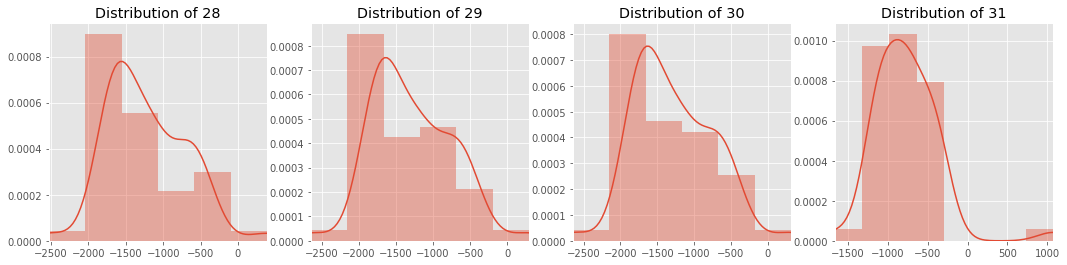

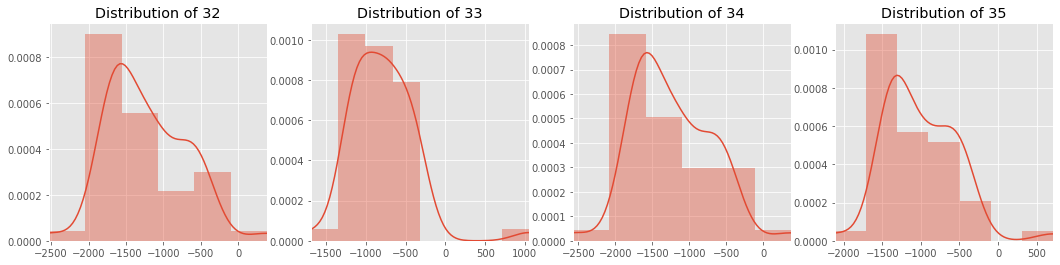

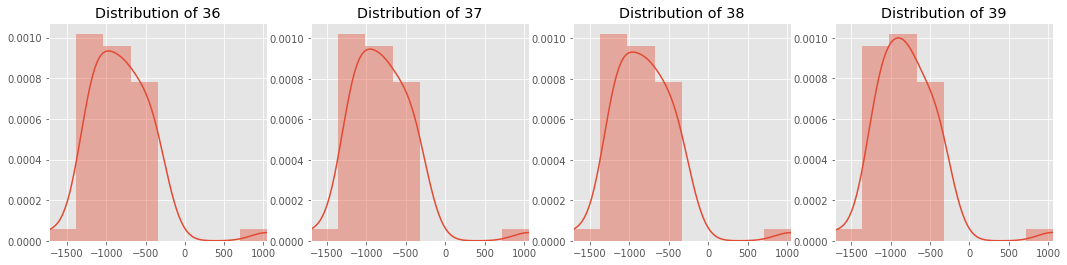

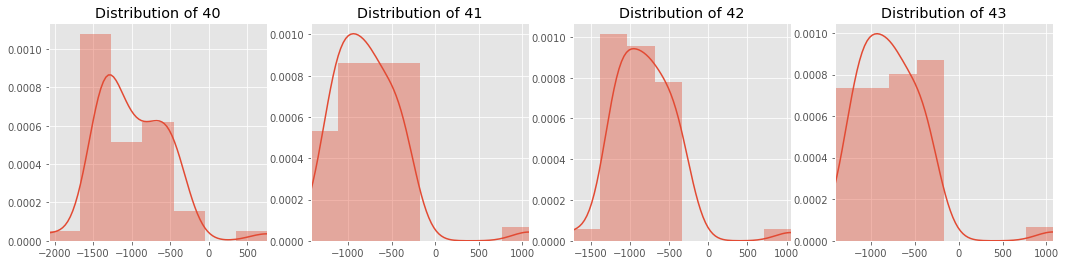

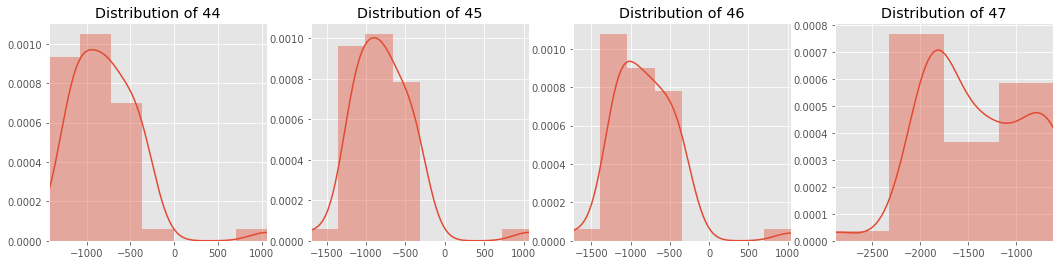

In [28]:
vs.distribution(feature_data_2, feature_data_2.columns, 4)

### Heatmap

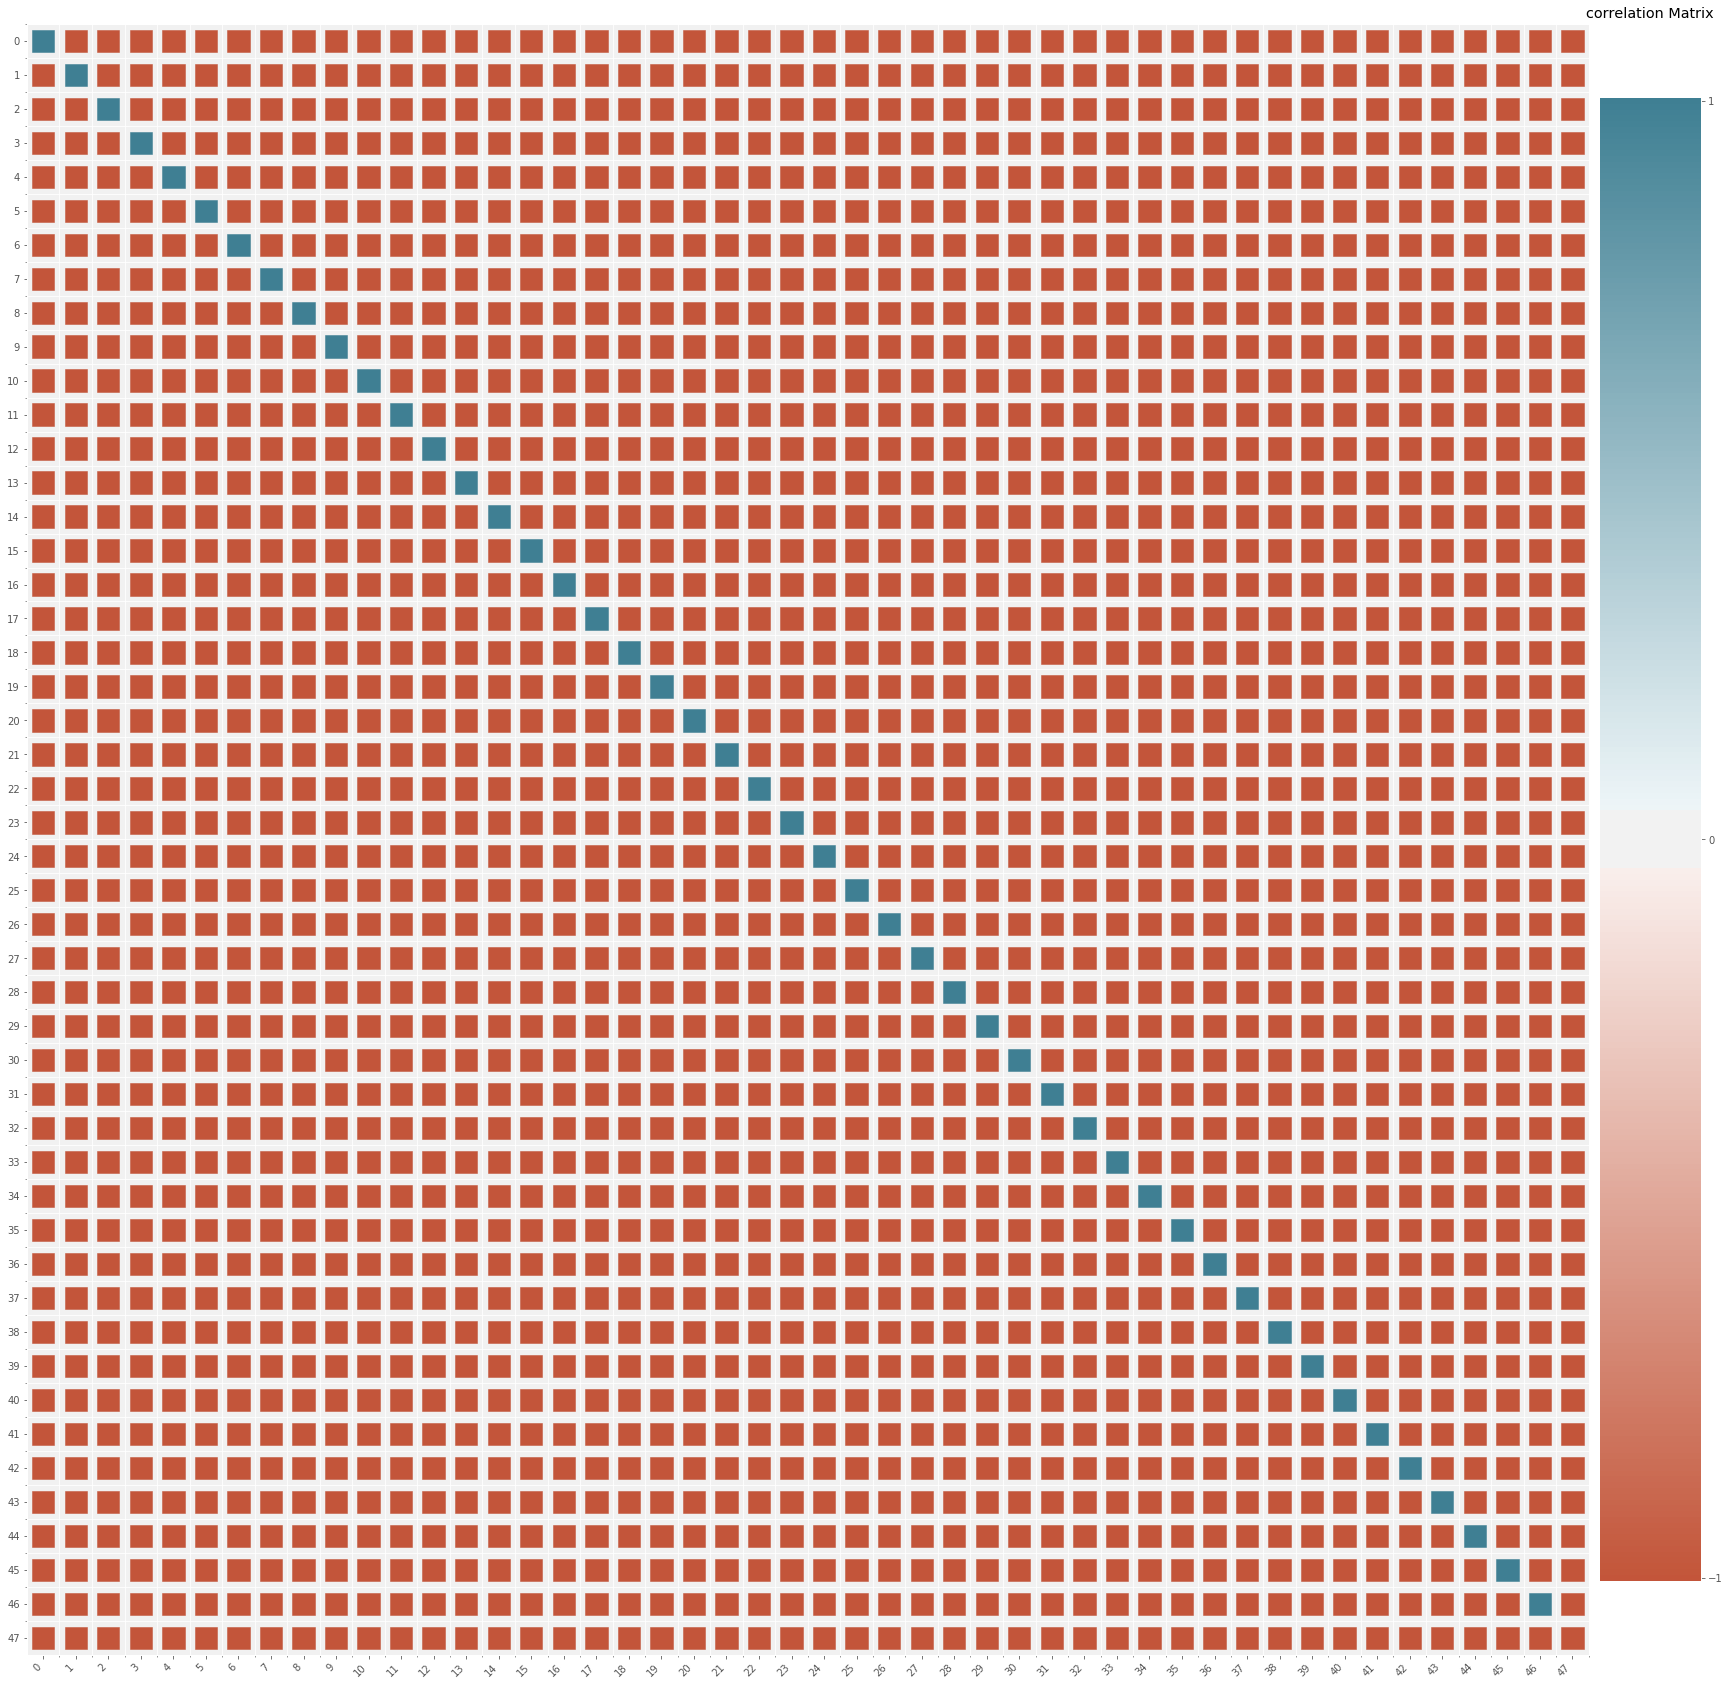

<Figure size 432x288 with 0 Axes>

In [29]:
vs.heatmap(feature_data_2, figsize=(30,30))

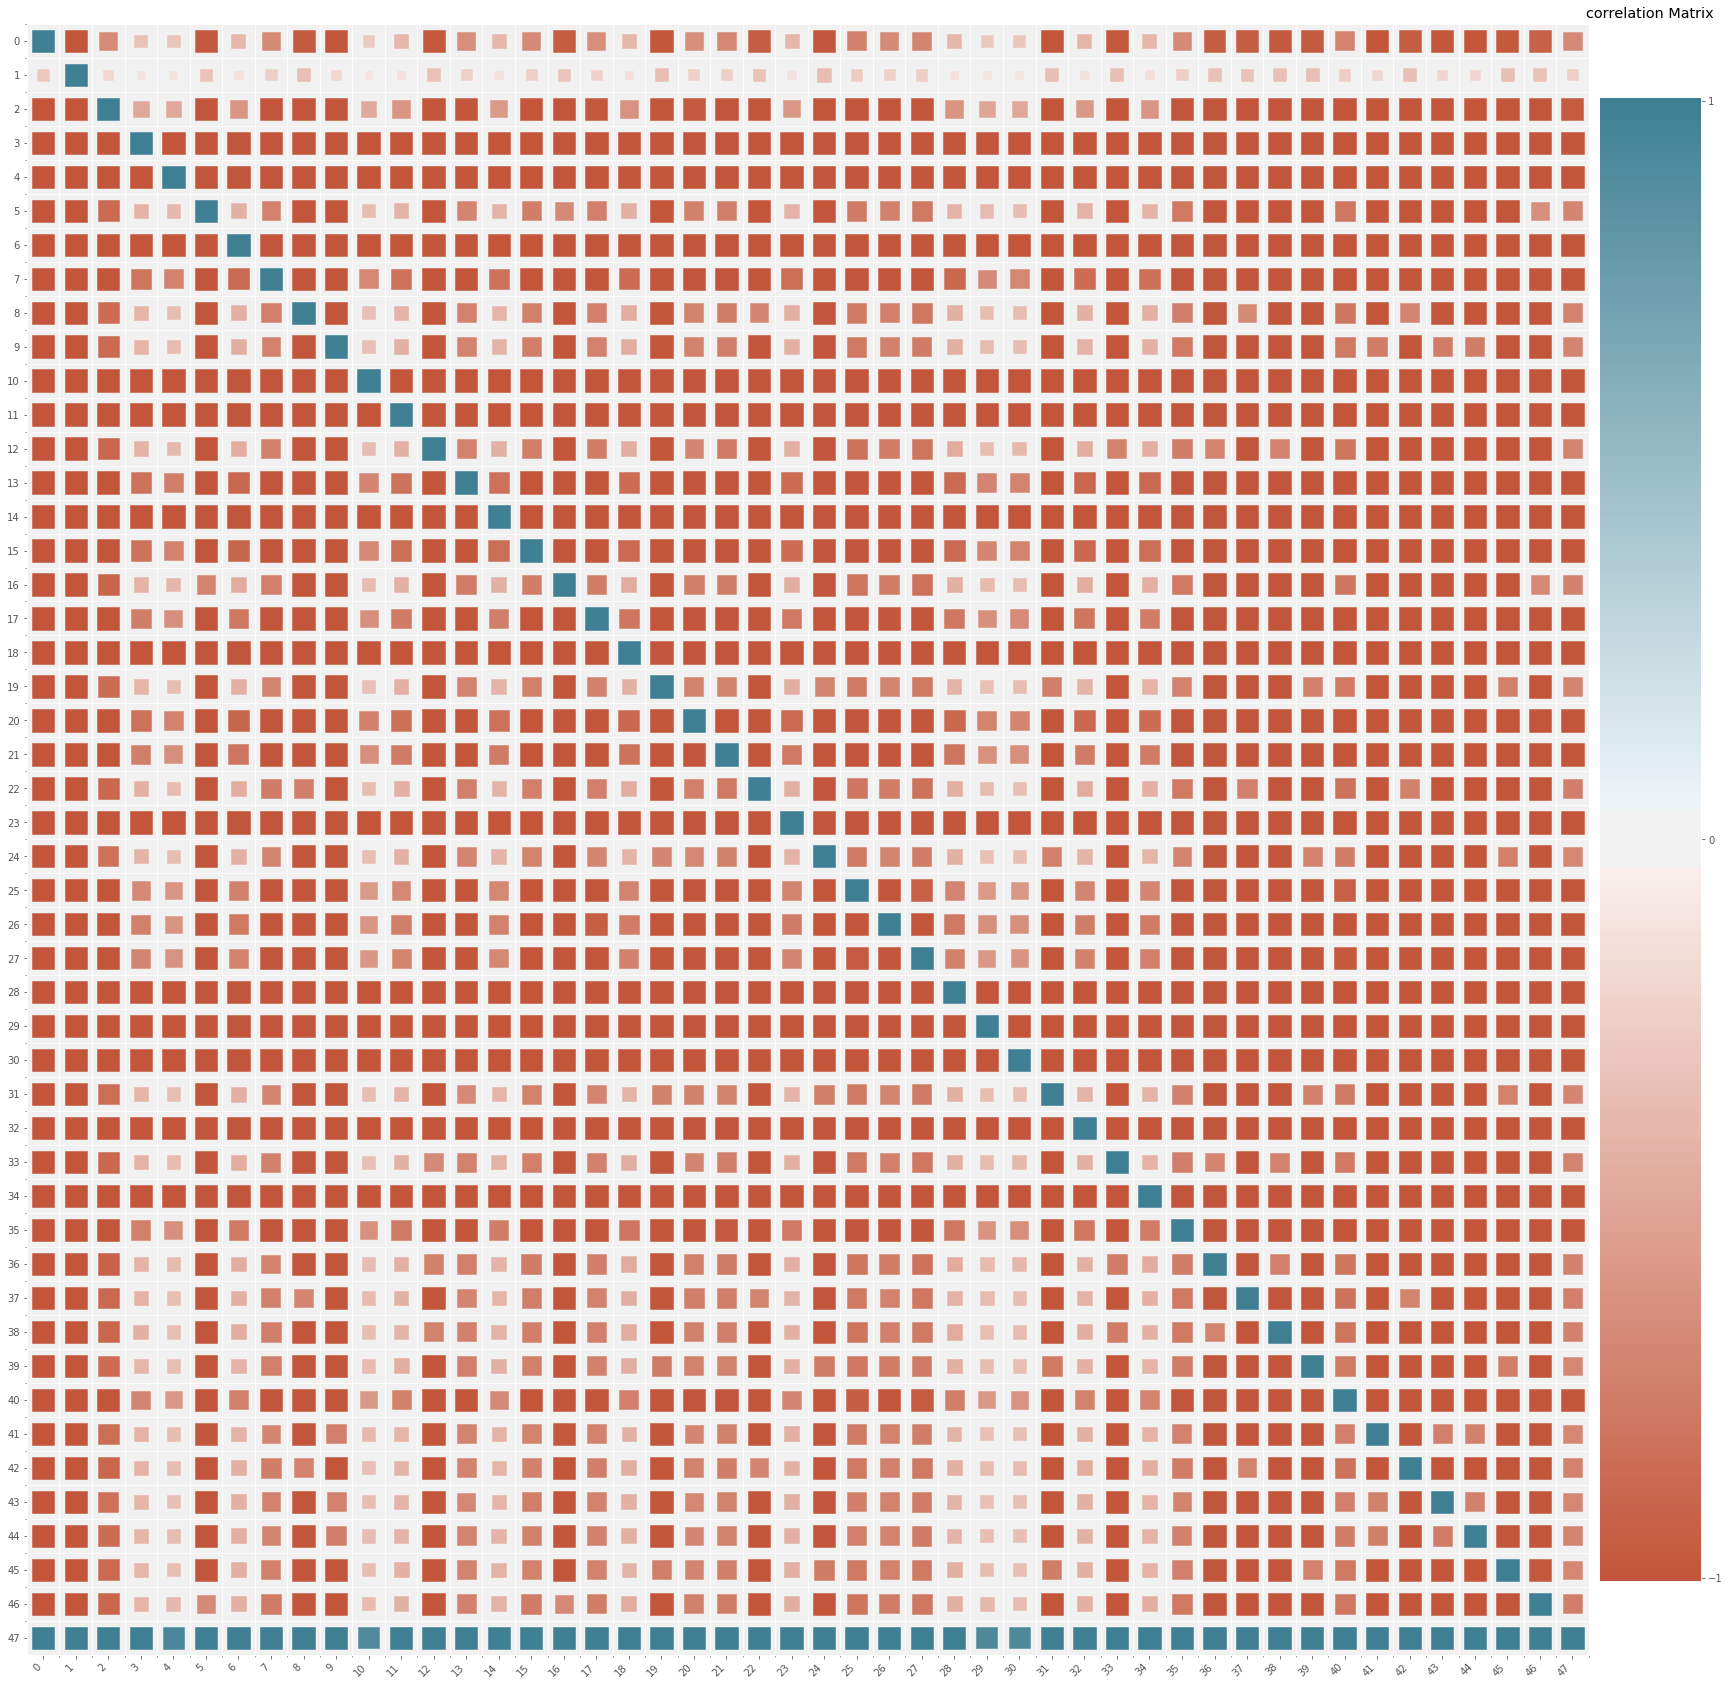

<Figure size 432x288 with 0 Axes>

In [109]:
feature_map = feature_data_2.copy()

for i in range(48):
    feature_map[i] = feature_map[i] / feature_data_2[i][i]

vs.heatmap(feature_map, figsize= (30,30))

In [112]:
feature_map.mean()

0    -0.690232
1    -0.207671
2    -1.065289
3    -3.228299
4    -3.861531
5    -0.753551
6    -3.170823
7    -1.521606
8    -0.742488
9    -0.741145
10   -3.995911
11   -3.247752
12   -0.763068
13   -1.545310
14   -3.195198
15   -1.527622
16   -0.776032
17   -1.416172
18   -3.171537
19   -0.722903
20   -1.566629
21   -1.418245
22   -0.764227
23   -3.245163
24   -0.715523
25   -1.266721
26   -1.373439
27   -1.301945
28   -3.134964
29   -4.341357
30   -4.041995
31   -0.718886
32   -3.195367
33   -0.746679
34   -3.238980
35   -1.400146
36   -0.767358
37   -0.747342
38   -0.759941
39   -0.738039
40   -1.292023
41   -0.718106
42   -0.750983
43   -0.718334
44   -0.731497
45   -0.728739
46   -0.771212
47    2.109789
dtype: float64

### corr

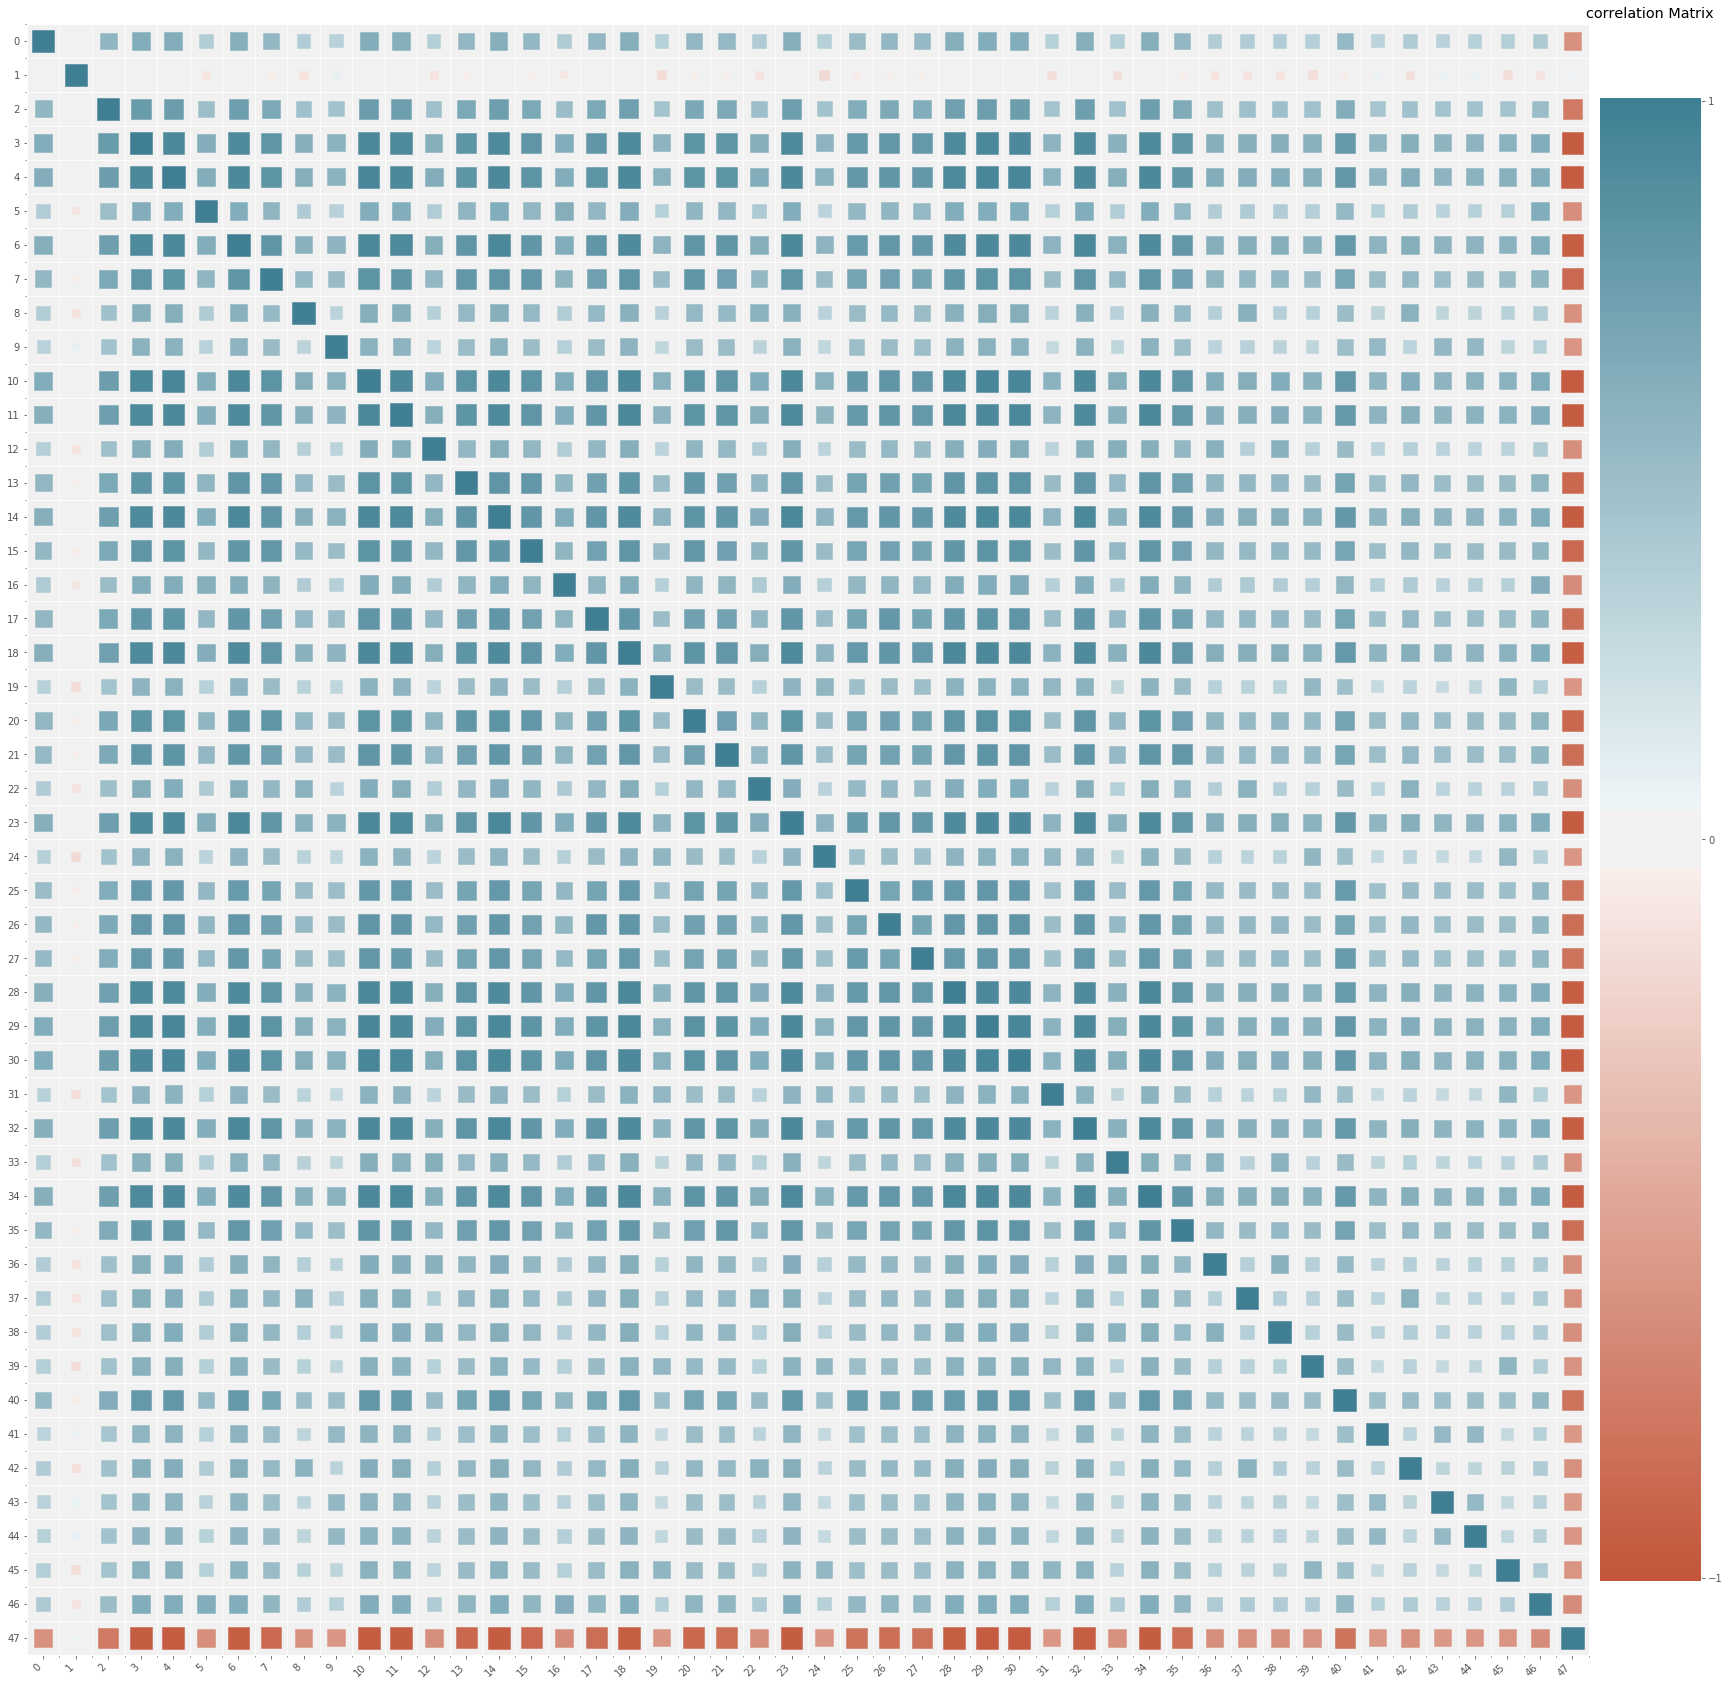

<Figure size 432x288 with 0 Axes>

In [110]:
vs.corrplot(feature_map, figsize=(30,30))

## hypothesis 3

In [23]:
def featue_engineer_3(_list, list_n):

    len_list = len(_list)
    if len_list != 1:
        for i in range(len_list):
            for j in range(len_list)[::-1]:
                feature_matrix[_list[i]-1][_list[j]-1] += 1 / len_list

    non_in_list = list(set(list_n).difference(set(_list)))

    len_non_in = len(non_in_list)
    
    for i in range(len_non_in):
        for j in range(len_non_in)[::-1]:
            if len_list > 8:
                feature_matrix[non_in_list[i] -
                               1][non_in_list[j]-1] -= len_list/(48*8)

In [24]:
list_48 = [x for x in range(48)]
feature_matrix = np.zeros((48,48))

for index in range(num_of_rows_history):
    featue_engineer_3(purchase_history.iloc[index,1], list_48)

In [25]:
feature_data_3 = reduce_memory(feature_matrix)

___MEMORY USAGE AFTER COMPLETION:___
reduced df from 0.0177 MB to 0.0045 MB 
This is  25.517241379310345 % of the initial size


### Save Data

In [50]:
file.save_pickle(feature_data_3_path,feature_data_3)

Directory  /home/phuc/Desktop/Work/Data Sience/Project/item_cluster/data/processed/feature_data  already exists
Saved file feature_data_3.pkl


### load_data

In [16]:
feature_data_3 = file.load_pickle(feature_data_3_path)

Loaded file feature_data_3.pkl


### distribution in feature

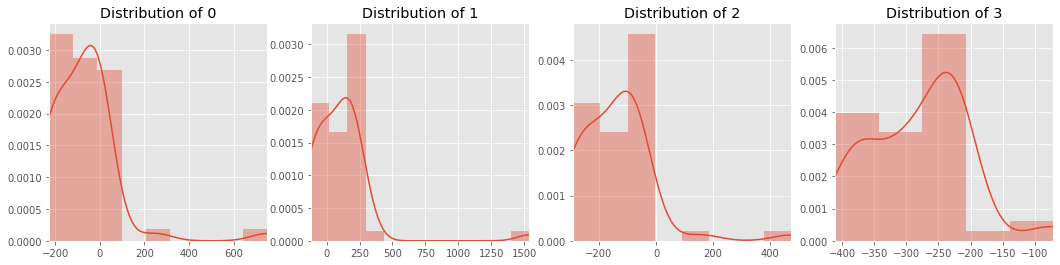

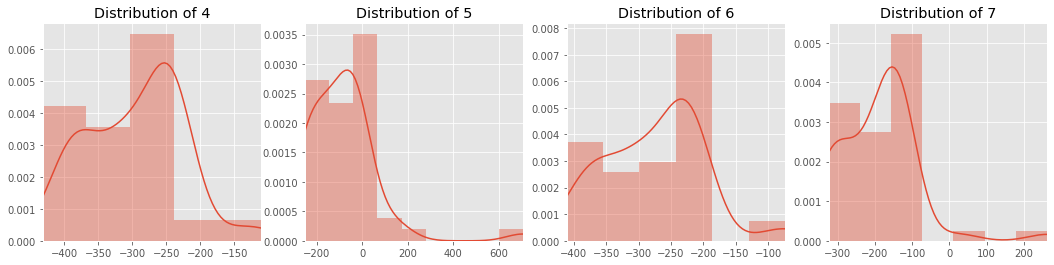

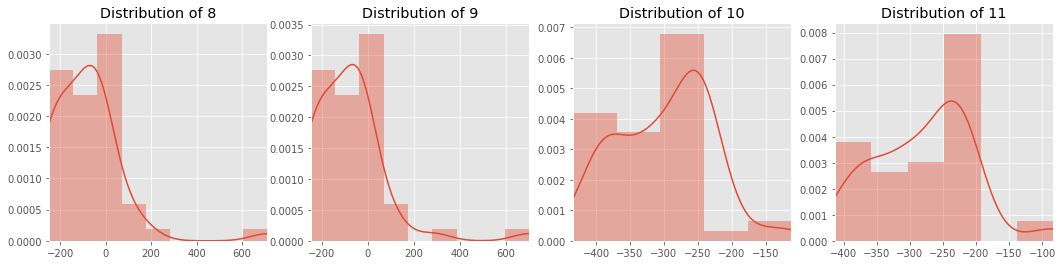

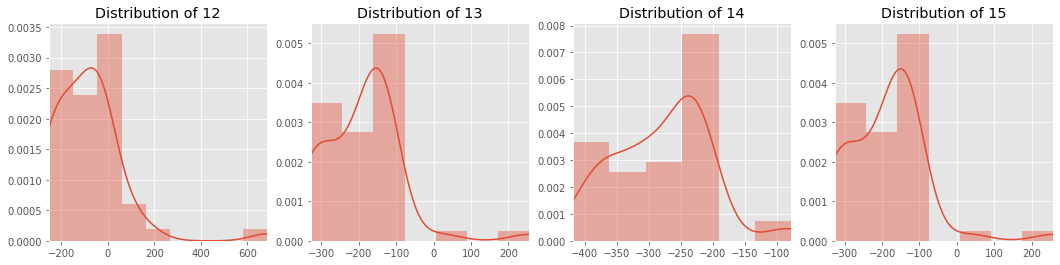

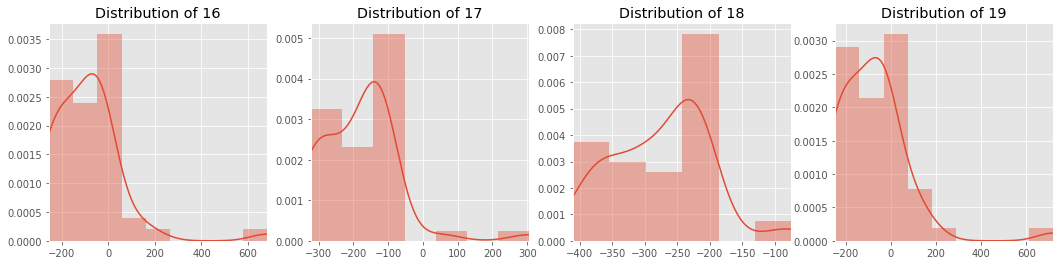

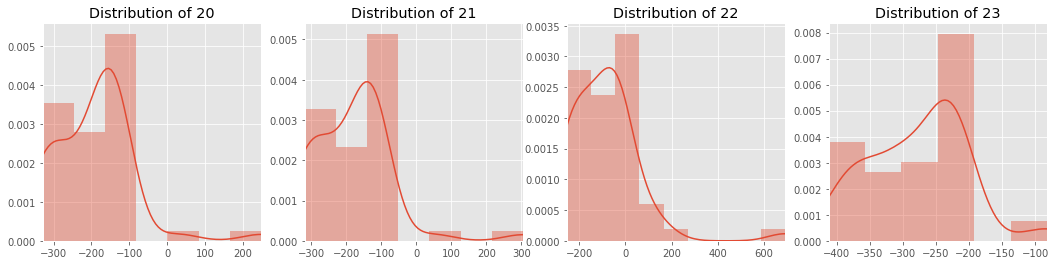

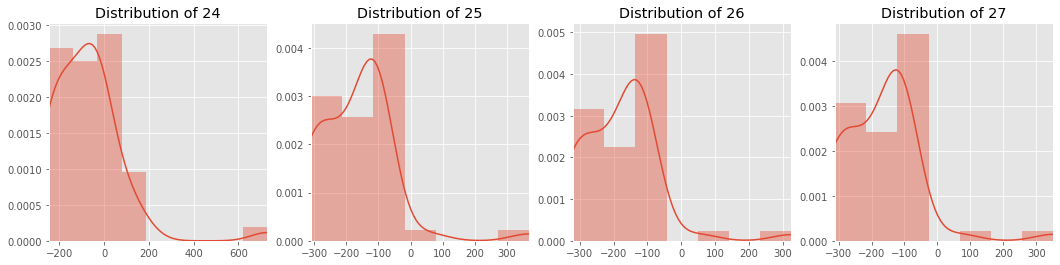

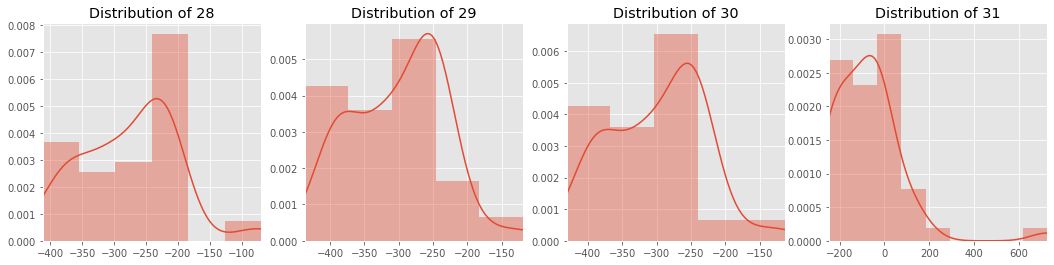

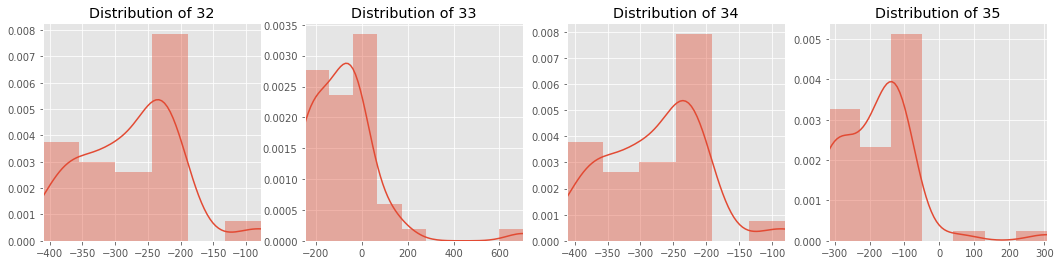

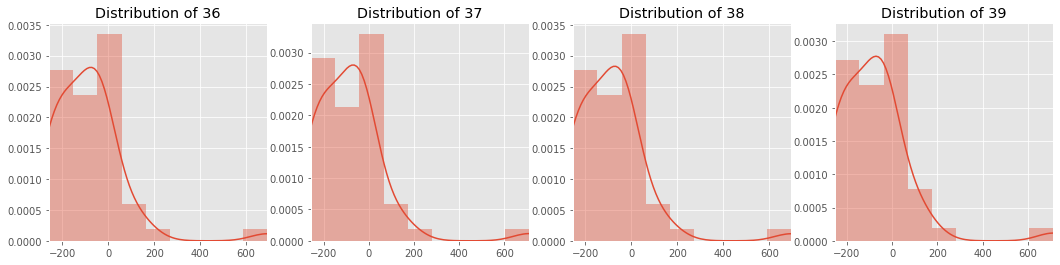

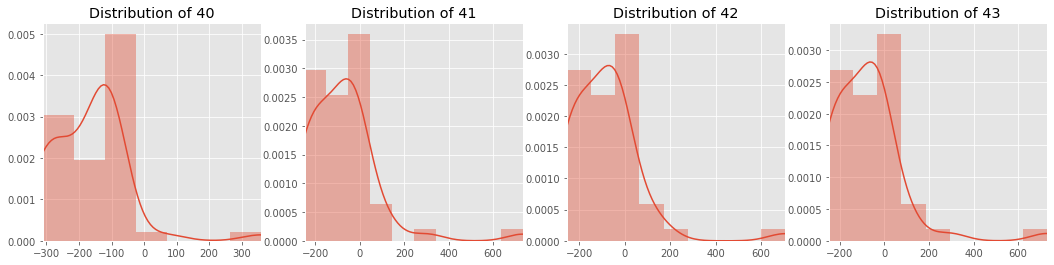

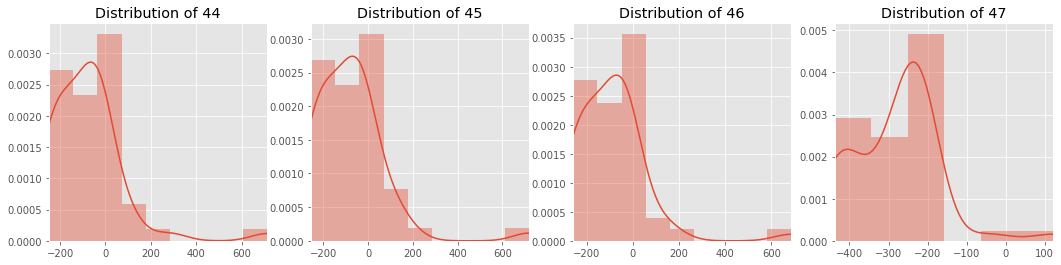

In [28]:
vs.distribution(feature_data_3,feature_data_3.columns,4)

### heatmap

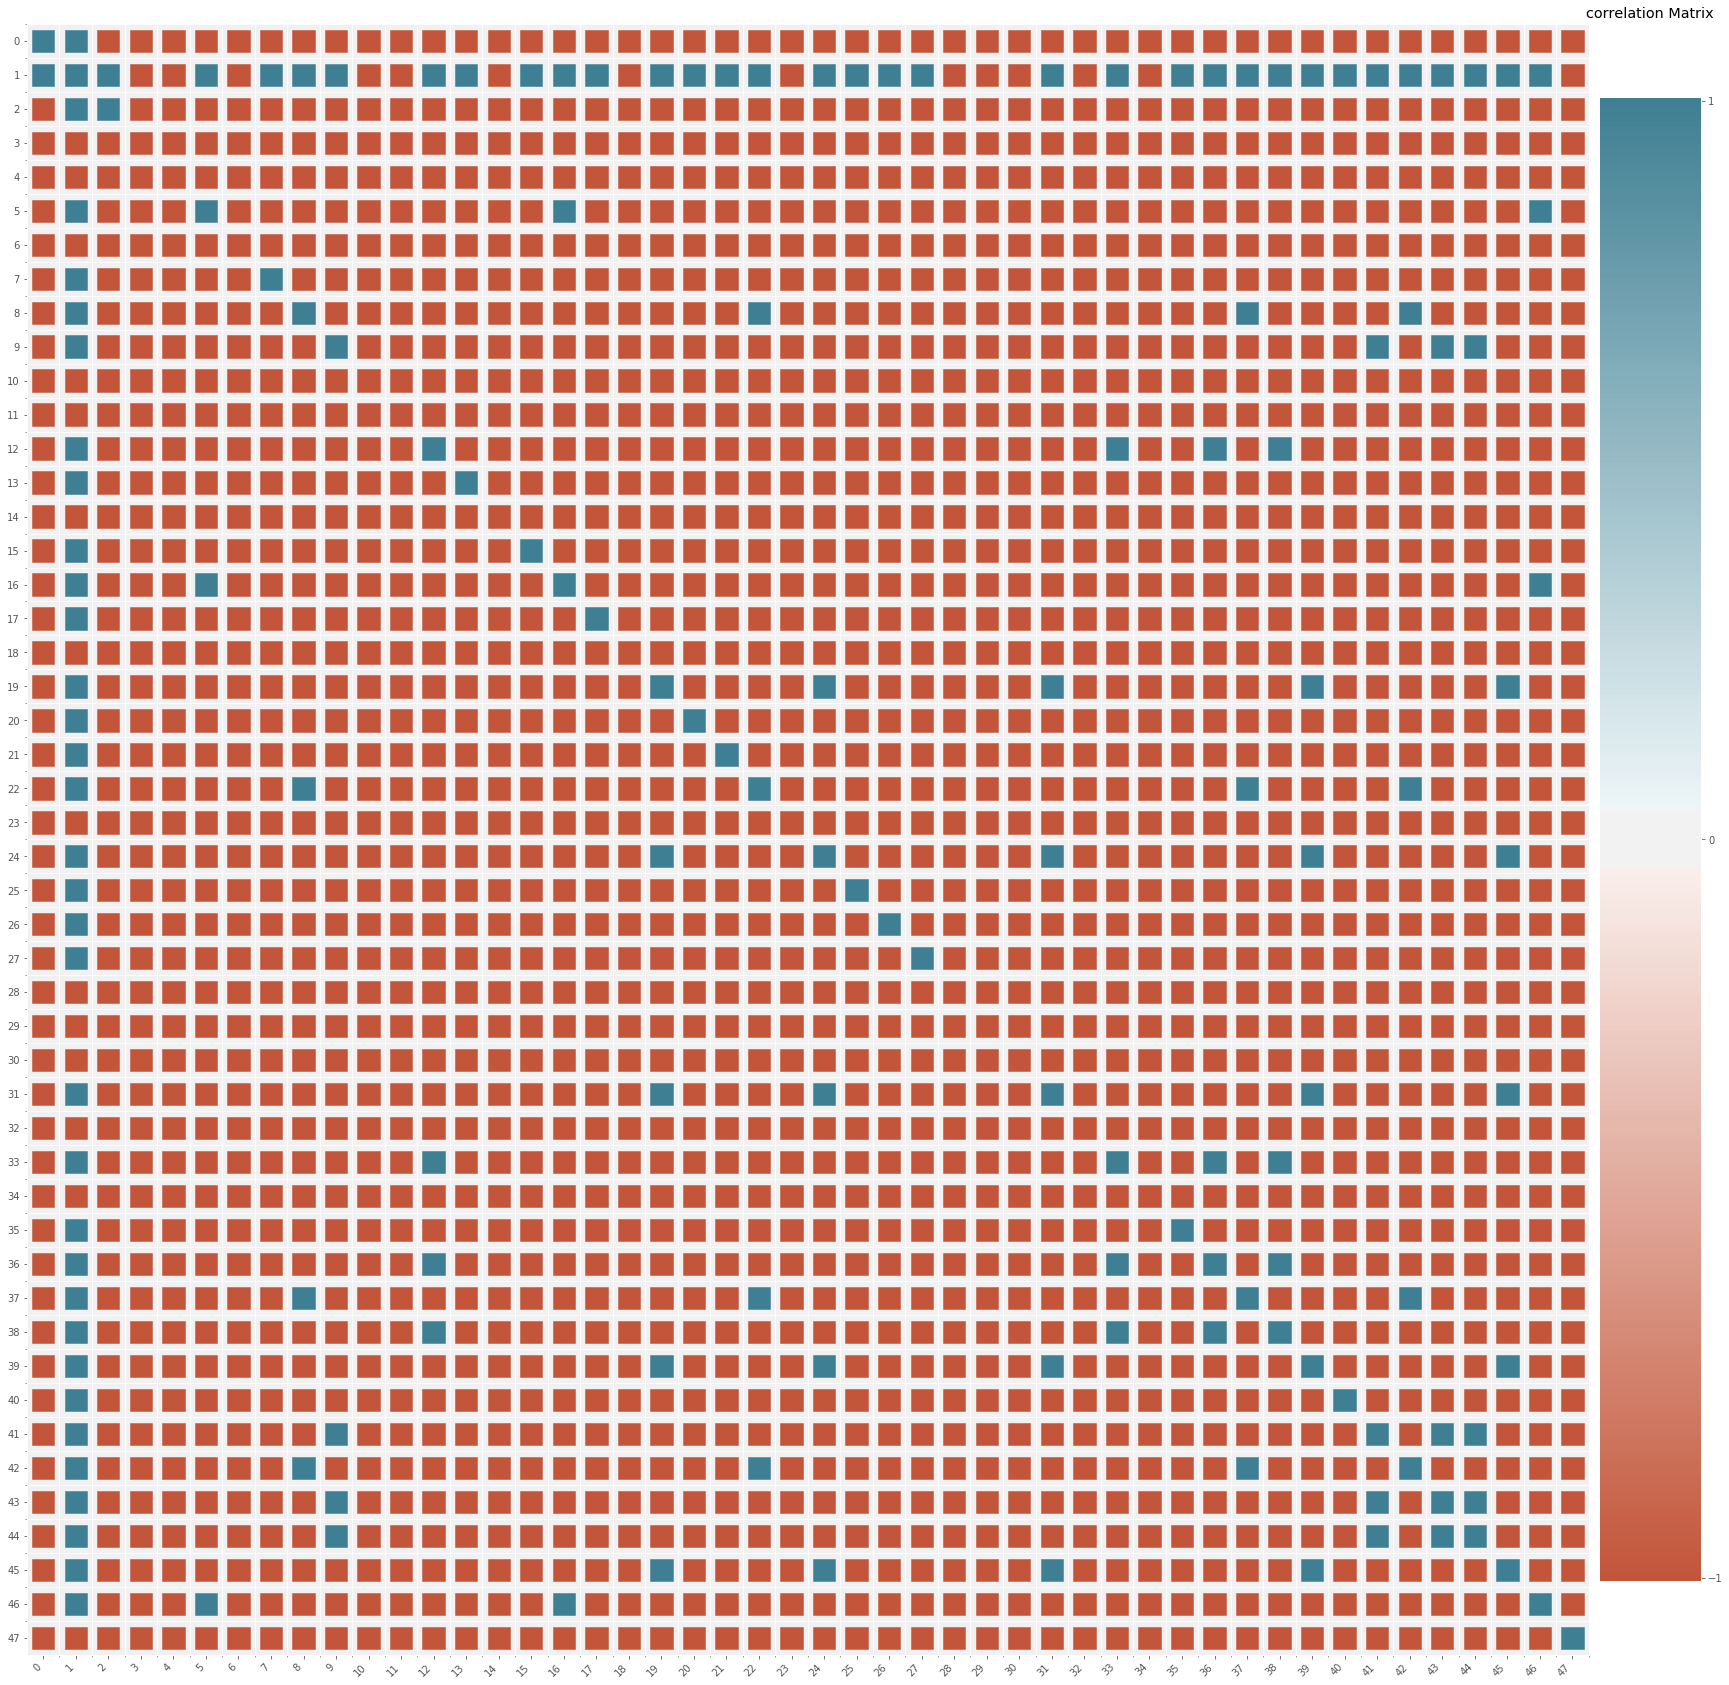

<Figure size 432x288 with 0 Axes>

In [169]:
vs.heatmap(feature_data_3, figsize=(30,30))

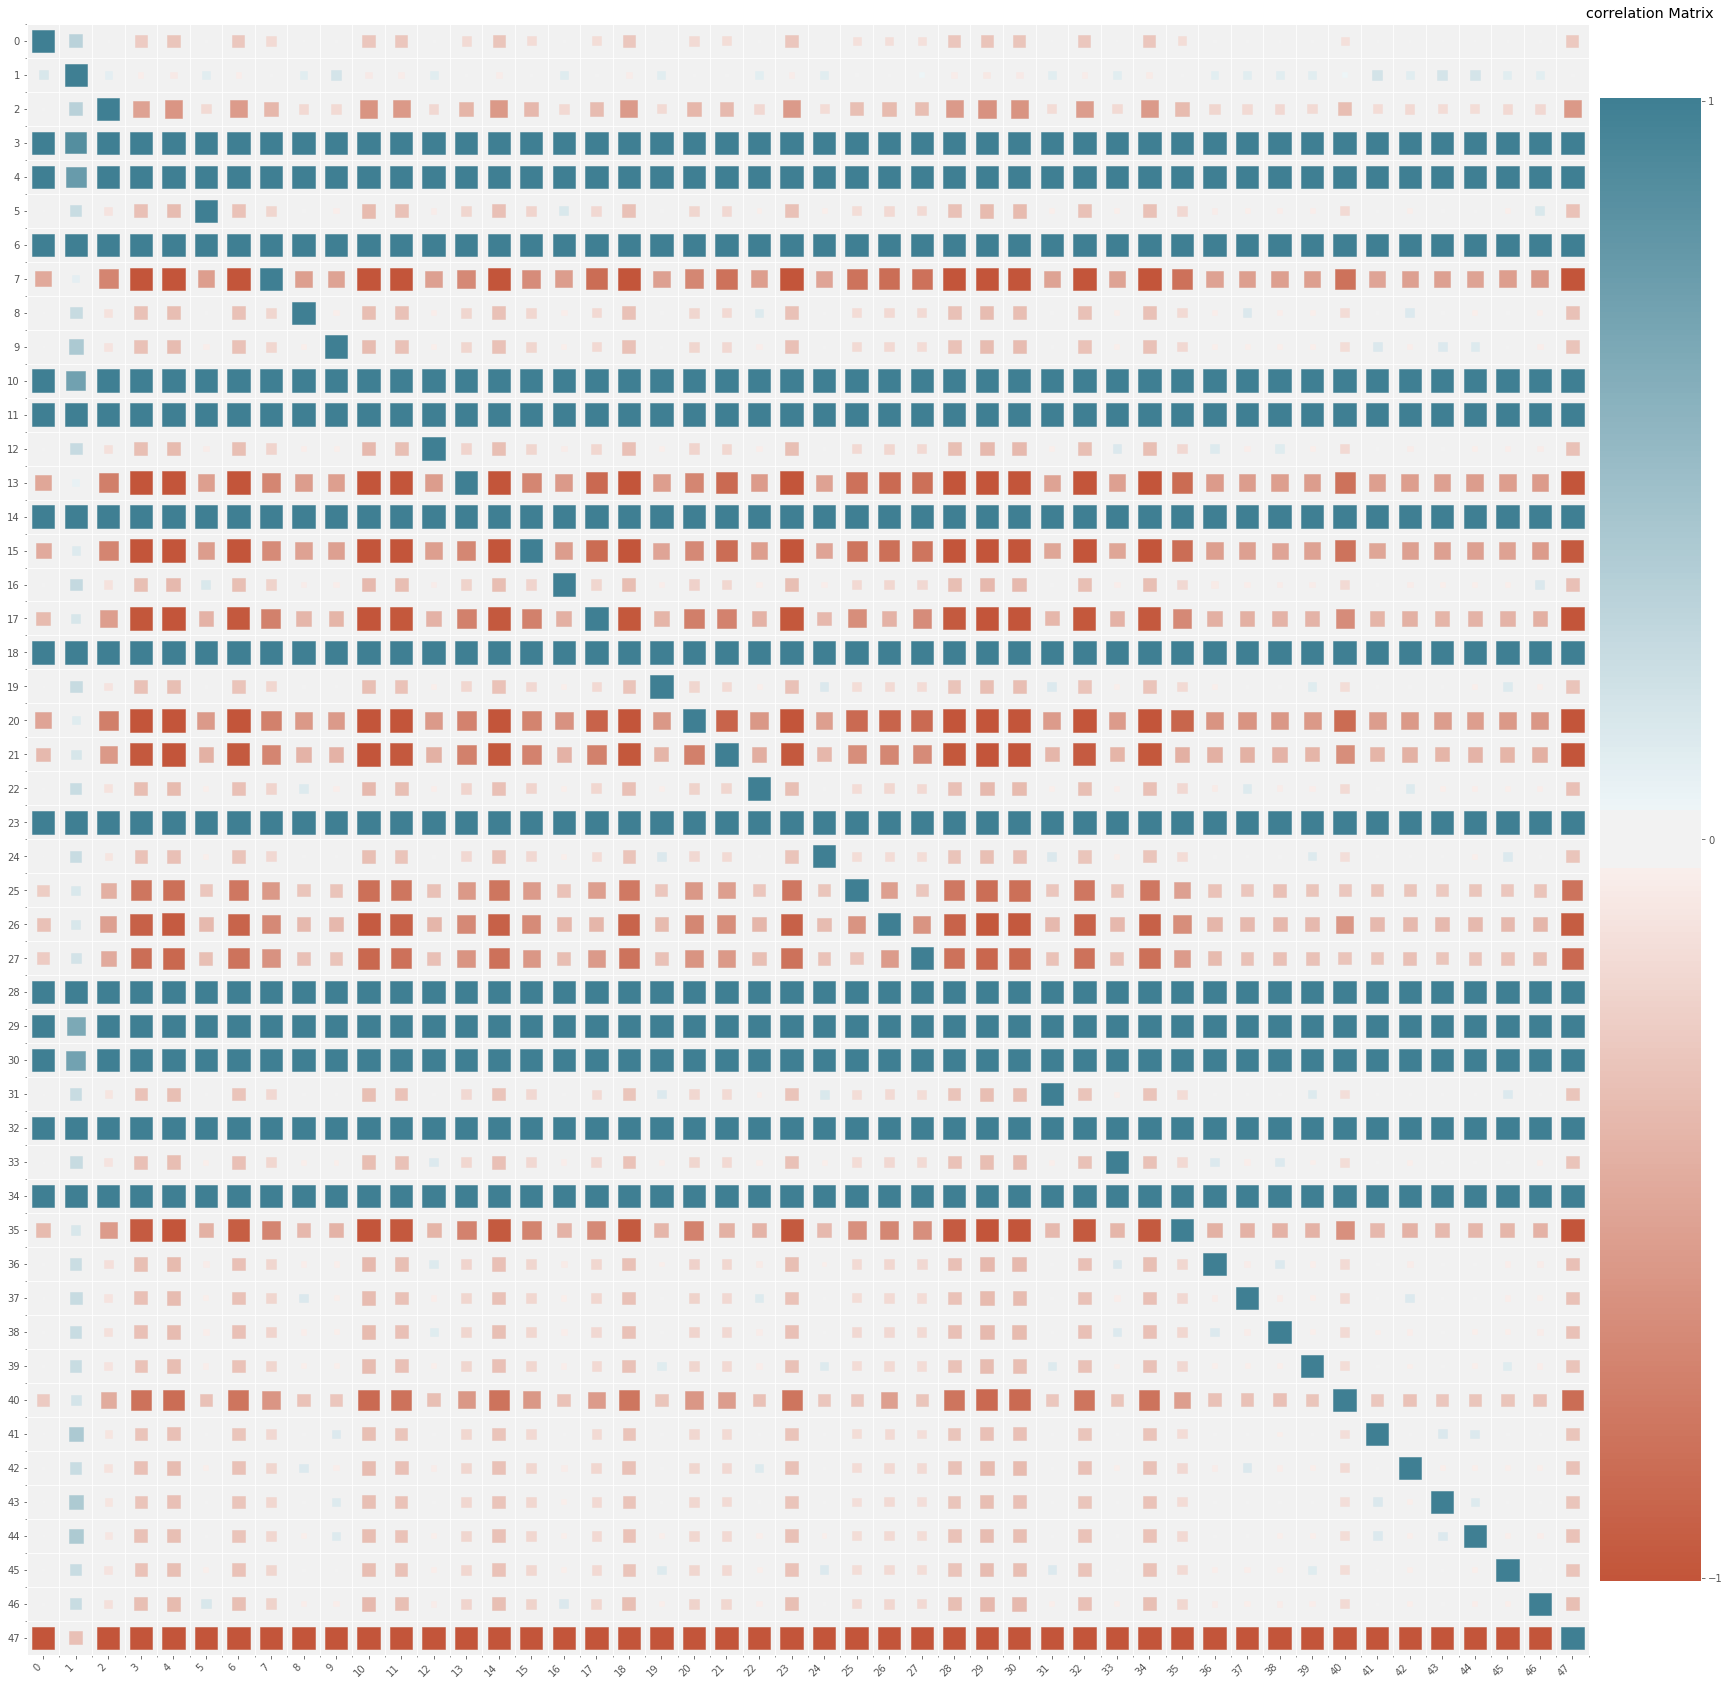

<Figure size 432x288 with 0 Axes>

In [170]:
feature_map = feature_data_3.copy()

for i in range(48):
    feature_map[i] = feature_map[i] / feature_data_3[i][i]

vs.heatmap(feature_map, figsize= (30,30))

### corr

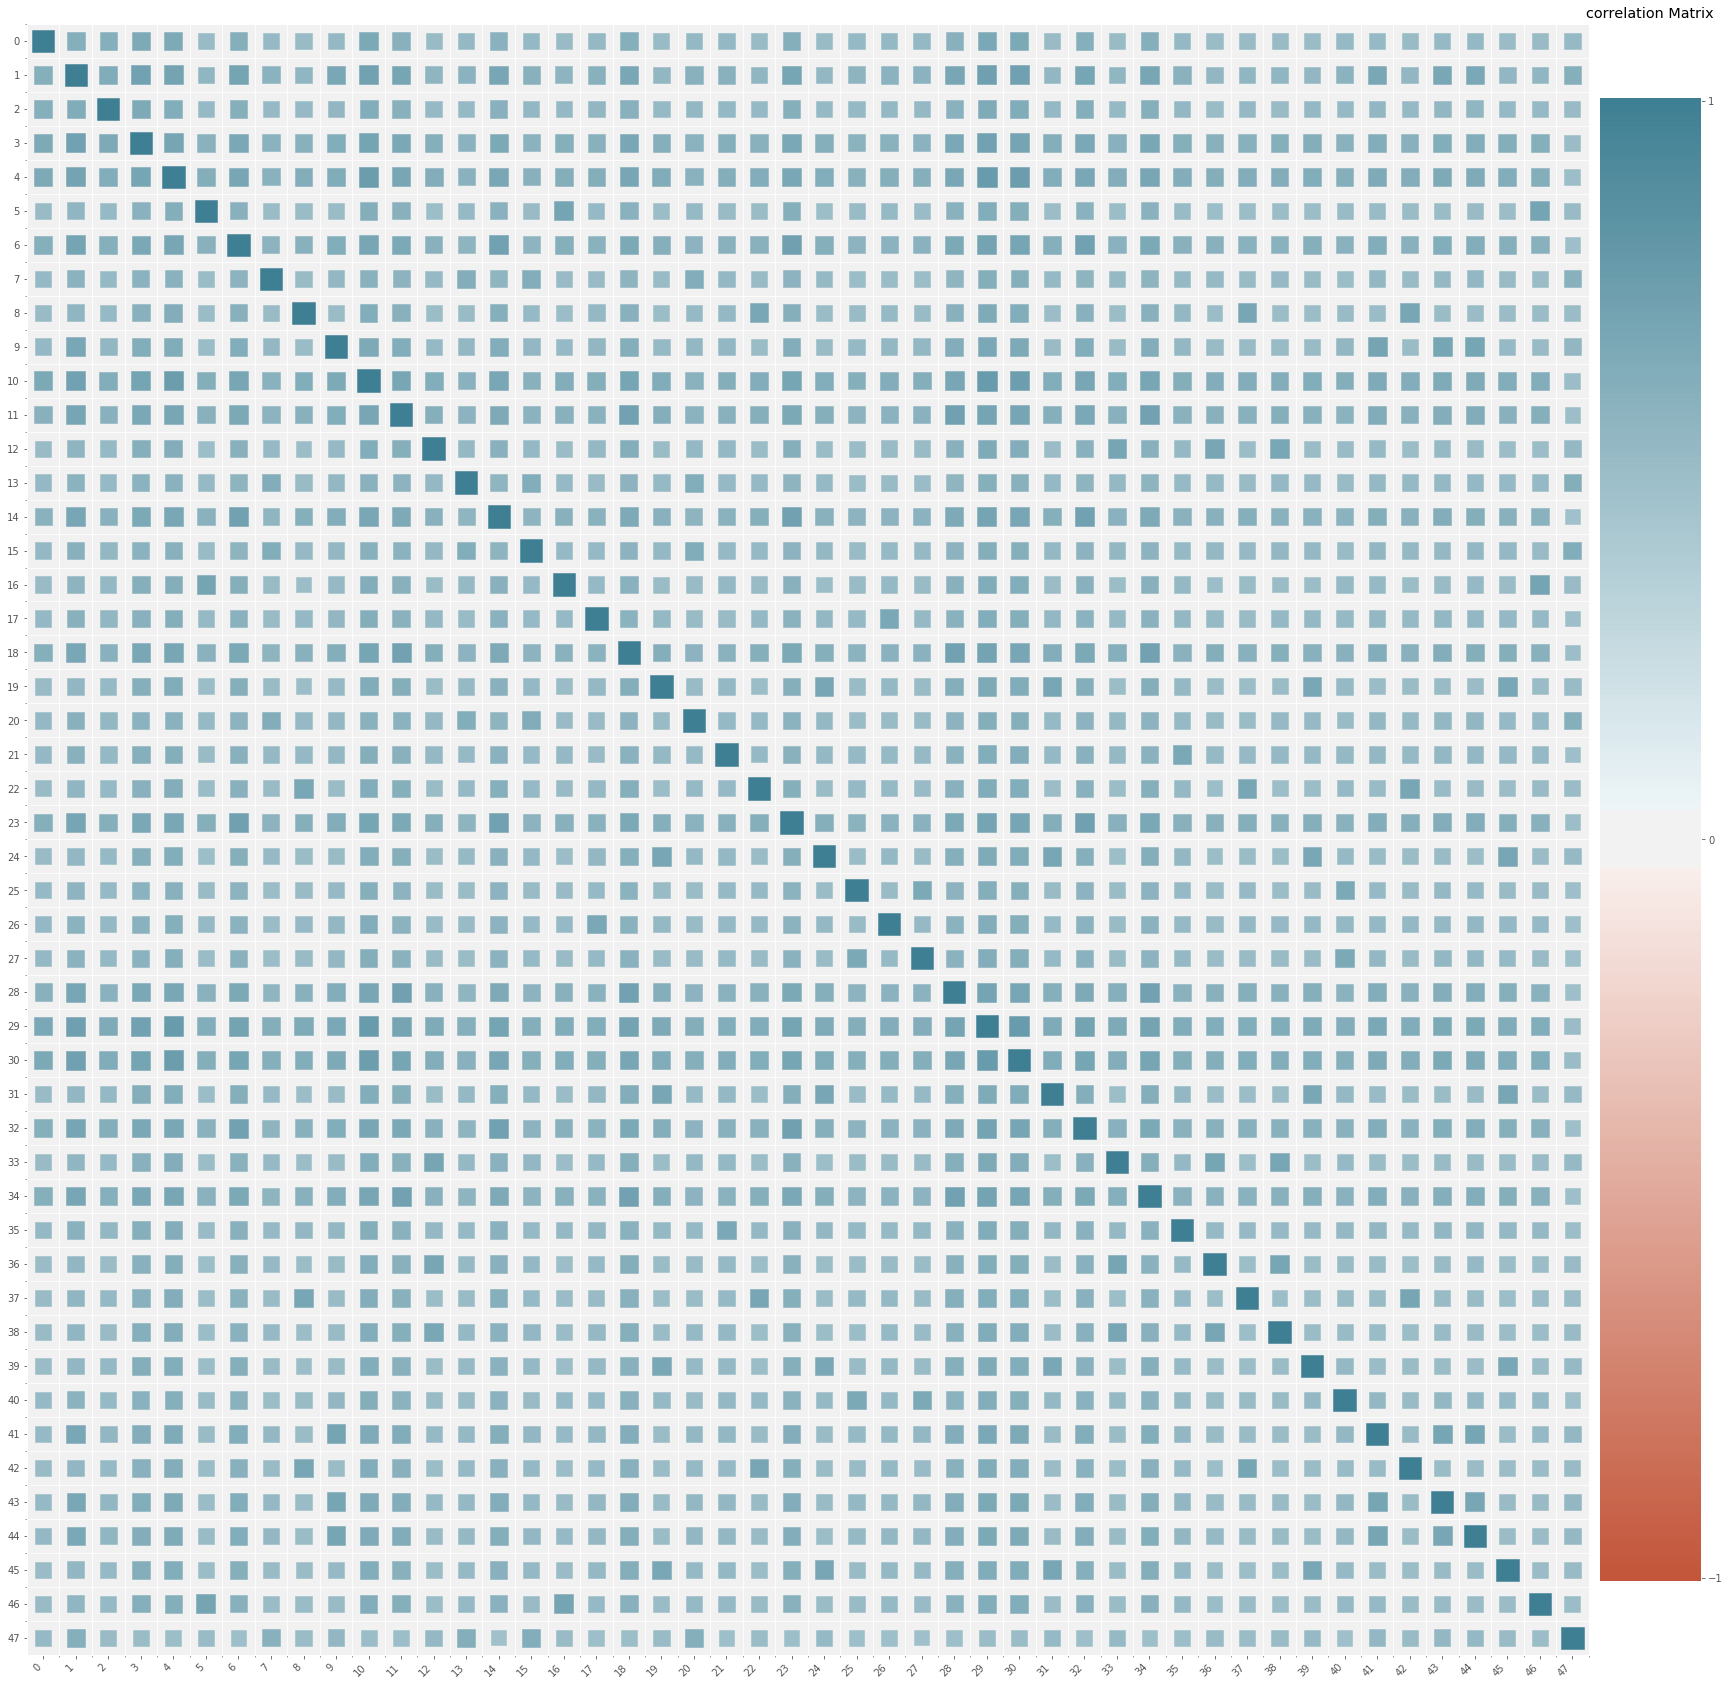

<Figure size 432x288 with 0 Axes>

In [29]:
vs.corrplot(feature_data_3, figsize= (30,30))

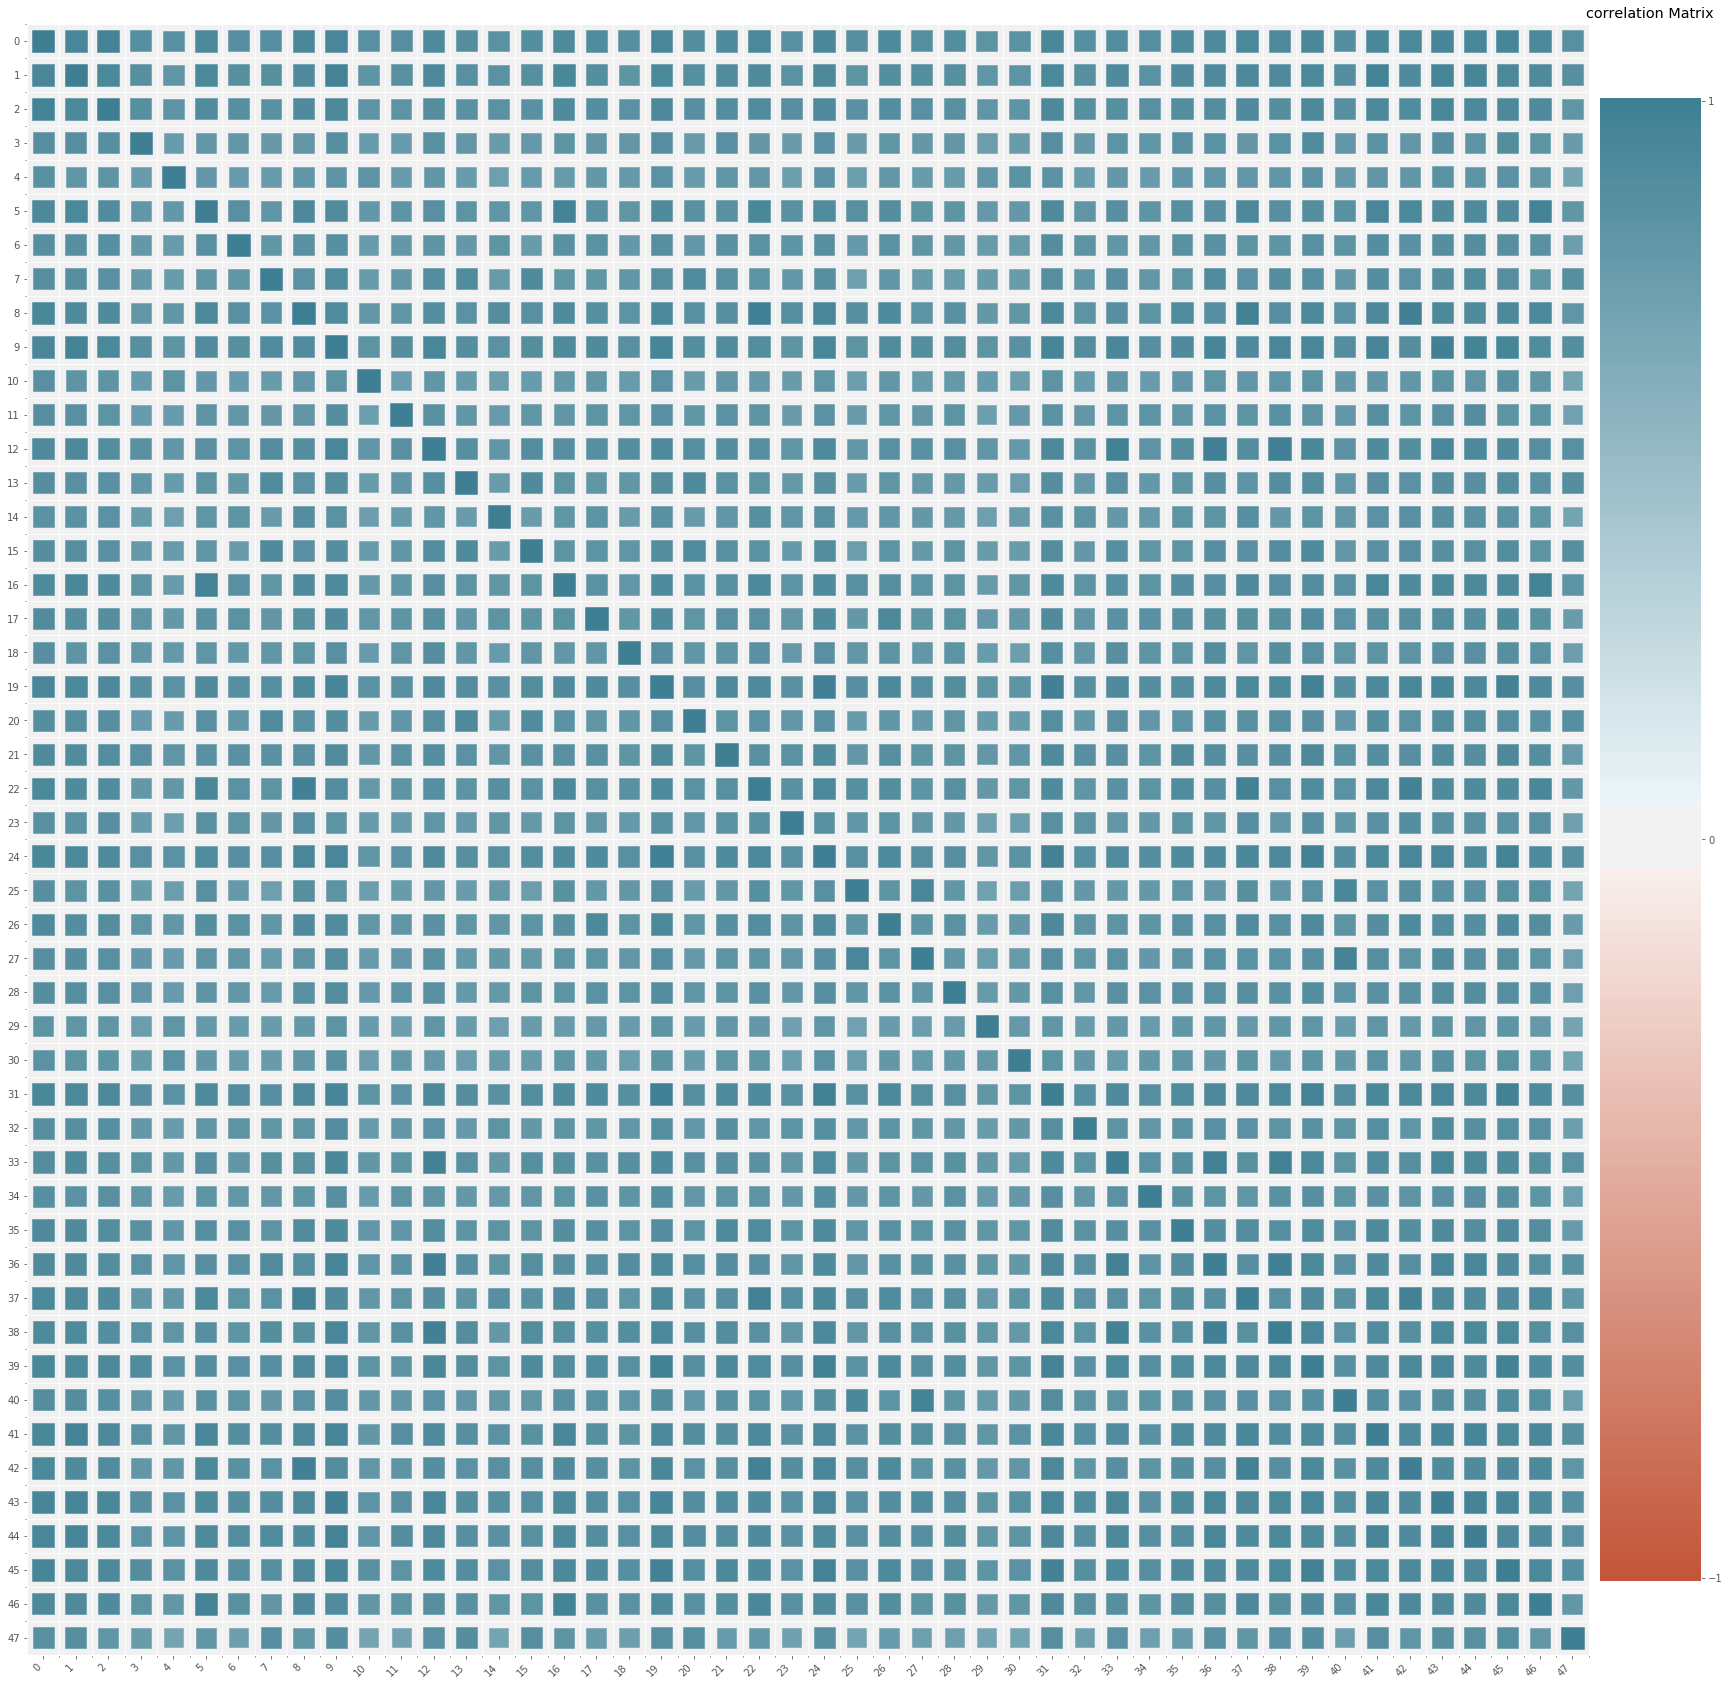

<Figure size 432x288 with 0 Axes>

In [32]:
vs.corrplot(feature_data_3, figsize= (30,30), method = 'spearman')

### t-sene

In [151]:
embeded_feature = TSNE(n_components=2).fit_transform(feature_data_3)

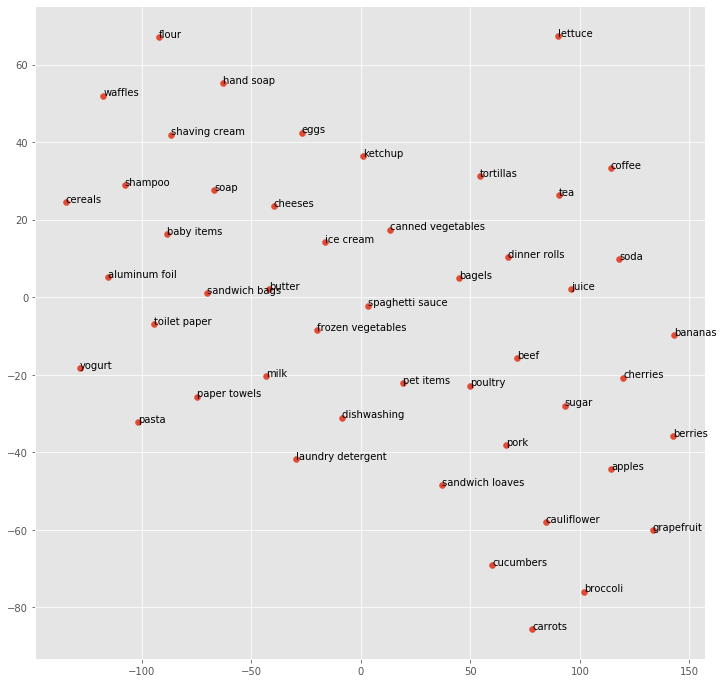

In [152]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(embeded_feature[:,0],embeded_feature[:,1])

for i, name in enumerate(item_to_id['Item_name']):
    ax.annotate(name, embeded_feature[i])


In [153]:
clustering = OPTICS(min_samples=2).fit(feature_data_3)

In [154]:
clustering.labels_

array([-1, -1, -1, -1,  5,  7,  6,  1,  8, 10,  5,  4,  9,  1,  6,  1,  7,
        0,  4, 11,  1,  2,  8,  6, 11,  3,  0,  3,  4,  5,  5, 11,  6,  9,
        4,  2,  9,  8,  9, 11,  3, 10,  8, 10, 10, 11,  7, -1])

### optics

In [155]:
item_to_id['OPTICS_2'] = clustering.labels_
item_to_id.sort_values('OPTICS_2')

Item_name  Item_id  OPTICS_2
0               sugar        1        -1
3          baby items        4        -1
47             yogurt       48        -1
1             lettuce        2        -1
2           pet items        3        -1
26       dishwashing        27         0
17  laundry detergent       18         0
7              butter        8         1
20            cheeses       21         1
13               eggs       14         1
15               milk       16         1
35          ice cream       36         2
21  frozen vegetables       22         2
40            ketchup       41         3
27  canned vegetables       28         3
25    spaghetti sauce       26         3
18      shaving cream       19         4
11            shampoo       12         4
34               soap       35         4
28          hand soap       29         4
4             waffles        5         5
10            cereals       11         5
30              pasta       31         5
29              flour       30         5
23       paper towels       24         6
32       toilet paper       33         6
14      aluminum foil       15         6
6       sandwich bags        7         6
5             poultry        6         7
16               beef       17         7
46               pork       47         7
22                tea       23         8
37              juice       38         8
8                soda        9         8
42             coffee       43         8
38    sandwich loaves       39         9
33          tortillas       34         9
36       dinner rolls       37         9
12             bagels       13         9
44        cauliflower       45        10
43           broccoli       44        10
9             carrots       10        10
41          cucumbers       42        10
39            berries       40        11
19         grapefruit       20        11
24           cherries       25        11
45            bananas       46        11
31             apples       32        11

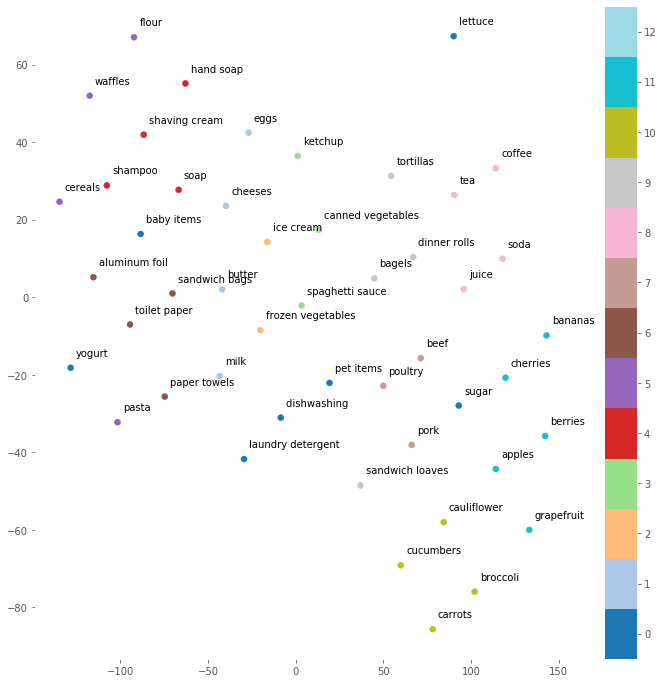

In [167]:
plt.figure(figsize=(12,12))
plt.gca().set_facecolor('white')
plt.grid()
plt.scatter(embeded_feature[:,0], embeded_feature[:,1], c=item_to_id['OPTICS_2'], cmap=plt.cm.get_cmap("tab20", 13))
for i, name in enumerate(item_to_id['Item_name']):
    plt.annotate(name, embeded_feature[i]+3)
plt.colorbar(ticks=range(13))
plt.clim(-0.5, 12.5)
plt.show()

## hypothesis 4

In [19]:
import heapq

def featue_engineer_4(_list,list_n):
    
    len_list = len(_list)
    if len_list != 1:
        for i in range(len_list):
            for j in range(len_list)[::-1]: 
                feature_matrix[_list[i]-1][_list[j]-1] += 1/ len_list
            
            if len_list > 8:
                
                non_in_list = list(set(list_n).difference(_list))
                len_non_in = len(non_in_list)
                
                for j in range(len_non_in)[::-1]:
                    feature_matrix[_list[i]-1][non_in_list[j]-1] -= len_list/(len_non_in *8)
    
    for i in range(feature_matrix.shape[0]):
        second_largest = heapq.nlargest(2, feature_matrix[i])[1]
        feature_matrix[i][i] = second_largest*1.25 
        

In [20]:
list_48 = [x for x in range(48)]
feature_matrix = np.zeros((48,48))

for index in range(num_of_rows_history):
    featue_engineer_4(purchase_history.iloc[index,1], list_48)

In [21]:
feature_data_4 = reduce_memory(feature_matrix)

___MEMORY USAGE AFTER COMPLETION:___
reduced df from 0.0177 MB to 0.0045 MB 
This is  25.517241379310345 % of the initial size


### save_data

In [49]:
file.save_pickle(feature_data_4_path,feature_data_4)

Directory  /home/phuc/Desktop/Work/Data Sience/Project/item_cluster/data/processed/feature_data  Created 
Saved file feature_data_4.pkl


### load_data

In [15]:
feature_data_4 = file.load_pickle(feature_data_4_path)

Loaded file feature_data_4.pkl


In [39]:
feature_data_4.var(axis =1)

0     11822.942819
1     23684.318706
2      8649.113032
3      1578.040780
4       874.435727
5     11847.615248
6      1333.563387
7      3974.636525
8     12694.205674
9     17086.882535
10      885.159131
11     1195.127216
12    12545.414450
13     4011.000000
14     1135.038564
15     4313.584663
16    11913.445035
17     4946.414450
18     1210.329344
19    13622.040780
20     3973.588652
21     4815.999557
22    12265.312057
23     1248.510195
24    13481.950355
25     5533.487589
26     4932.510195
27     5627.035461
28     1330.920213
29      797.503546
30      847.984043
31    13633.785461
32     1275.020833
33    12575.435727
34     1113.870567
35     4834.758865
36    12206.308067
37    12777.722961
38    12233.418440
39    13151.410904
40     5725.988918
41    17647.797429
42    12410.579787
43    17382.506649
44    16786.499557
45    13384.255319
46    11898.488918
47     3875.570479
dtype: float64

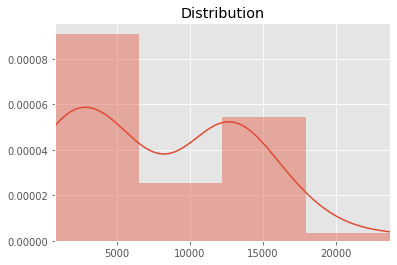

In [42]:
vs.distribution(feature_data_4.var(axis=1))

In [41]:
feature_data_4.mean(axis=1)

0    -13.687500
1    -14.020833
2    -11.312500
3     -7.208333
4     -6.895833
5    -12.791667
6     -9.729167
7    -14.291667
8    -14.083333
9    -12.270833
10    -7.104167
11    -9.020833
12   -14.229167
13   -13.250000
14    -7.937500
15   -14.770833
16   -12.458333
17   -11.395833
18   -10.395833
19   -14.458333
20   -12.833333
21   -13.145833
22   -12.416667
23    -9.854167
24   -14.916667
25   -11.791667
26   -10.479167
27   -12.666667
28    -9.125000
29    -8.833333
30    -7.875000
31   -14.958333
32    -9.520833
33   -16.270833
34    -9.791667
35   -13.916667
36   -12.895833
37   -11.979167
38   -13.833333
39   -13.312500
40   -12.270833
41   -10.229167
42   -13.625000
43   -12.437500
44   -11.729167
45   -14.000000
46   -11.354167
47   -11.562500
dtype: float64

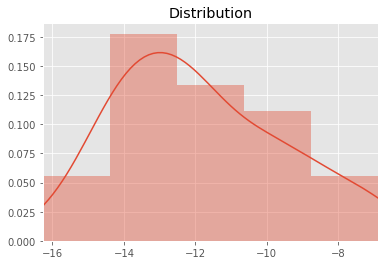

In [44]:
vs.distribution(feature_data_4.mean(axis=1))

### feature distribution

/home/phuc/Desktop/Work/Env/lib/python3.6/site-packages/phuc/visualization/__init__.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, column_fig , figsize = figsize)


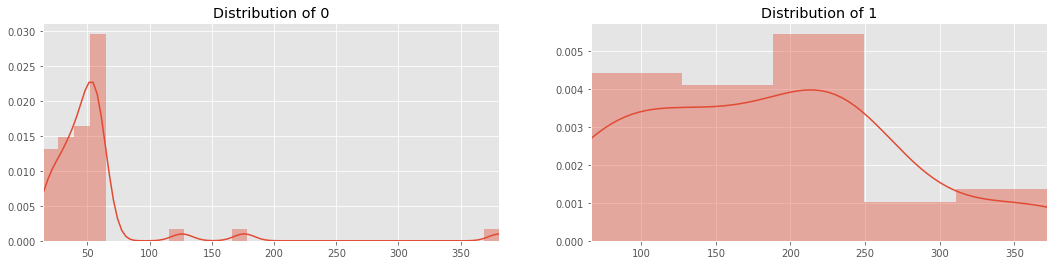

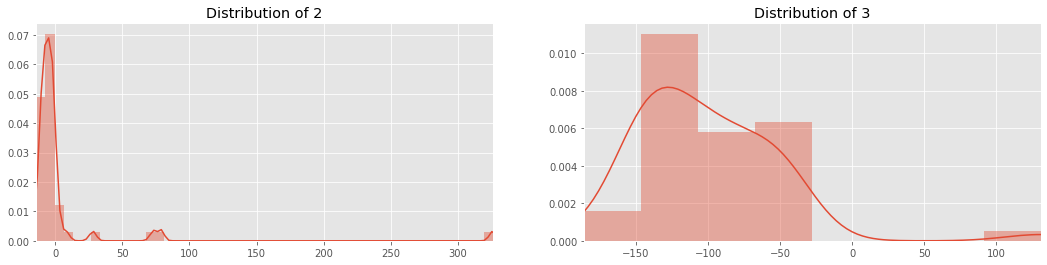

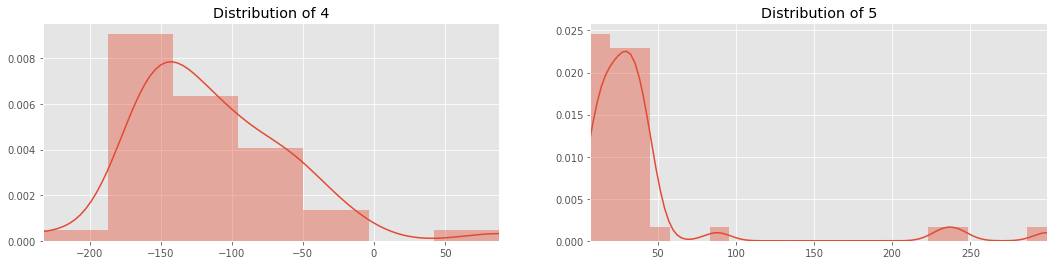

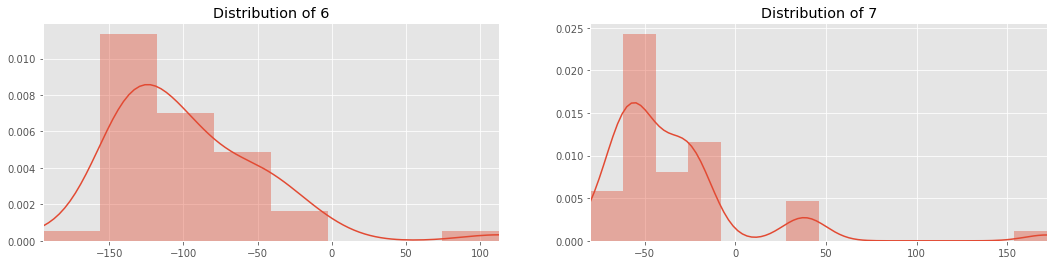

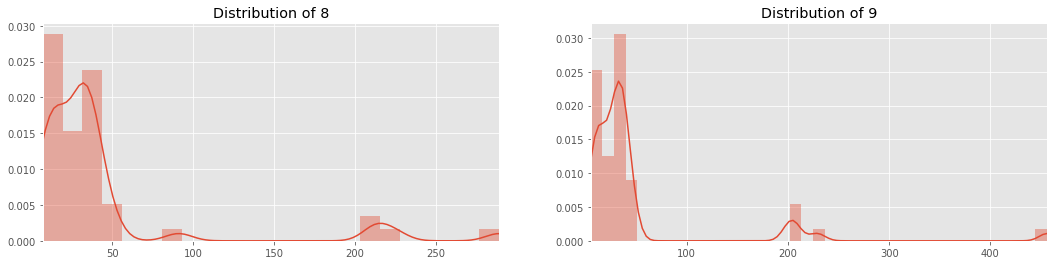

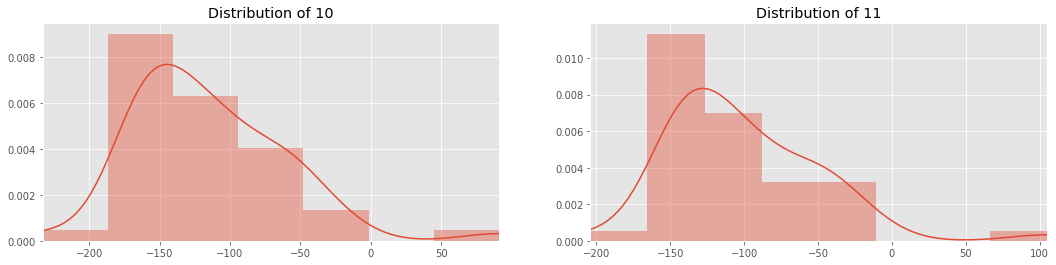

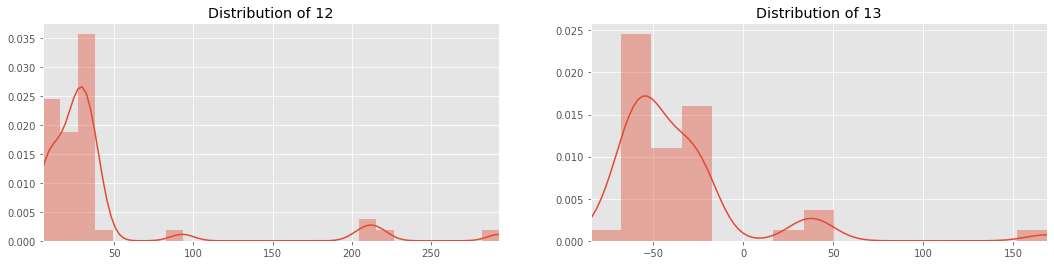

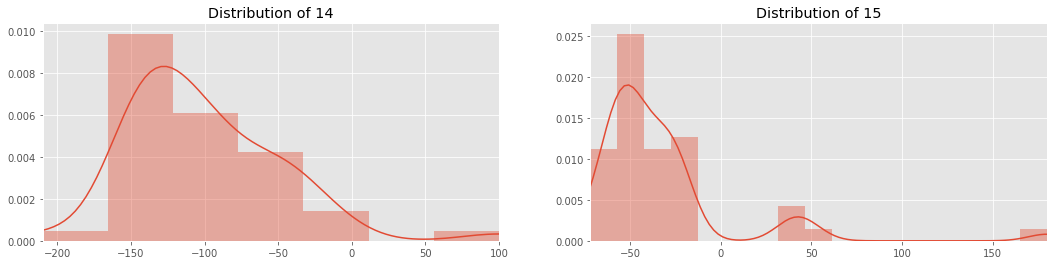

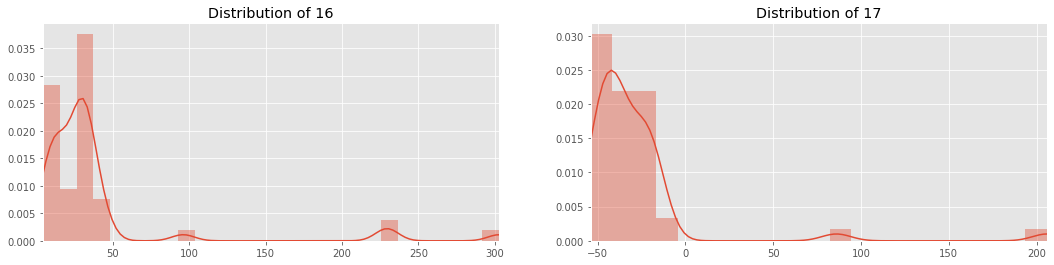

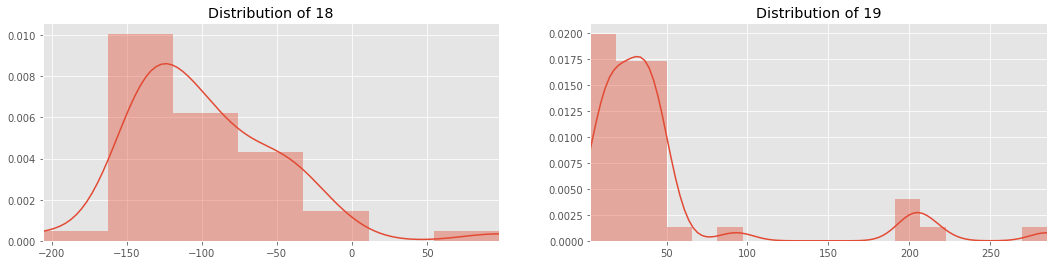

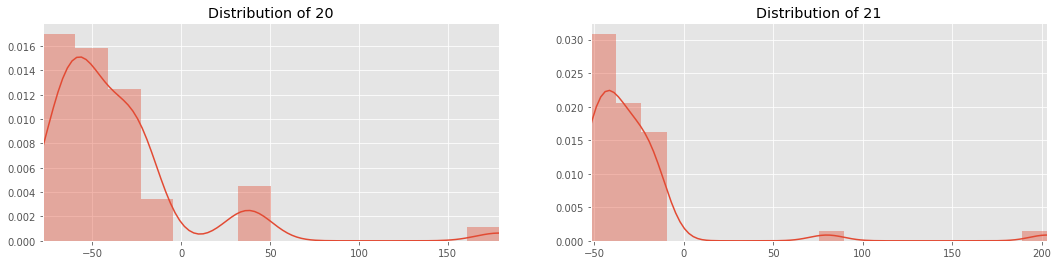

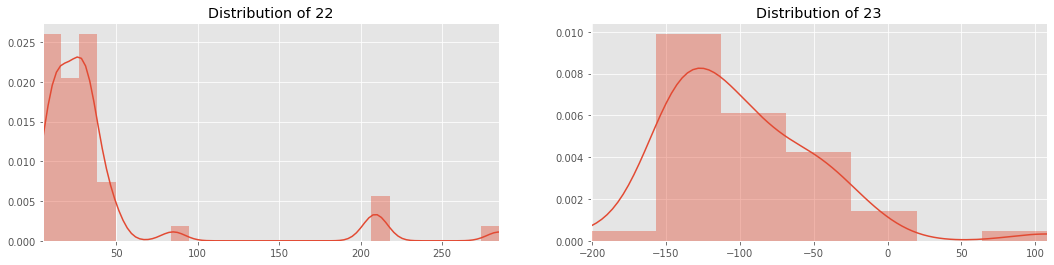

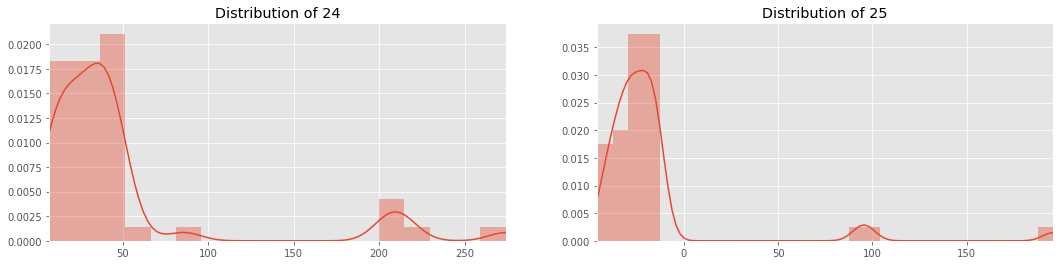

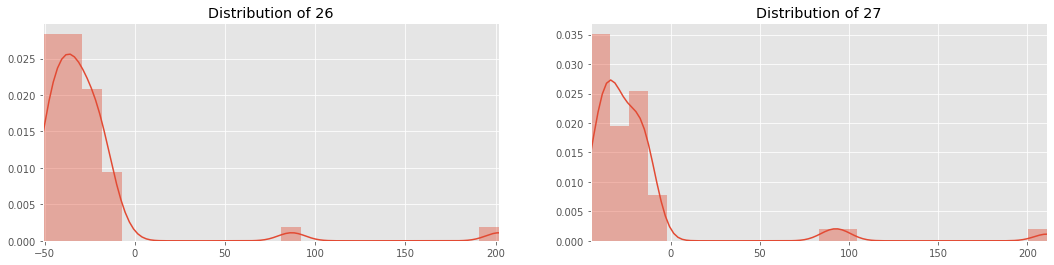

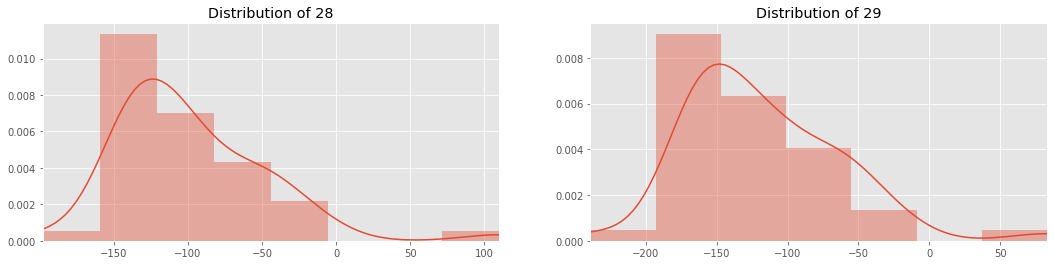

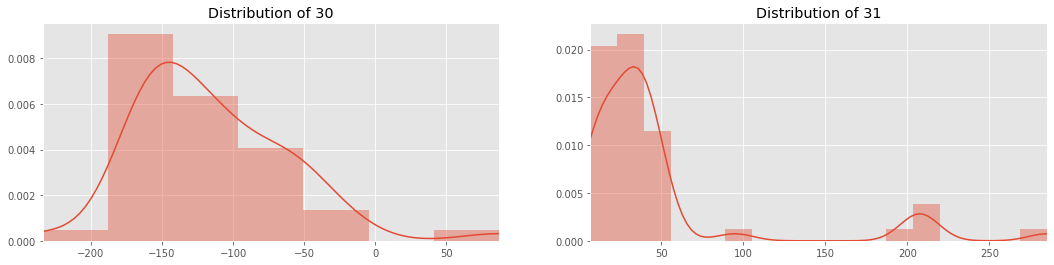

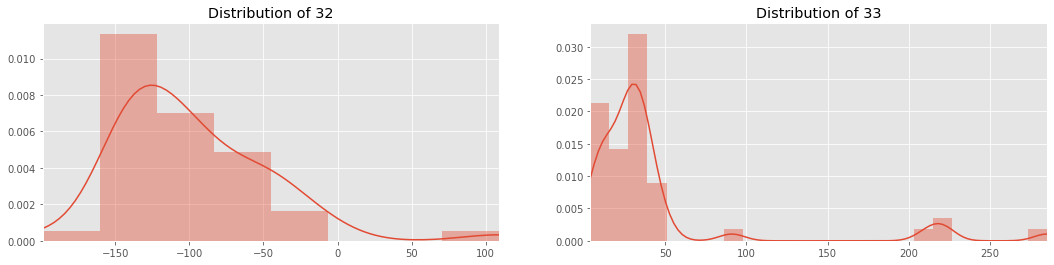

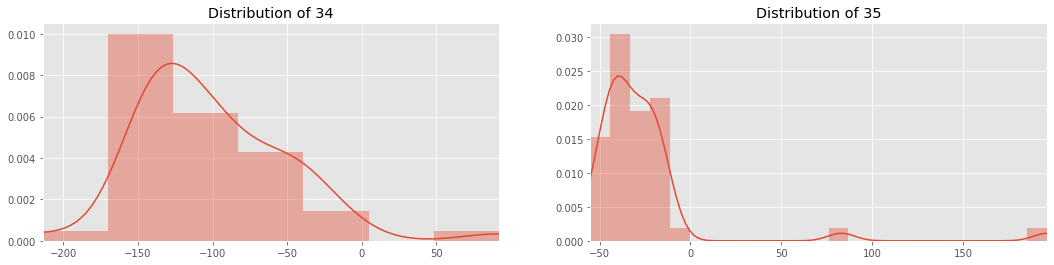

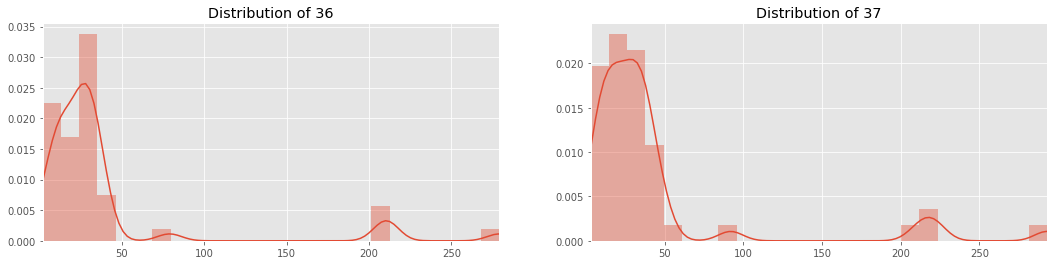

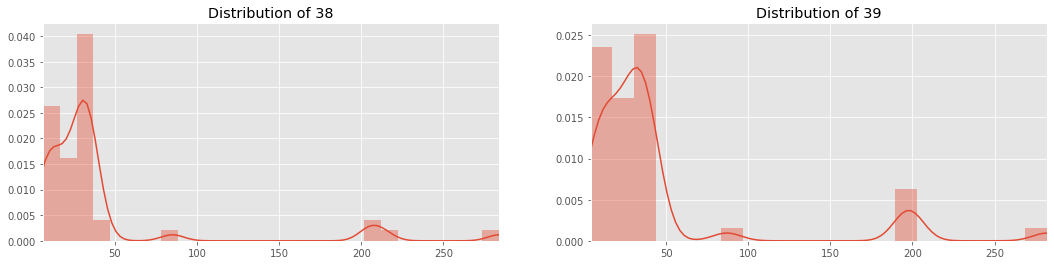

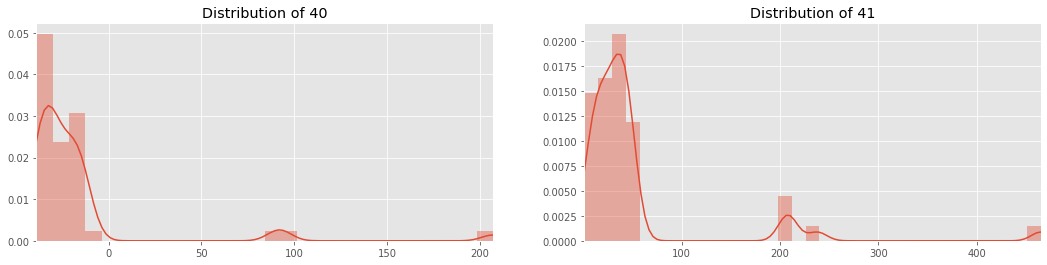

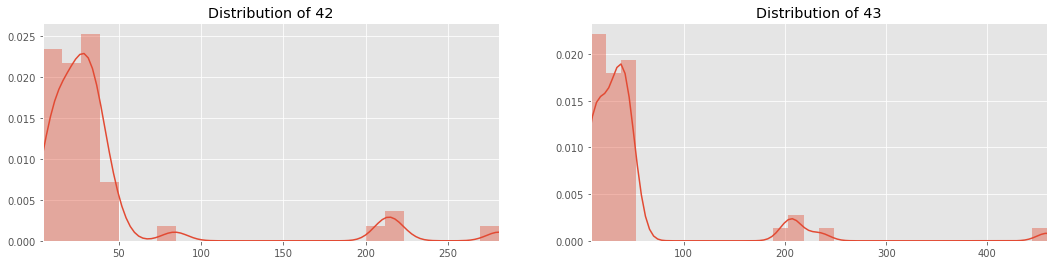

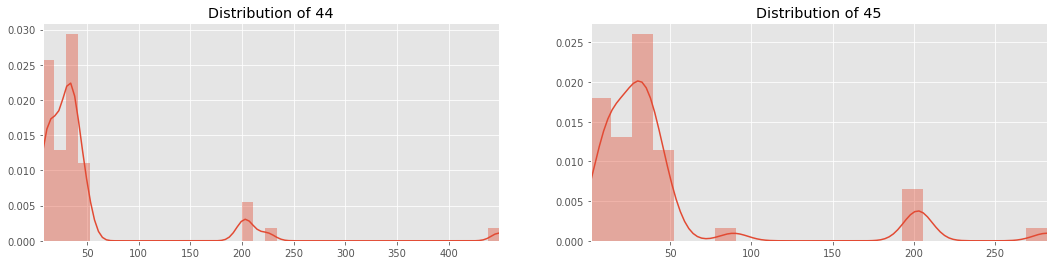

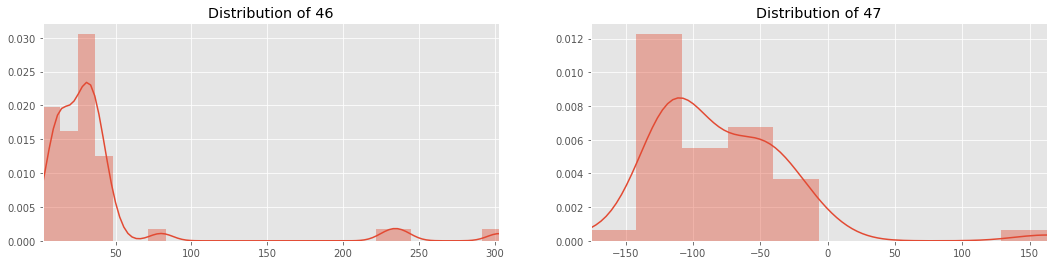

In [22]:
vs.distribution(feature_data_4,feature_data_4.columns)

### Heatmap

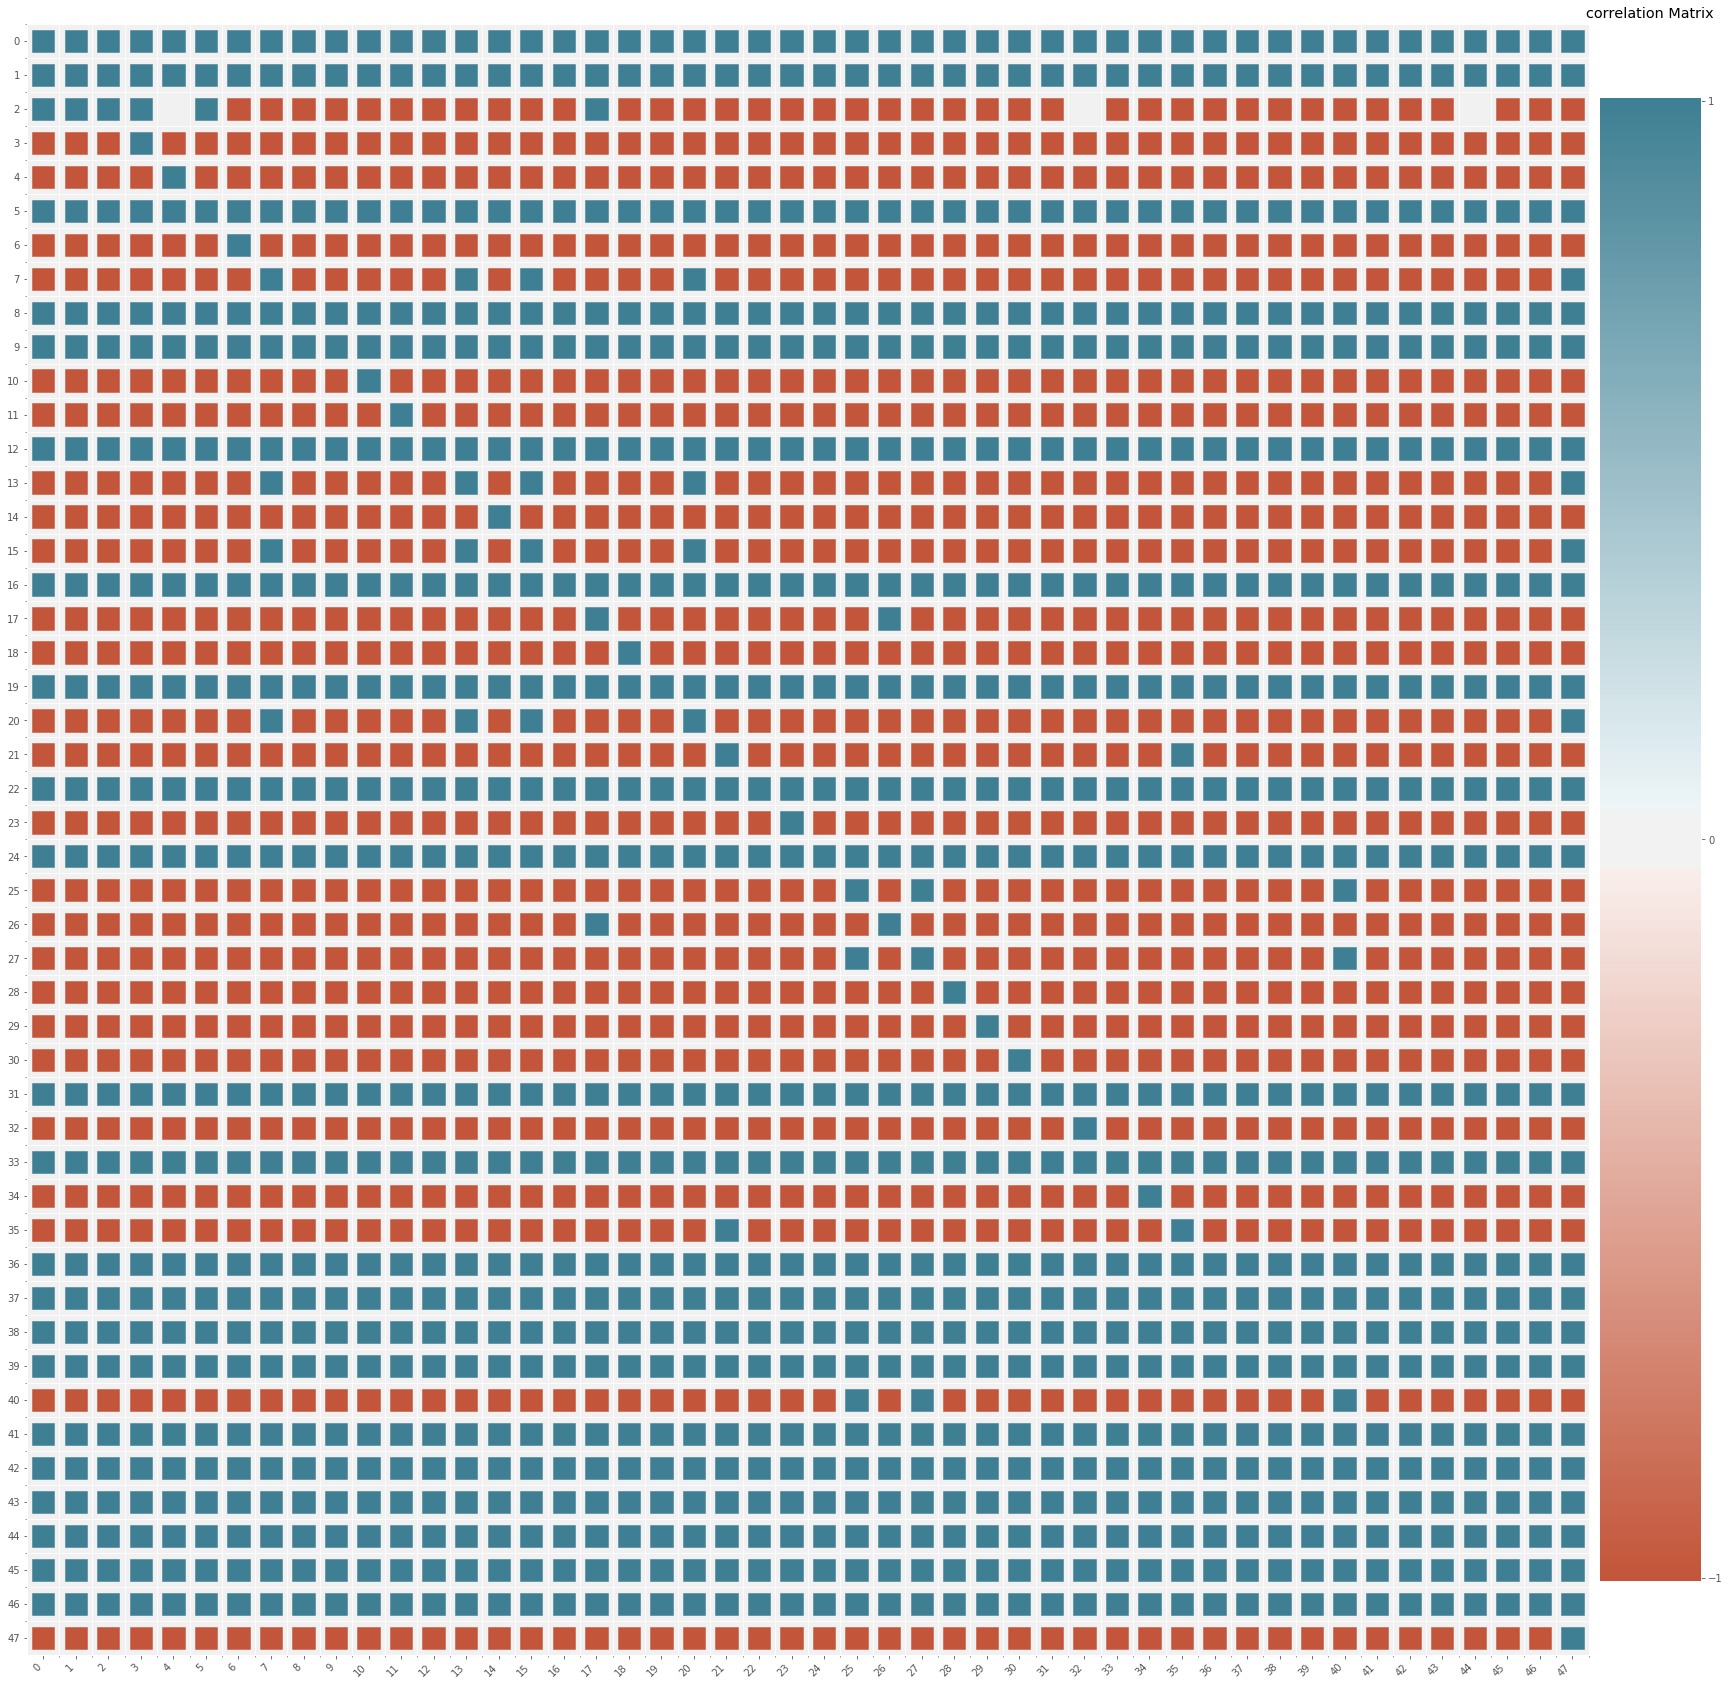

<Figure size 432x288 with 0 Axes>

In [122]:
vs.heatmap(feature_data_4, figsize=(30,30))

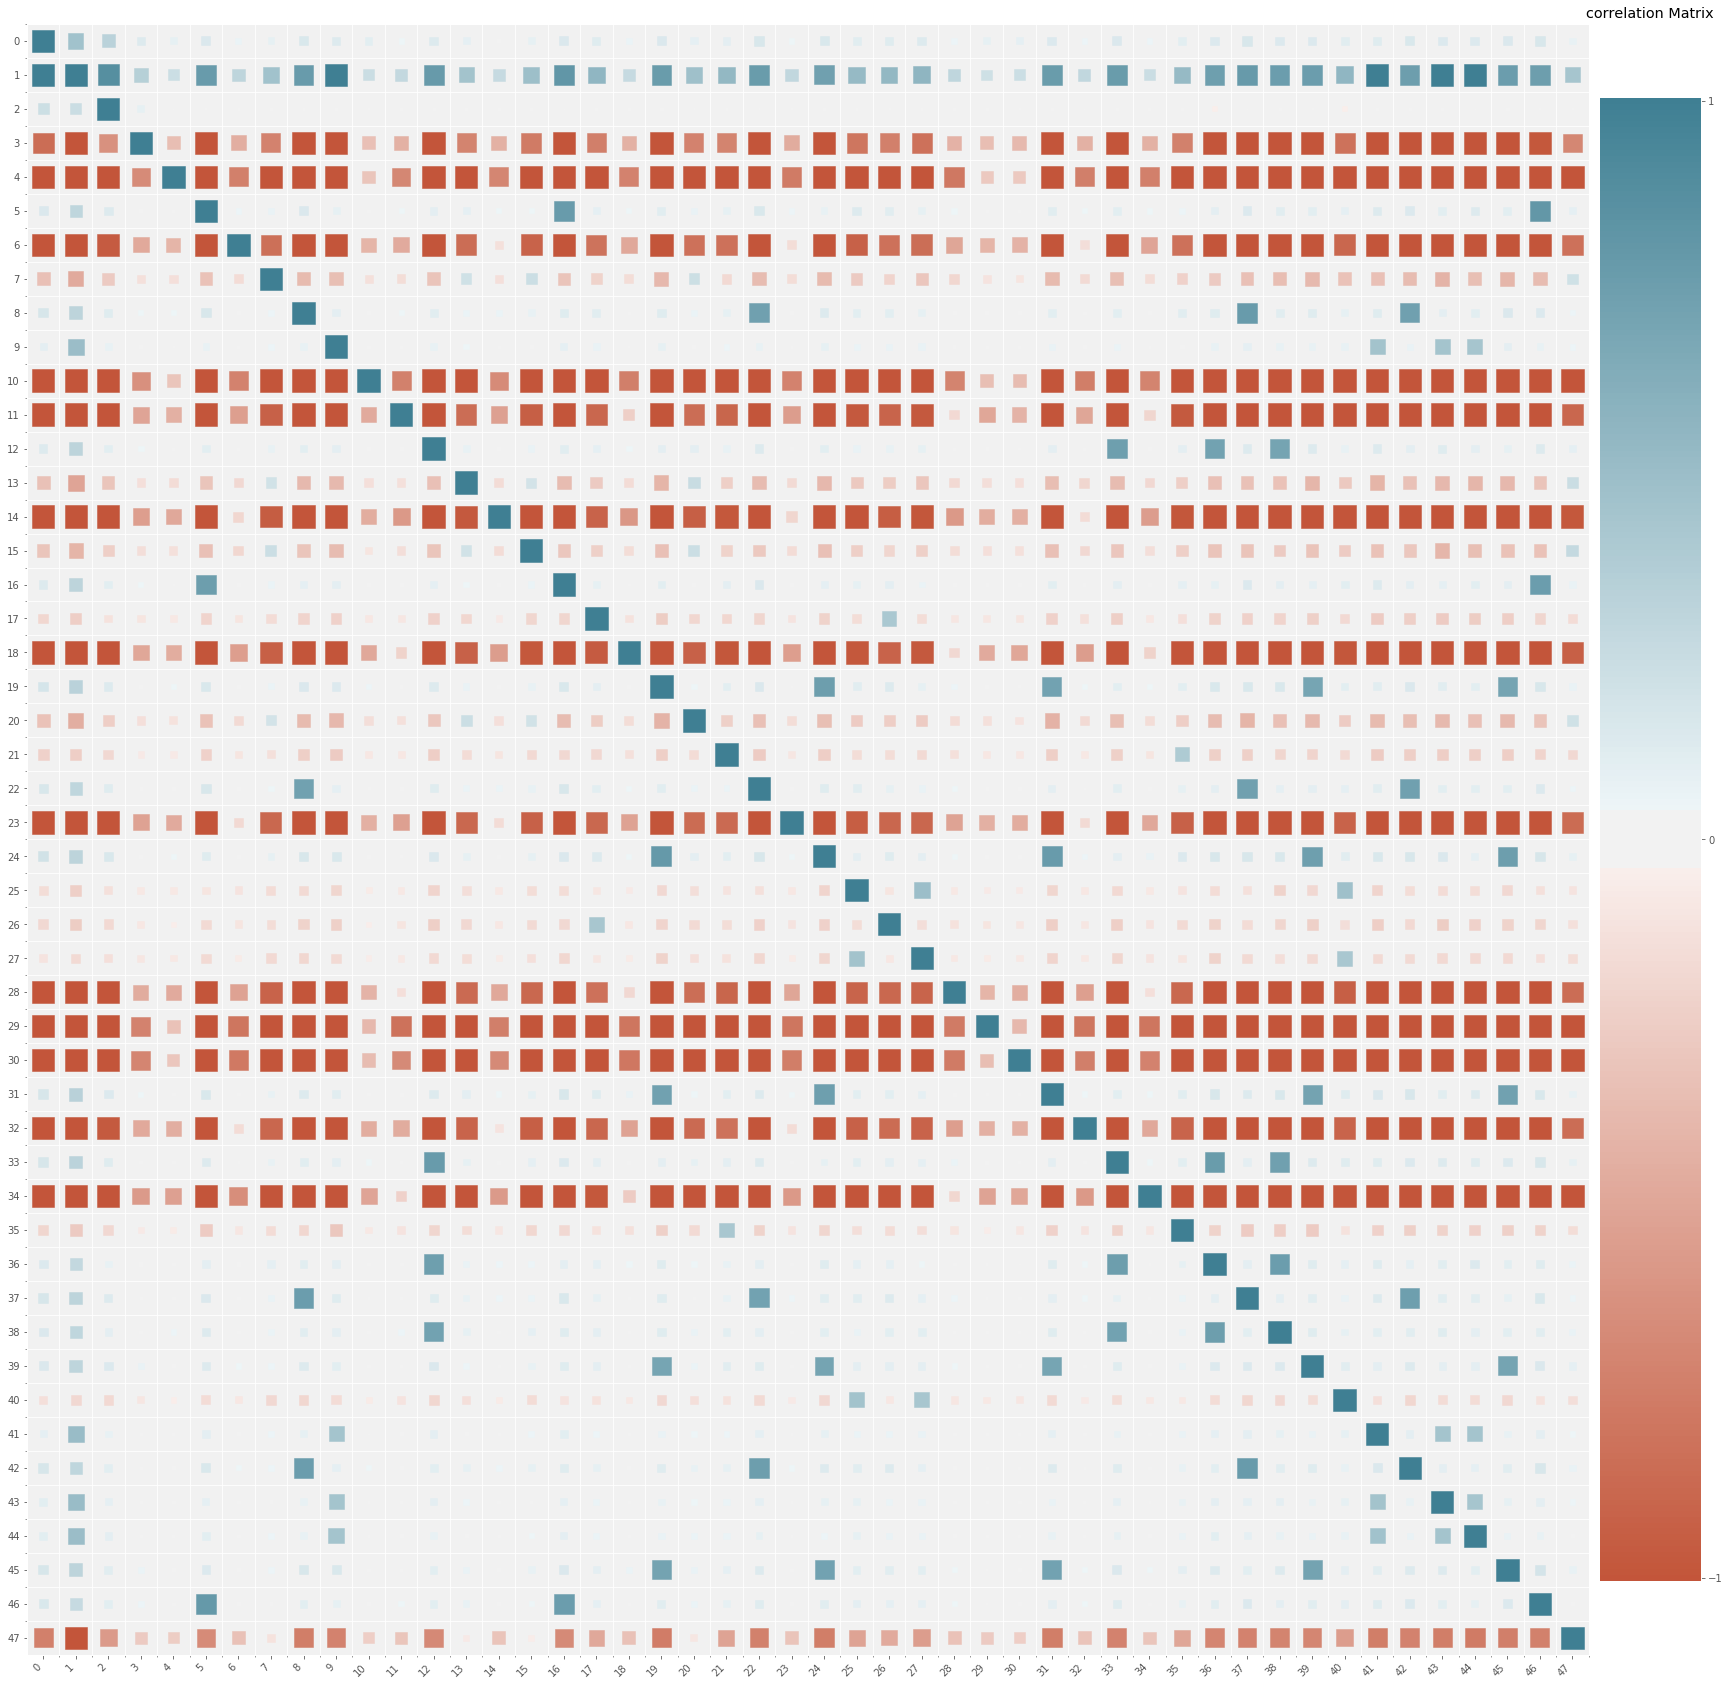

<Figure size 432x288 with 0 Axes>

In [124]:
feature_map = feature_data_4.copy()

for i in range(48):
    feature_map[i] = feature_map[i] / feature_data_4[i][i]

vs.heatmap(feature_map, figsize= (30,30))

### corr

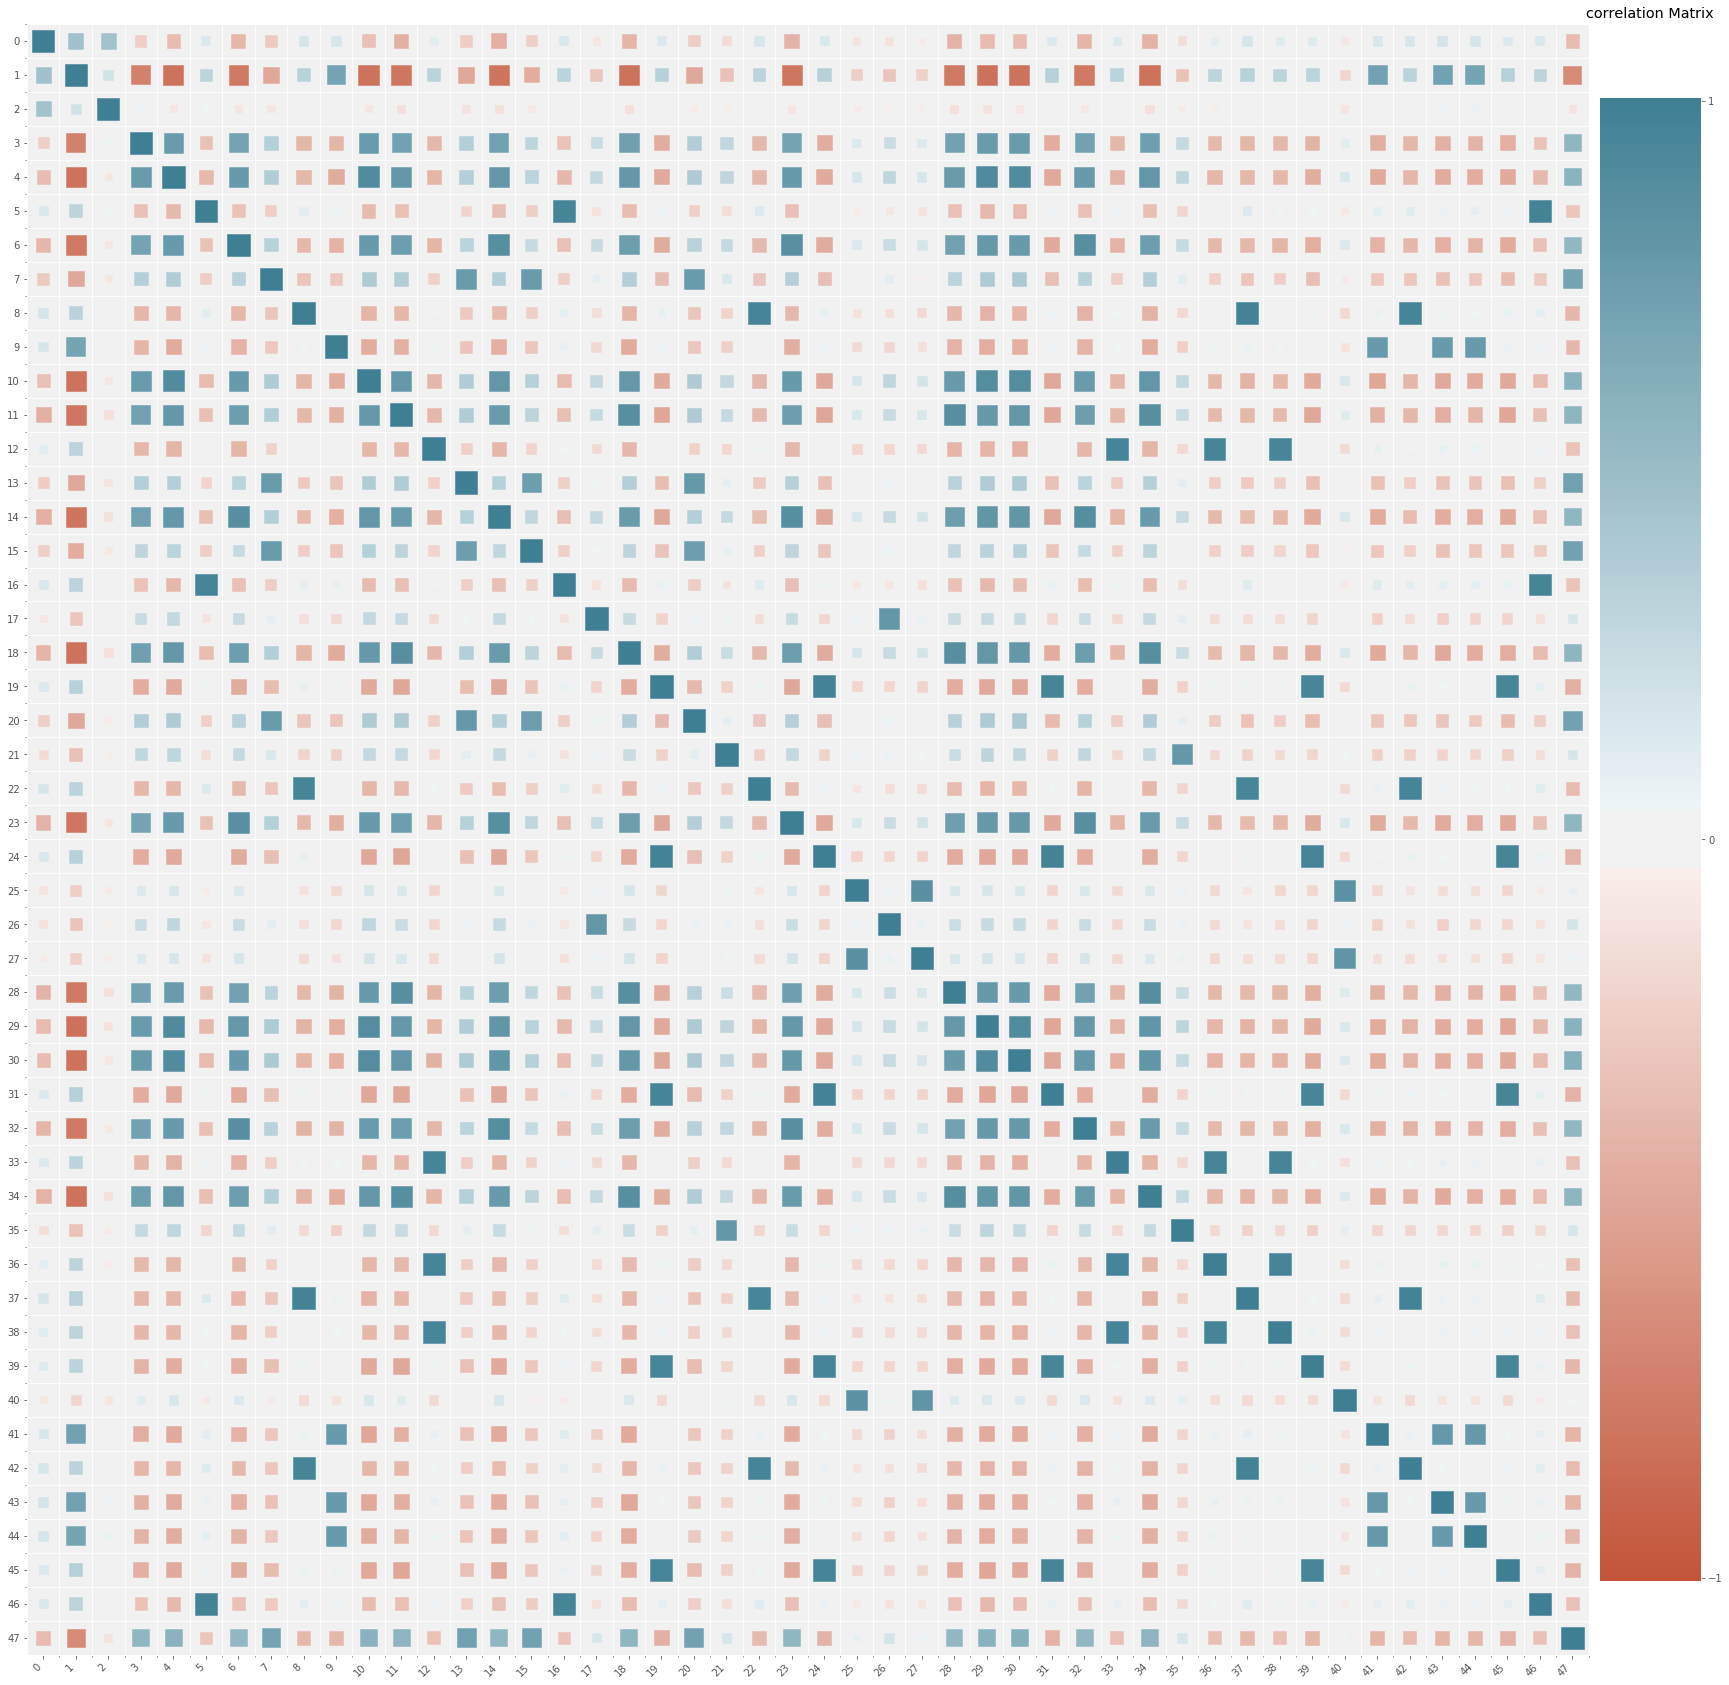

<Figure size 432x288 with 0 Axes>

In [34]:
vs.corrplot(feature_data_4, figsize=(30,30))

### t-sene visualization

In [125]:
embeded_feature = TSNE(n_components=2).fit_transform(feature_data_4)

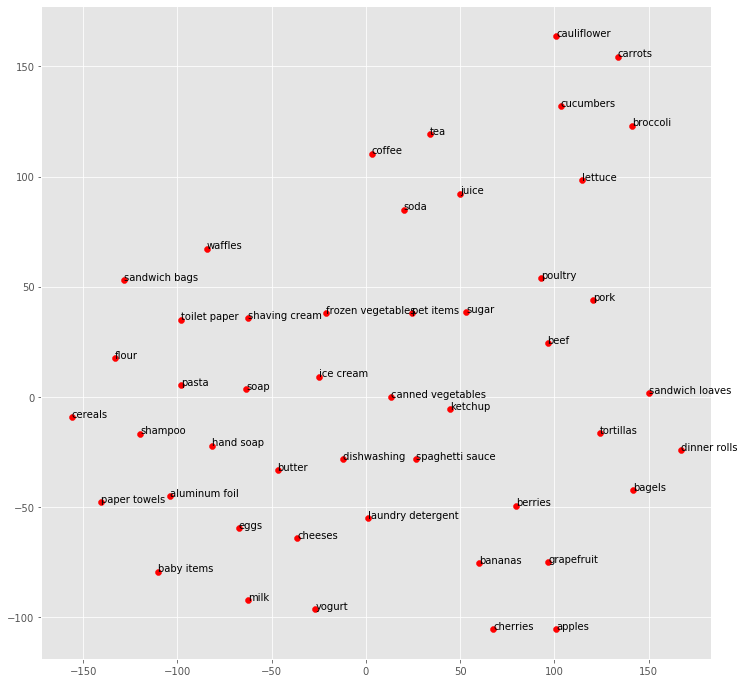

In [126]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(embeded_feature[:,0],embeded_feature[:,1],c='r')

for i, name in enumerate(item_to_id['Item_name']):
    ax.annotate(name, embeded_feature[i])


### Optics

In [90]:
from sklearn.cluster import OPTICS

In [91]:
clustering = OPTICS(min_samples=2).fit(feature_data_4)

In [92]:
clustering.labels_

array([ 0, 12,  0, -1,  5,  9,  6,  3,  8, 12,  5,  4, 10,  3,  6,  3,  9,
        1,  4, 11,  3,  2,  8,  6, 11,  7,  1,  7,  4,  5,  5, 11,  6, 10,
        4,  2, 10,  8, 10, 11,  7, 12,  8, 12, 12, 11,  9,  3])

In [94]:
item_to_id['OPTICS_2_4'] = clustering.labels_
item_to_id.sort_values('OPTICS_2_4')

Item_name  Item_id  OPTICS_2  OPTICS_2_4
3          baby items        4        -1          -1
0               sugar        1         0           0
2           pet items        3         0           0
26       dishwashing        27         1           1
17  laundry detergent       18         1           1
35          ice cream       36         2           2
21  frozen vegetables       22         2           2
20            cheeses       21         3           3
15               milk       16         3           3
13               eggs       14         3           3
47             yogurt       48         3           3
7              butter        8         3           3
11            shampoo       12         4           4
34               soap       35         4           4
28          hand soap       29         4           4
18      shaving cream       19         4           4
30              pasta       31         5           5
10            cereals       11         5           5
4             waffles        5         5           5
29              flour       30         5           5
6       sandwich bags        7         6           6
32       toilet paper       33         6           6
14      aluminum foil       15         6           6
23       paper towels       24         6           6
25    spaghetti sauce       26         7           7
27  canned vegetables       28         7           7
40            ketchup       41         7           7
8                soda        9         8           8
22                tea       23         8           8
42             coffee       43         8           8
37              juice       38         8           8
16               beef       17         9           9
5             poultry        6         9           9
46               pork       47         9           9
33          tortillas       34        10          10
12             bagels       13        10          10
36       dinner rolls       37        10          10
38    sandwich loaves       39        10          10
45            bananas       46        11          11
24           cherries       25        11          11
19         grapefruit       20        11          11
31             apples       32        11          11
39            berries       40        11          11
41          cucumbers       42        12          12
43           broccoli       44        12          12
44        cauliflower       45        12          12
9             carrots       10        12          12
1             lettuce        2        12          12

In [139]:
item_to_id.columns

Index(['Item_name', 'Item_id', 'OPTICS_2'], dtype='object')

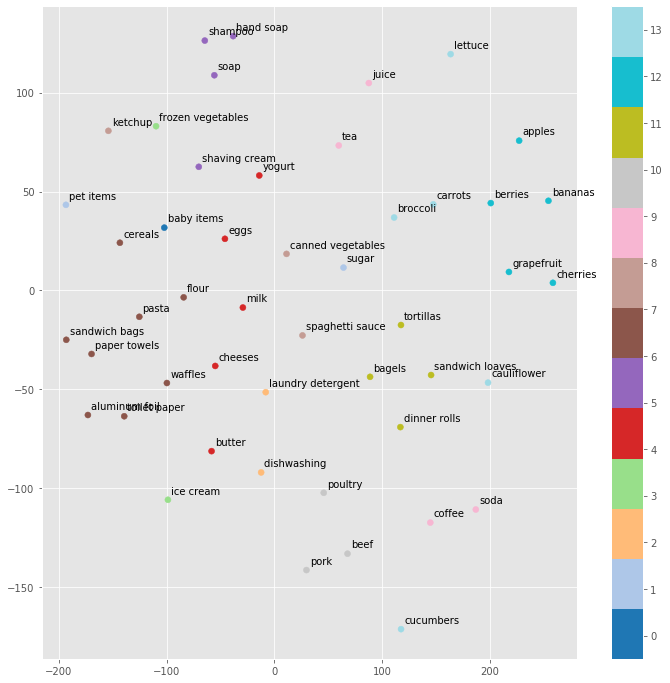

In [95]:
plt.figure(figsize=(12,12))
plt.scatter(embeded_feature[:,0], embeded_feature[:,1], c=item_to_id['OPTICS_2_4']+1, cmap=plt.cm.get_cmap("tab20", 13))
for i, name in enumerate(item_to_id['Item_name']):
    plt.annotate(name, embeded_feature[i]+3)
plt.colorbar(ticks=range(14))
plt.clim(-0.5, 13.5)
plt.show()

# Tests

In [60]:
import pandas as pd
from scipy.spatial.distance import euclidean, pdist, squareform


def similarity_func(u, v):
    return 1/(1+euclidean(u,v))

DF_var = pd.DataFrame.from_dict({"s1":[1.2,3.4,10.2],"s2":[1.4,3.1,10.7],"s3":[2.1,3.7,11.3],"s4":[1.5,3.2,10.9]})
DF_var.index = ["g1","g2","g3"]

dists = pdist(DF_var, similarity_func)
DF_euclid = pd.DataFrame(squareform(dists), columns=DF_var.index, index=DF_var.index)

In [61]:
dists

array([0.21596281, 0.05140761, 0.06302091])

In [62]:
DF_euclid

g1        g2        g3
g1  0.000000  0.215963  0.051408
g2  0.215963  0.000000  0.063021
g3  0.051408  0.063021  0.000000

In [ ]:
distribution = np.random